# NETL Cyclone Optimization: Final Project

This is the **main report** for the final project for the Summer 2024 session of Intro to Data-Centric Computing. Supplementary notebooks for this project can be found in the zipped submission folder.

## Introduction

### Project Statement

This is a project from the National Energy Technology Laboratory (NETL).

There are many potential designs for air filtration systems. One such design is a cyclone, which takes air into the design through an inlet, processes the air in a cyclone chamber, and yields "clean" air from the top of the design, with solid impurities expelled and collected at the bottom.

In this problem, we have been asked to examine experimental data related to the simulation of several such cyclone designs. Each simulated cyclone has a different set of modeled parameters that reflect the **dimensions** (radius, height, width) of various parts (barrel, vortex, inlet) of the cyclone. Each physical model's performance has been measured in terms of two outputs: the amount of **mass** collected during filtration, and the drop in **pressure** between the inlet and barrel of the vortex.

The goal of this project is to optimize the cyclone design by identifying the dimensions that yield the most efficient cyclone - a cyclone that filters out the maximum amount of mass with a minimal pressure drop.

We have worked on two predictive modeling tasks throughout this report. The first is associated with the pressure drop, which we have treated as a regression problem. The second is associated with the mass collected from the cyclone, which we have treated as a classification problem - classifying models into "high" or "low" collection of mass.

### Report Structure

This report is split into six main sections:

- Introduction
- Exploratory Data Analysis*
- Clustering*
- Models: Fitting and Interpretation
- Models: Predictions
- Models: Performance and Validation*

Sections marked with a `*` are associated with supplemental reports.

Please note that the structure of each section is modeled closely after the structure presented in the final project instructions. Therefore, some information may be repeated between the main notebook and the supporting material.

### Data Overview

There is only one data set used in this problem. It contains 8 columns - one identifier (`model`), five inputs (`r_barrel`, `r_vortex`, `h_vortex`, `w_inlet`, `h_inlet`), and two outputs (`mass`, `pressure`). Each row corresponds to a single modeled cyclone with a certain set of dimensions. There are 96 rows in total.

A more detailed description of the inputs and outputs can be found below.

#### Input Variables

The `model` column is an identifier (integer values from 0 to 99, with some numbers skipped). It is not a feature of the cyclone design and should not be considered in predictive modeling.

The `r_barrel`, `r_vortex`, `h_vortex`, `w_inlet`, and `h_inlet` columns are the relevant input variables. Each reflects a certain geometric parameter (radius, height, width) of a certain part (barrel, vortex, inlet) of a cyclone modeled with MFiX. All inputs are represented as float values.

#### Response Variables

The output variables for this problem are `mass`, which reflects the efficiency of the cyclone based on the mass of solids measured, and `pressure`, which reflects the pressure drop in the cyclone (and therefore the energy needed to power the design). Both outputs are represented as float values.

Given the project's objective, these are fairly straightforward outputs that did not need to be derived through additional summary. However, due to their highly skewed distributions, we have performed a few additional transformations in order to be able to use these outputs with regression techniques for predictive modeling:

- `log_mass` is derived by applying the natural log transformation to the `mass` variable.
- `log_pressure` is derived by shifting the values of the `pressure` variable slightly (in order to ensure that all values are positive), then applying the natural log transformation to the shifted variables.

We have also derived the variable `bin_mass` by splitting the `mass` variable into two categories above and below the median value. This will allow us to study `mass` as a binary classification task, rather than a second regression task.

### Results

After completing the analysis and fitting various models for both inputs, we've determined that:

#### `log_pressure`
- `log_pressure` seems to be influenced primarily by `r_vortex`, with additional influence from `r_barrel` and `h_inlet`.
- As `r_vortex` increases, the pressure drop decreases, which indicates that less energy is needed to power the design. Designs with a smaller pressure drop are more efficient.
- The overall trend of `log_pressure` with respect to `r_vortex` is impacted by the value of `r_barrel`. For some values of `r_vortex`, a higher `r_barrel` is associated with a lower pressure drop, while for other values, this is associated with a higher pressure drop. However, the exact behavior of this interaction across the range of `r_vortex` may differ between designs, because...
- ...the impact of `r_barrel` on the trend of `log_pressure` with respect to `r_vortex` is, in turn, impacted by the value of `h_inlet`. For example, at the lowest values of `h_inlet` observed in our modeling, higher values of `r_barrel` were mostly associated with lower predictions of `pressure` than lower values of `r_barrel` across the entire range of `r_vortex`. However, at the highest modeled values of `h_inlet`, we saw that this behavior was mostly flipped, with higher values of `r_barrel` associated with higher predictions of `pressure` than lower values.

#### `bin_mass`
- `bin_mass` seems to be influenced primarily by `r_barrel`, with additional influence from `r_vortex`.
- As `r_barrel` increases, the probability of a cyclone model being classified as "high" mass decreases. Designs classified as high mass indicate that the cyclone has collected a greater amount of impurities from the intake, reflecting cleaner output air and better cyclone performance.
- As `r_vortex` increases, the probability of a cyclone model being classified as high mass increases.

Many of these relationships were somewhat visible through EDA, particularly `r_vortex` with respect to `log_pressure`. The correlation between `r_barrel` and `log_pressure` was somewhat visible in retrospect, as well as the relationship between `r_barrel`, `r_vortex`, and `bin_mass`, but none of these were immediately apparent without further modeling.

Our clustering efforts are somewhat similar; looking back at the clusters that were identified, we can see that our 6-cluster KMeans clearly distinguished low `r_vortex` + high `log_pressure` observations from high `r_vortex` + low `log_pressure`.

However, fitting and evaluating the performance of the predictive models helped greatly to identify which features were actually useful indicators of performance, as well as the degree to which those features might influence the efficiency of the overall cyclone design. I was personally surprised at the significance of `h_inlet` to the outcome of `log_pressure`, which only became clear after evaluating feature coefficients and comparing trends in our models.

We also generated one model that attempted to make use of the apparent quadratic behavior of `h_vortex` with respect to `mass`, but that model ended up overfitting to our training data, and we could not confidently say that it performed better than a model without that interaction feature.

Overall, based on these findings, it seems that the most important predictor of optimal cyclone performance (low pressure drop, high mass collection) is `r_vortex`, which seems to be associated with greater efficiency at higher values for both outputs.

`r_barrel` is also important to consider, though this parameter is less straightforward to optimize due to its relationship with `r_vortex` and `h_inlet`. To maximize the probability of a model being classified as high mass, `r_barrel` should be minimized; however, it should be paired with a value of `r_vortex` and `h_inlet` that also predicts a low pressure drop, as there do exist values where a higher `r_barrel` value is associated with a higher pressure drop instead.

### Reflection

I came into this class with a background in general software programming, but very few hard skills in data analysis. This project was very valuable in giving me hands-on experience with a predictive modeling application from start to finish - people talk often about "gathering insights" from data, but actually going from exploratory visualizations to transforming data and fitting models helped immensely in putting concrete actions and skills to the name.

Although this was a modeling project, I personally feel that I gained the most experience in creating various kinds of graphs for exploring data visually, especially in terms of deciding the most appropriate type of graph to use for a given purpose or type of data. This is a foundational skill that I did not have intuitively prior to this project, and I feel much more equipped to visualize data now, which often forms and informs the direction of further exploration (e.g. creating a certain feature in a model after noticing an interesting relationship between that feature and the problem output during EDA).

I was also able to create and evaluate models for both regression and classification tasks in this report. Having the chance to practice with both types of problems before the end of the semester was important to me. It's one of the main reasons that I picked this project in the first place, so I'm pleased with the outcome.

As for how the skills from this project might help me in the future, my specific area of interest is presently undecided - my background is in media and entertainment, but data science applications in media tend to be marketing applications, and I'm not sure how I feel about that as a whole. I've been thinking about the energy and healthcare sectors lately, but I'm not sure if I'm smart enough to work on engineering problems, either.

Despite that, I do feel that I'll be able to take these skills and apply them to whatever domain I end up specializing in. One of the other reasons that I picked this project is that optimization problems are very, very common, and no matter what kinds of problems I'm working on, I'm sure that my experience working on this report will be useful in the future.

## Exploratory Data Analysis

In this section, we will carry out a brief analysis of the dataset. As the full EDA was already carried out in the project proposal and supplementary notebook, some figures may be abbreviated or omitted.

### Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

### Read data

In [2]:
df = pd.read_csv('cyclone_model_runs.csv')

### Basic Information

Let's begin with a cursory exploration of the data set.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   model     96 non-null     int64  
 1   r_barrel  96 non-null     float64
 2   r_vortex  96 non-null     float64
 3   h_vortex  96 non-null     float64
 4   w_inlet   96 non-null     float64
 5   h_inlet   96 non-null     float64
 6   mass      96 non-null     float64
 7   pressure  96 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 6.1 KB


The `.info()` method already gives us quite a lot of information. We can tell that there are **96 rows** and **8 columns**: `model`, `r_barrel`, `r_vortex`, `h_vortex`, `w_inlet`, `h_inlet`, `mass`, and `pressure`. Each column stores float values (with the exception of `model`, which stores integers).

This particular data set is also small enough for us to see that there are no missing values.

Below, we'll print a few attributes directly to double-check.

In [4]:
df.shape

(96, 8)

In [5]:
df.columns

Index(['model', 'r_barrel', 'r_vortex', 'h_vortex', 'w_inlet', 'h_inlet',
       'mass', 'pressure'],
      dtype='object')

In [6]:
df.dtypes

model         int64
r_barrel    float64
r_vortex    float64
h_vortex    float64
w_inlet     float64
h_inlet     float64
mass        float64
pressure    float64
dtype: object

We can count the sum of null values in the dataframe to confirm that there are no missings.

In [7]:
df.isna().sum()

model       0
r_barrel    0
r_vortex    0
h_vortex    0
w_inlet     0
h_inlet     0
mass        0
pressure    0
dtype: int64

We'll also call the `.nunique()` method to check the number of unique values for each column. Most variables have the same number of unique values as rows (with the exception of `mass`, which still comes fairly close at 93).

In [8]:
df.nunique()

model       96
r_barrel    96
r_vortex    96
h_vortex    96
w_inlet     96
h_inlet     96
mass        93
pressure    96
dtype: int64

Last, we'll print out a table of descriptive statistics for the entire dataframe.

In [9]:
df.describe()

model   r_barrel   r_vortex   h_vortex    w_inlet    h_inlet  \
count  96.000000  96.000000  96.000000  96.000000  96.000000  96.000000   
mean   49.125000   0.071131   0.019899   0.297857   0.027361   0.069522   
std    29.490141   0.016875   0.005746   0.116558   0.007211   0.028835   
min     0.000000   0.040764   0.010191   0.102764   0.015141   0.020213   
25%    23.750000   0.056817   0.015092   0.197050   0.021311   0.045279   
50%    47.500000   0.071360   0.019860   0.295521   0.027416   0.070252   
75%    75.250000   0.085496   0.024783   0.394154   0.033469   0.093812   
max    99.000000   0.099947   0.029963   0.497899   0.039893   0.118613   

               mass     pressure  
count  9.600000e+01    96.000000  
mean   1.276272e-07   510.555630  
std    2.380372e-07   707.555137  
min    3.600000e-10  -133.910376  
25%    1.167500e-08    83.481705  
50%    4.045000e-08   202.608531  
75%    1.145000e-07   671.496926  
max    1.650000e-06  3068.300988

### Marginal Distributions: Input Variables

Next, we'll check the marginal distributions of the continuous inputs.

For this report, these graphs have been plotted together in one figure. To view each histogram separately, please see *Supplementary Report: EDA (Marginal Distributions: Input Variables)*.


In [10]:
lf = df.loc[:, ['r_barrel', 'r_vortex', 'h_vortex', 'w_inlet', 'h_inlet']].\
            reset_index().rename(columns={'index': 'rowid'}).copy().melt(id_vars='rowid')

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


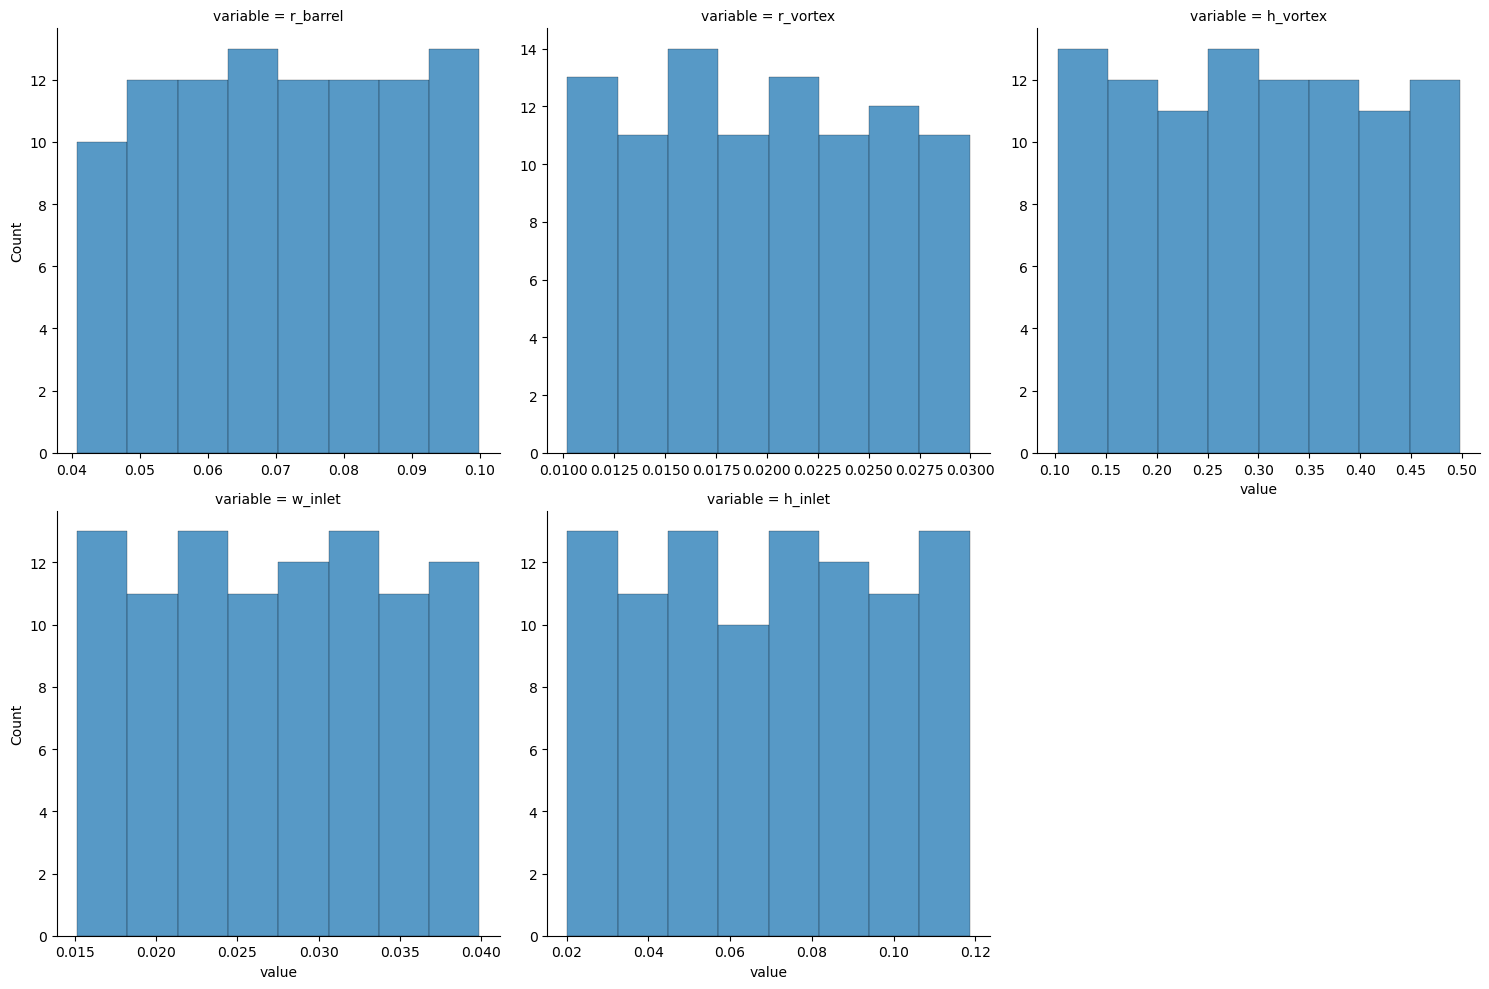

In [11]:
sns.displot(data = lf, x='value', col='variable', col_wrap=3, kind='hist',
            facet_kws={'sharex': False, 'sharey': False},
            common_bins = False)

plt.show()

Displaying these histograms side by side allows us to highlight the **relatively uniform distribution** of all five variables.

### Marginal Distributions: Output Variables

Let's check the marginal distributions of the two outputs.

Again, these graphs have been plotted together. To view each histogram separately, please see *Supplementary Report: EDA (Marginal Distributions: Output Variables)*.

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


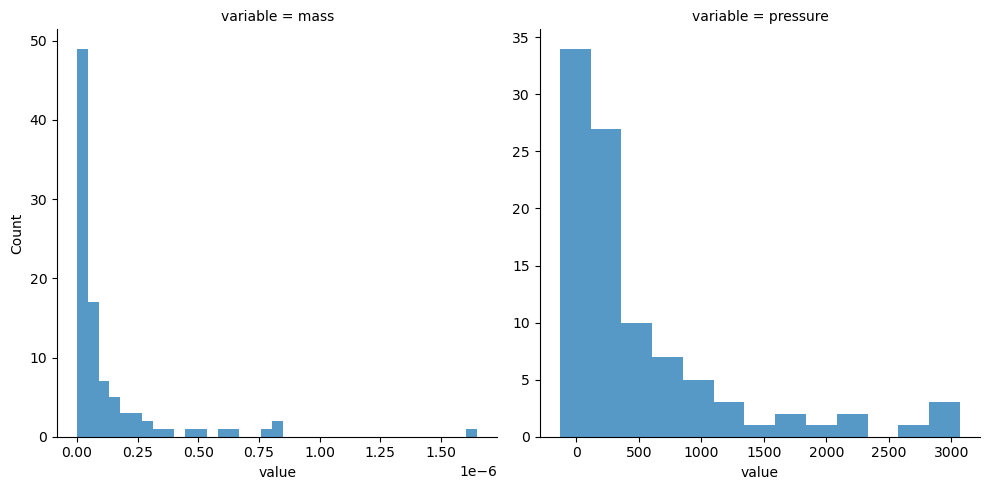

In [12]:
sns.displot(data = df.loc[:, ['mass', 'pressure']].reset_index().\
            rename(columns={'index': 'rowid'}).copy().melt(id_vars='rowid'),
            x='value', col='variable', kind='hist',
            facet_kws={'sharex': False, 'sharey': False},
            common_bins = False)

plt.show()

Both of these visualizations are quite **skewed**, with fewer observations at higher values and very high counts approaching zero. Visually, this is reflected in the long tails to the right side of the graph.

One of the main assumptions of linear regression models is that they assume Gaussian distributions around the sampling distribution of the output around the average. Because of this, we'll need to perform a few transformations before we can use this data for predictive modeling.

### Output Distributions: Transformations

First, we'll apply the natural log transformation to the `mass` variable. (We won't be using this in our models, since we've chosen to study mass as a classification problem, but it will be good to have when visualizing the outputs in log space.)

In [13]:
df_copy = df.copy()
df_copy['log_mass'] = np.log(df_copy.mass)

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


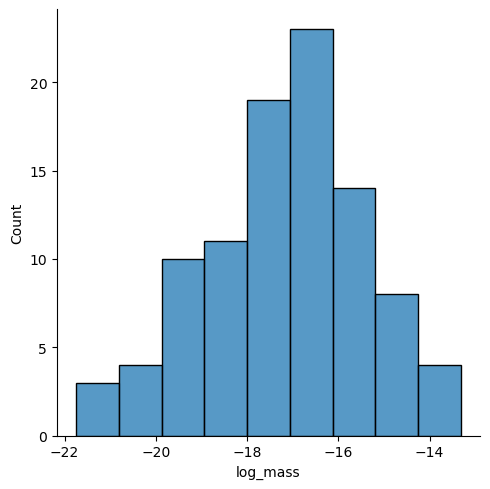

In [14]:
sns.displot(data = df_copy, x='log_mass')
plt.show()

This creates a more symmetric distribution - it's not perfectly Gaussian, but it's much closer than the original.

We could apply a similar transformation to `pressure`; however, since we determined that there was a negative observation in this column, we can't apply the natural log directly, as doing so will introduce a missing value.

Instead, we'll "hack" around this limitation by adding a small, constant value across the entire column, which will preserve the distribution while ensuring that all values are positive.

In [15]:
df_copy['pressure_shift'] = df_copy.pressure + 150
df_copy['log_pressure'] = np.log(df_copy.pressure_shift)

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


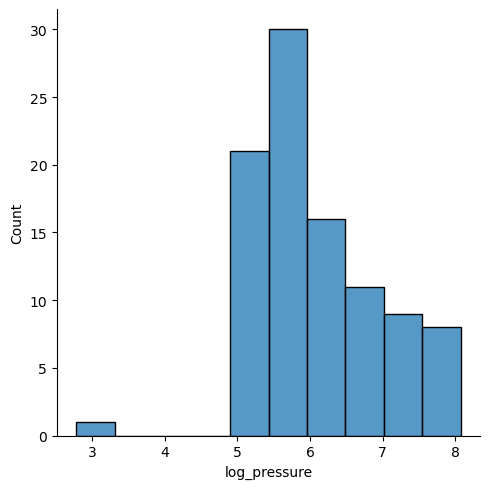

In [16]:
sns.displot(data = df_copy, x='log_pressure')
plt.show()

Finally, since we're treating `mass` as a binary classification task, let's take a moment to split `mass` into two balanced categories and save the result into a column called `bin_mass`.

In [17]:
df_copy['bin_mass'] = np.where(df_copy.mass > df_copy.mass.median(), 1, 0)

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


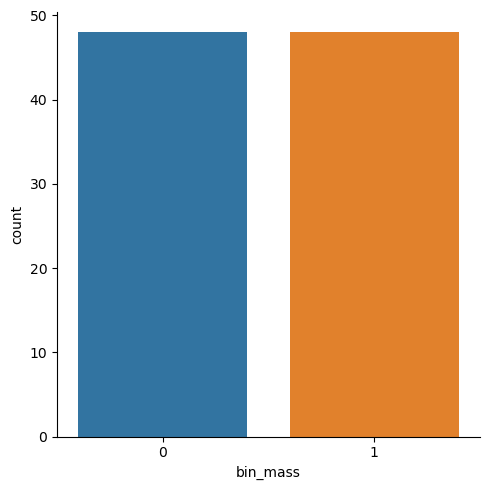

In [18]:
sns.catplot(data=df_copy, x='bin_mass', kind='count')
plt.show()

### Variable Relationships: Inputs

Now that we've examined all of the marginal distributions, we can start plotting relationships between variables.

Because there are relatively few variables in this data set, we can begin by visualizing all of the relationships between all input variables at once using a pairs plot.

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


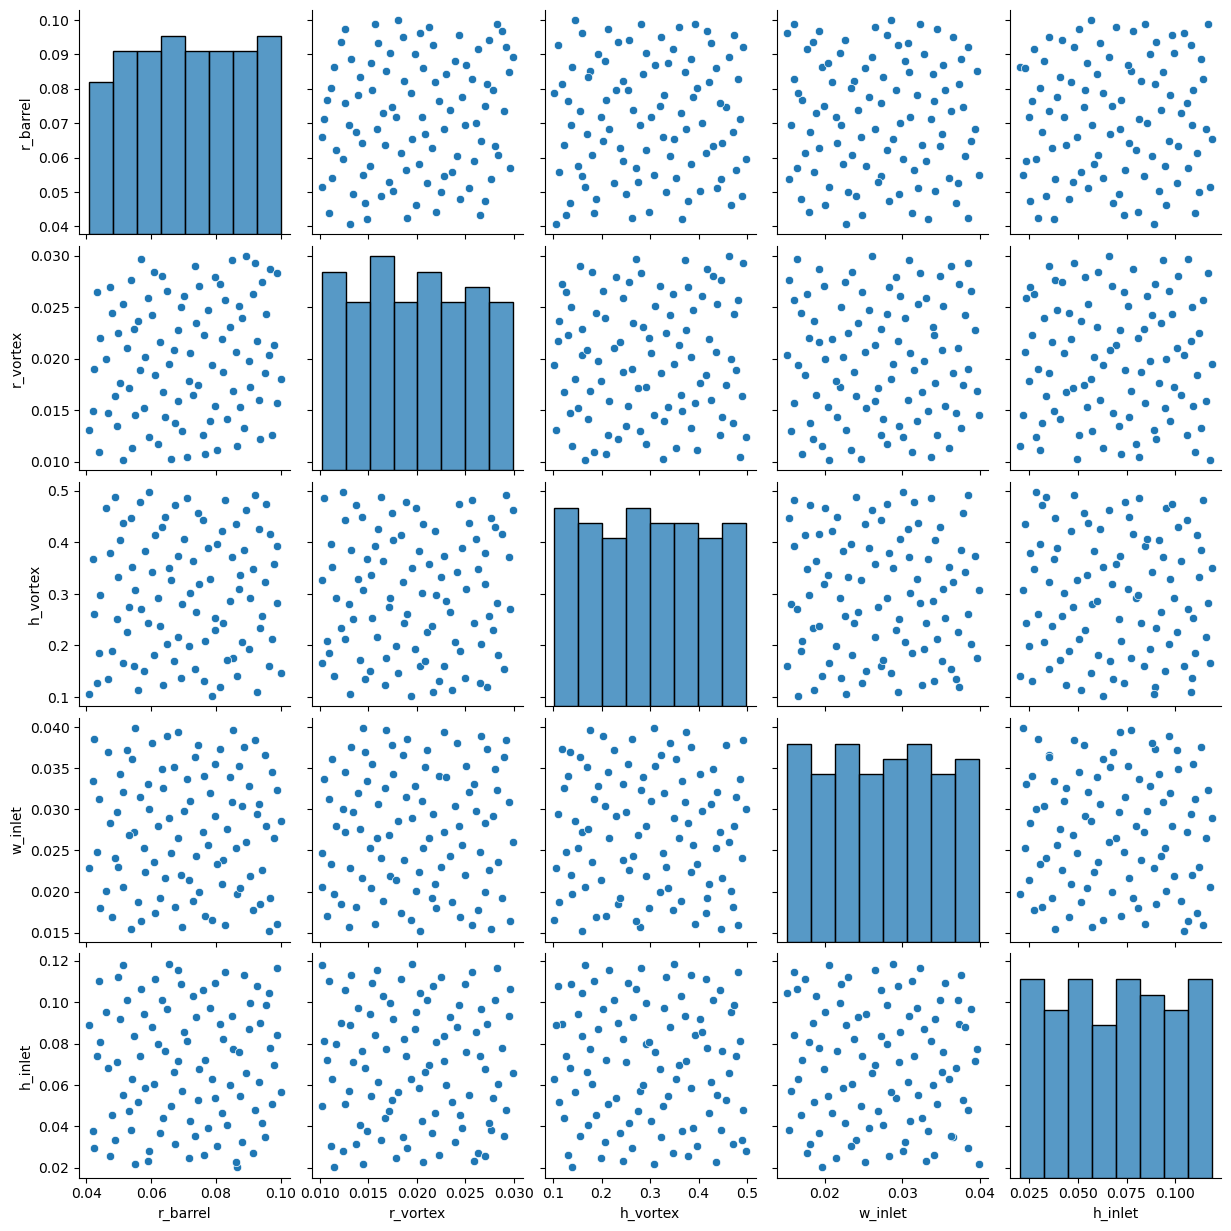

In [19]:
sns.pairplot(data = df, vars=['r_barrel', 'r_vortex', 'h_vortex', 'w_inlet', 'h_inlet'])
plt.show()

This shows us that each input is not only uniformly distributed, as we saw in the marginal distributions, but has **minimal correlation** with all other inputs. The heatmap below emphasizes this lack of correlation.

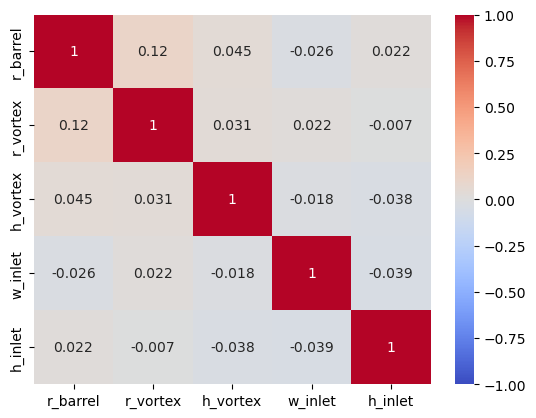

In [20]:
fig, ax = plt.subplots()

sns.heatmap(data = df.loc[:, ['r_barrel', 'r_vortex', 'h_vortex', 'w_inlet', 'h_inlet']].corr(),
            vmin=-1, vmax=1, center = 0,
            cmap='coolwarm',
            annot=True, annot_kws={'size': 10},
            ax=ax)

plt.show()

Note that all values are extremely close to zero except for `r_barrel` and `r_vortex`, which are only very slightly more correlated at 0.12.

### Variable Relationships: Continuous Outputs

Next, let's visualize the relationship of each output to all inputs. Since we will mostly be working with the transformed outputs throughout this report, we will skip directly to plotting against the log-transformed columns.

In [21]:
lf_copy = df_copy.drop(columns=['mass', 'pressure', 'pressure_shift']).copy().\
reset_index().\
rename(columns={'index': 'rowid'}).\
melt(id_vars=['rowid', 'model', 'log_mass', 'log_pressure', 'bin_mass'], 
     value_vars=['r_barrel', 'r_vortex', 'h_vortex', 'w_inlet', 'h_inlet'], 
     value_name='input_value',
     var_name='input_name',
     ignore_index=True)

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


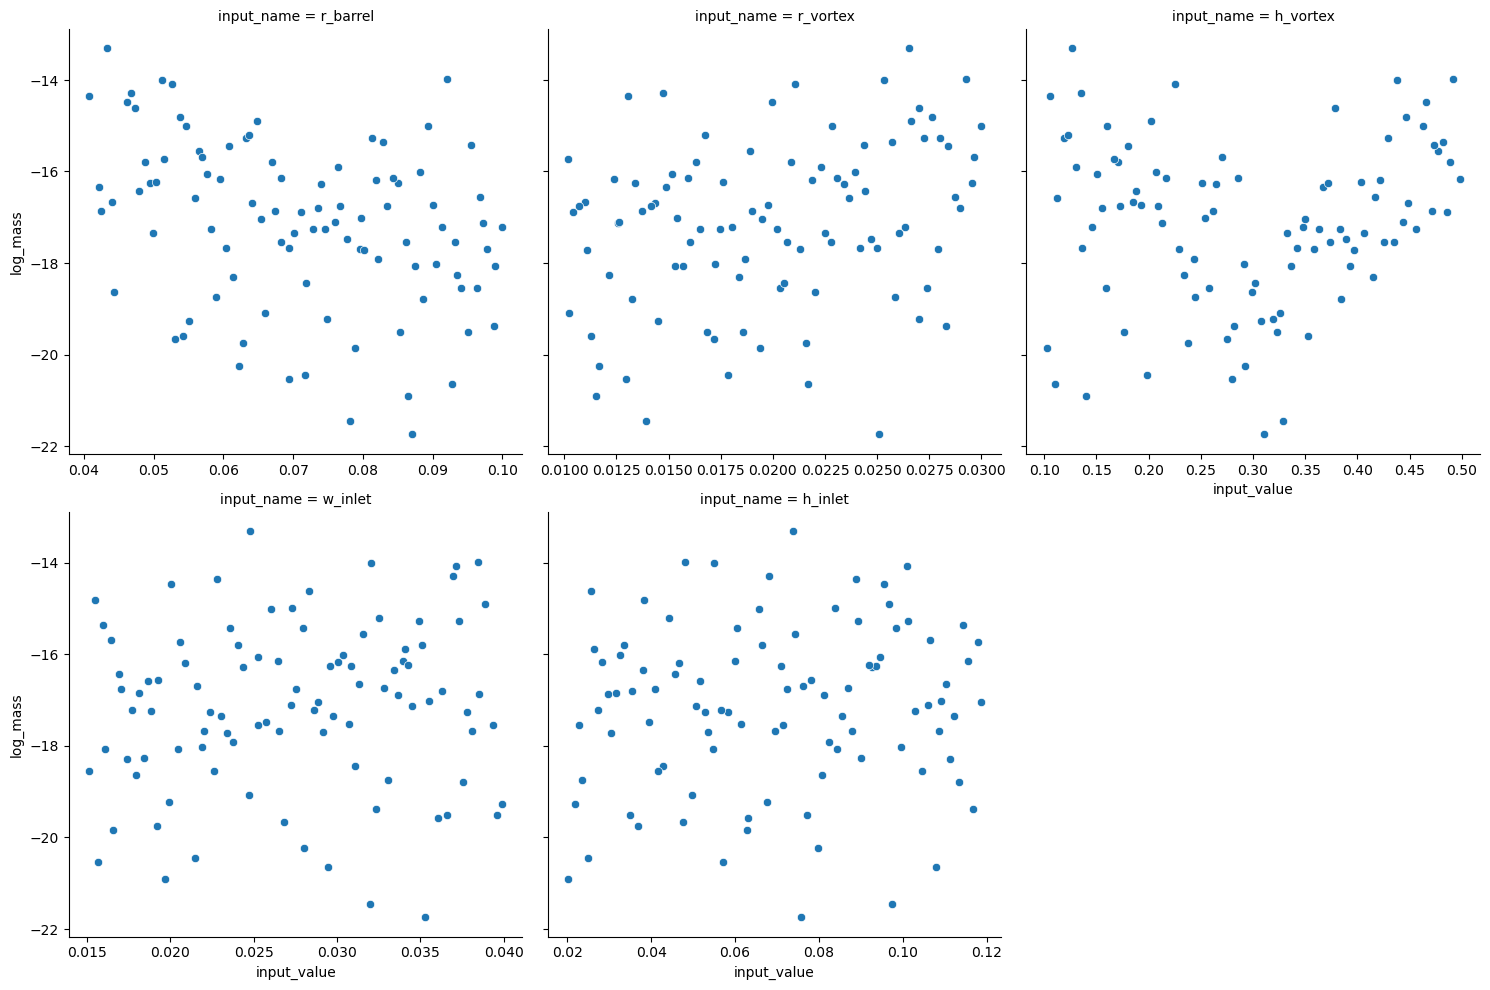

In [22]:
sns.relplot(data = lf_copy, x='input_value', y='log_mass', col='input_name',
            col_wrap=3, facet_kws={'sharex': False, 'sharey': True})

plt.show()

Although some shapes can be seen...

- Overall, the relationship between `r_barrel` and `log_mass` appears to be slightly negative.
- Overall, the relationship between `r_vortex` and `log_mass` appears to be slightly positive.
- Overall, values of `log_mass` appear to be lower as the value of `h_vortex` approaches the median, and higher as the value of `h_vortex` approaches the minimum or maximum.
- There doesn't appear to be a relationship between `log_mass` and the vortex inlet dimensions (`w_inlet`, `h_inlet`).

...it's difficult to make any confident assertions about the relationship between `log_mass` and the input variables from these scatter plots alone.

Next, we plot the `log_pressure` variable against all input variables.

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


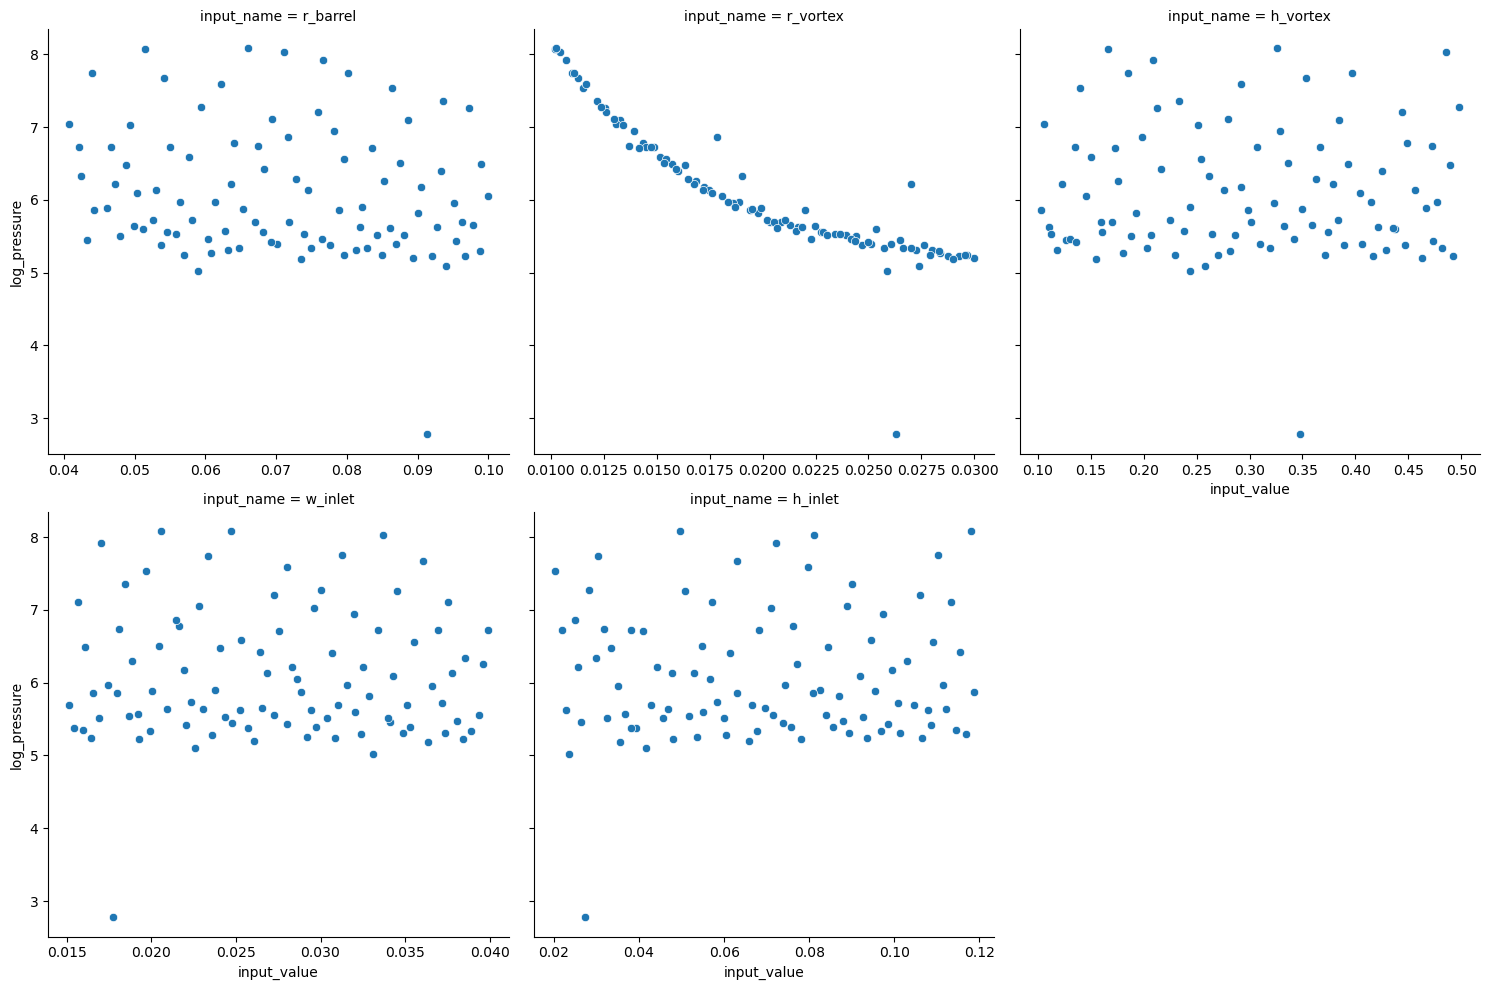

In [23]:
sns.relplot(data = lf_copy, x='input_value', y='log_pressure', col='input_name',
            col_wrap=3, facet_kws={'sharex': False, 'sharey': True})

plt.show()

It's similarly difficult to see a relationship between `log_pressure` and most of the inputs. However, we do gain two insights from these graphs:

- There is a very clear non-linear relationship between `r_vortex` and `log_pressure`.
- There is one observation that always appears very far away from the bulk of the other data points.

Let's add the output variables to the correlation plot to check the values against what we've observed in the facets above.

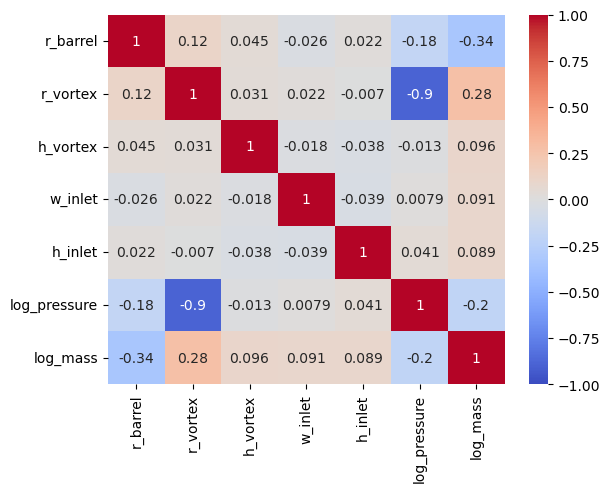

In [24]:
fig, ax = plt.subplots()

sns.heatmap(data = df_copy.loc[:, ['r_barrel', 'r_vortex', 'h_vortex', 'w_inlet', 'h_inlet', 'log_pressure', 'log_mass']].corr(),
            vmin=-1, vmax=1, center = 0,
            cmap='coolwarm',
            annot=True, annot_kws={'size': 10},
            ax=ax)

plt.show()

The -0.9 value between `r_vortex` and `log_pressure` supports the strong anti-correlation that we observed visually! We can also take note of some of the weaker correlation values that we might have missed without adding a trend line, such as the -0.34 between `r_barrel` and `log_mass`, the -0.18 between `r_barrel` and `log_pressure`, and the 0.28 between `r_vortex` and `log_mass`.

### Variable Relationships: Binary Outputs

Next, we'll move onto our categorical task, visualizing the relationships between inputs broken up by unique outcomes of `bin_mass`. Again, we can obtain an overview of all input variables at once using a pairs plot.

This time, we'll group by `bin_mass` using the `hue` argument to obtain the conditional distribution for each variable as well as the relationships between inputs.

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


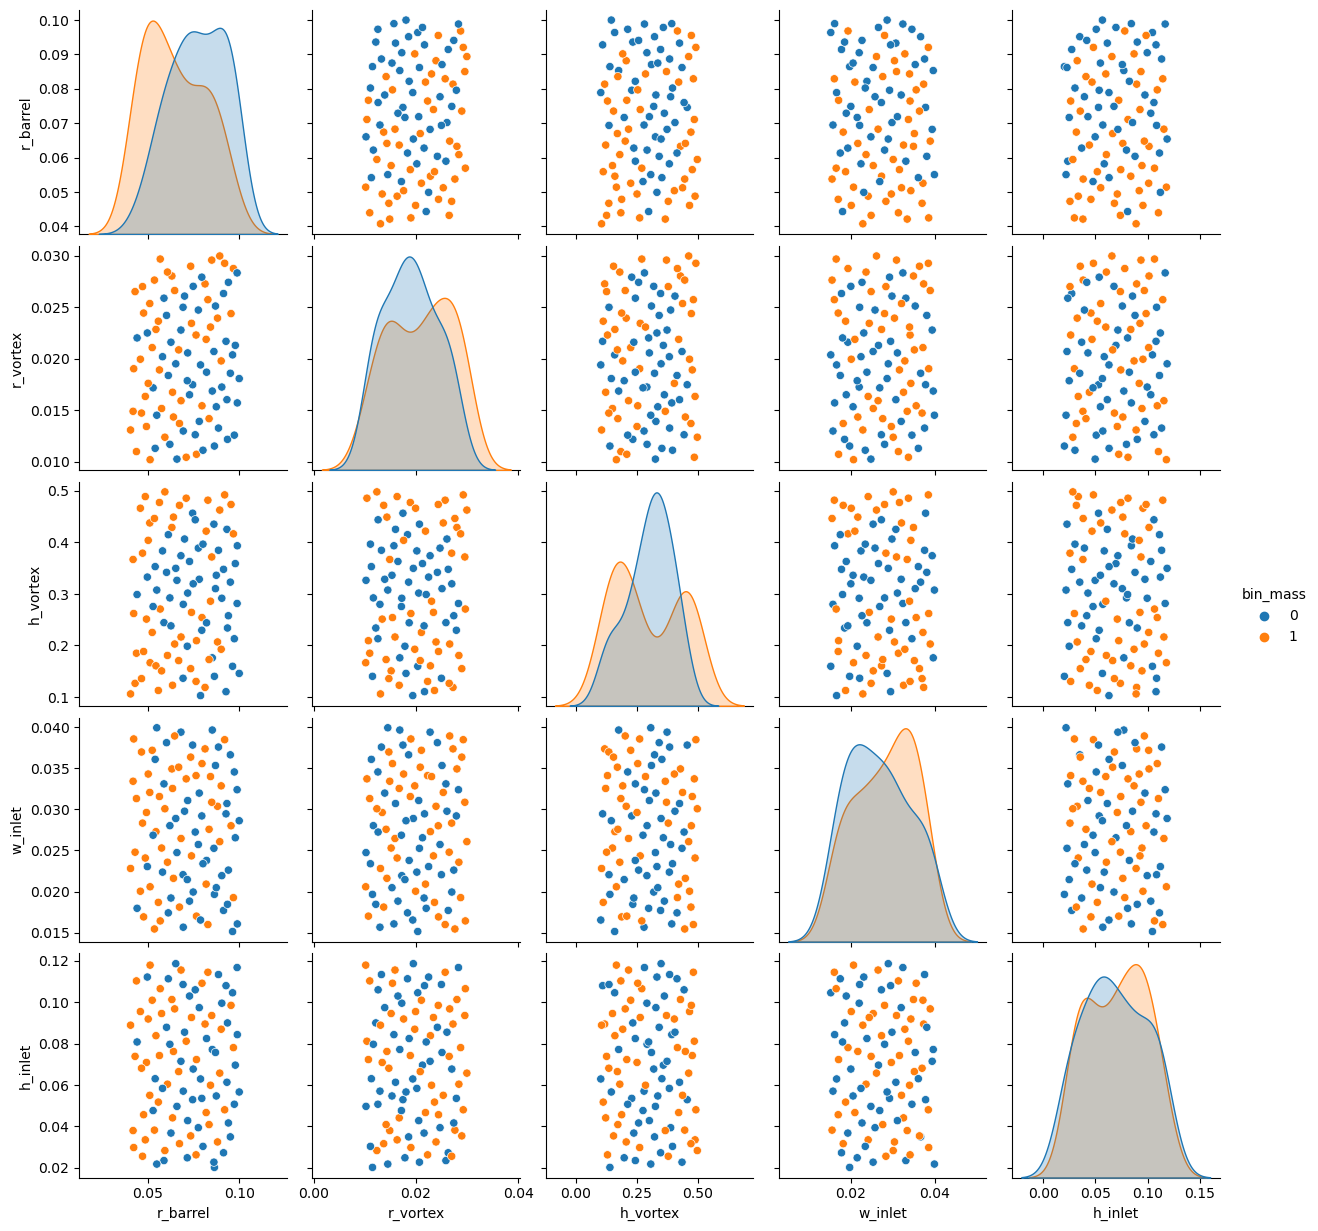

In [25]:
sns.pairplot(data = df_copy, vars=['r_barrel', 'r_vortex', 'h_vortex', 'w_inlet', 'h_inlet'], hue='bin_mass', diag_kws={'common_norm': False})
plt.show()

We can observe some interesting shapes in the conditional distributions here:

- `r_barrel`: the peak for `bin_mass` = 1 values is on the left, while the peak for `bin_mass` = 0 values is on the right. Most other inputs exhibit the opposite behavior, albeit only slightly.
- `h_vortex`: the distribution for `bin_mass` = 0 is shown as one tall peak in the center, with two lower peaks for `bin_mass` = 1 on either side.
- `r_vortex`, `w_inlet`, `h_inlet`: there is a lot of overlap between the distributions for each value of `bin_mass`. Note that the curve for `r_vortex` where `bin_mass` = 1 has two small peaks, though not as pronounced as the ones in `h_vortex`.

Let's take a closer look at the conditional shapes by graphing violin plots for each input. (To view each plot individually, refer to the supplemental notebook.)

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


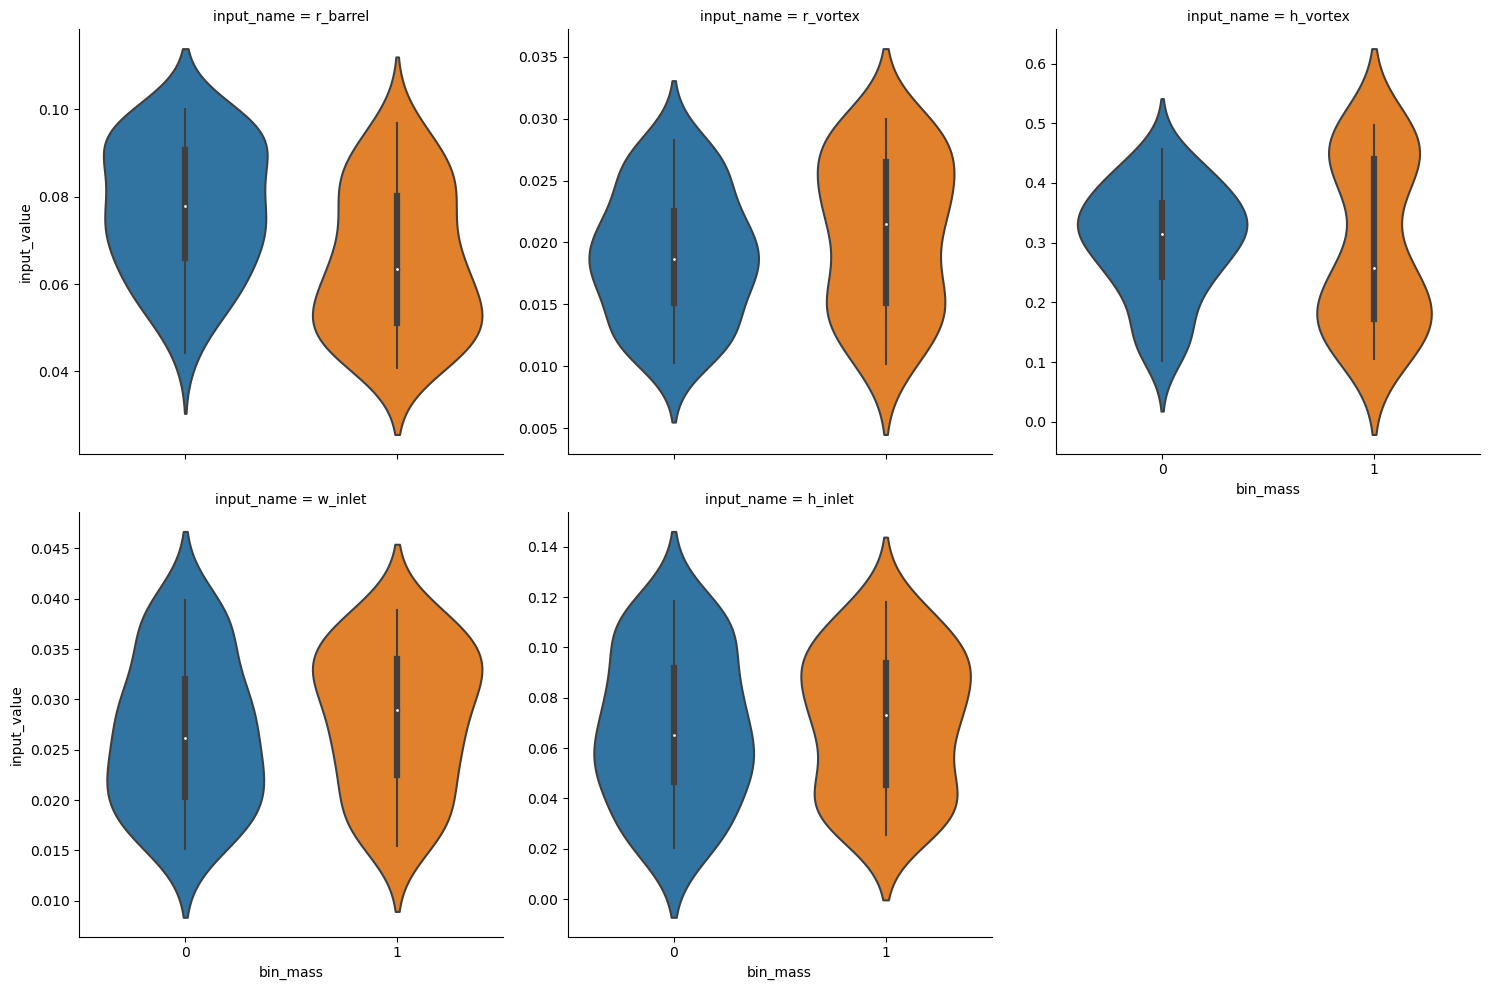

In [26]:
sns.catplot(data = lf_copy, y='input_value', x='bin_mass', col='input_name', kind='violin', col_wrap=3, sharey=False)
plt.show()

By looking at all of the graphs side by side, we see that they generally fall into one of two patterns:

- One outcome is more concentrated on the lower end of the input value, while the other outcome is more concentrated on the higher end (`r_barrel`, `w_inlet`). This behavior is somewhat more apparent in `r_barrel` than `w_inlet`.
- The `bin_mass` = 0 distribution is roughly Gaussian-like, while the `bin_mass` = 1 distribution exhibits two "peaks" at values higher and lower than the peak of `bin_mass` = 0 (`r_vortex`, `h_vortex`, `h_inlet`). This behavior is much more apparent in `h_vortex` than `r_vortex` and `h_inlet`.

Last, let's visualize the point plots for each input variable, to check if the average value of each input is different across outcome categories. (To view each point plot individually, refer to the supplemental notebook.)

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/categorical.py:3201: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)
/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


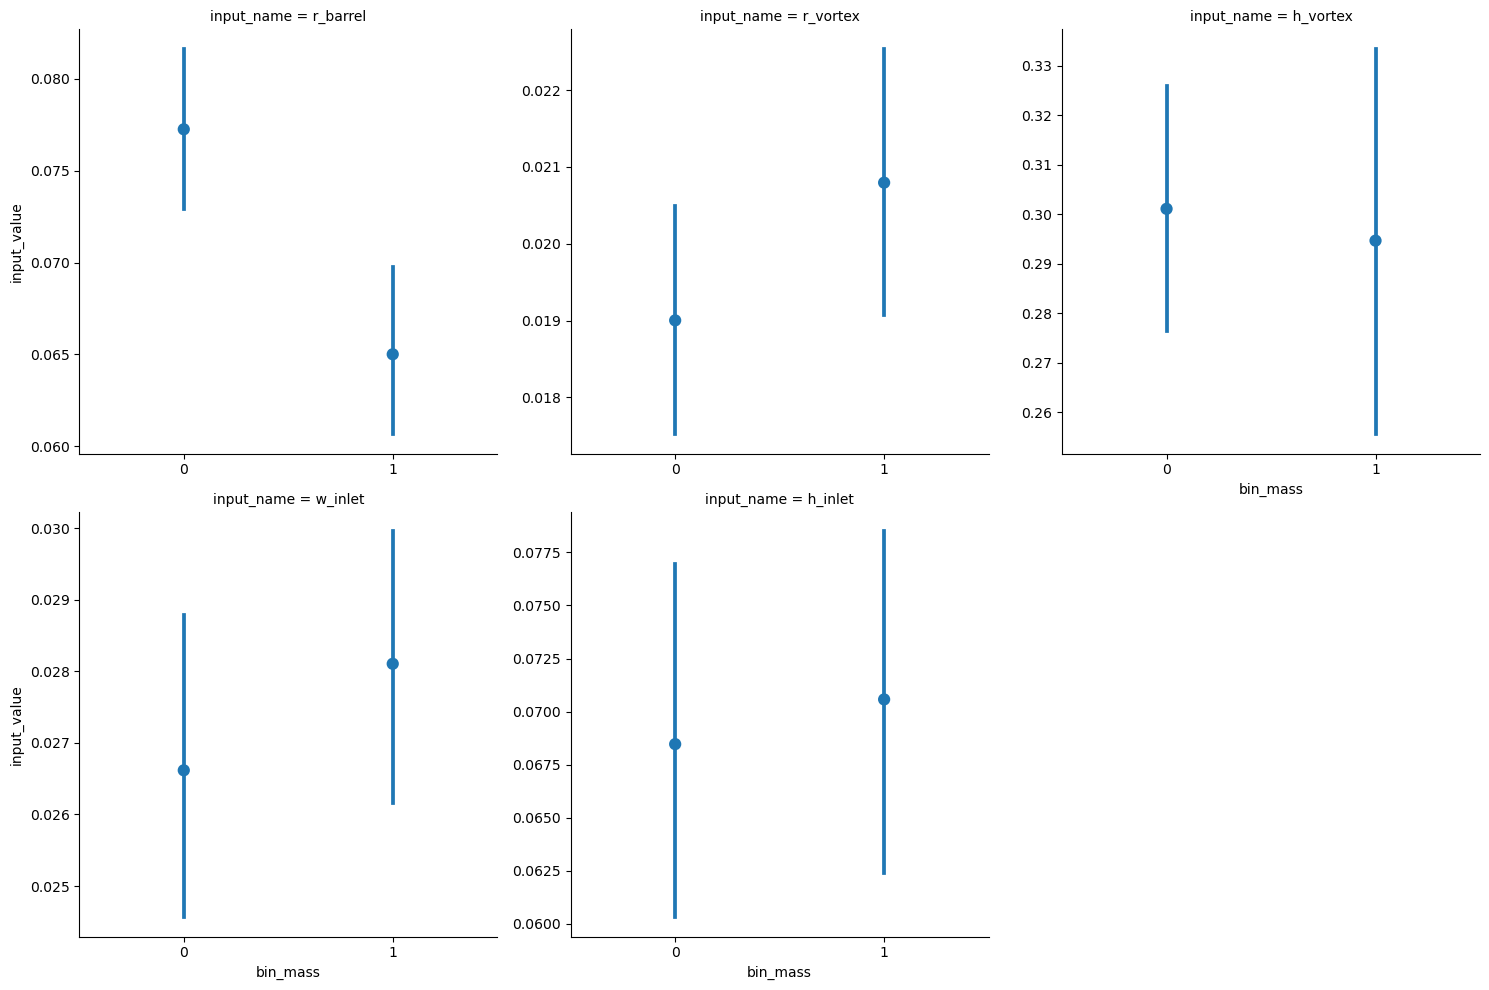

In [27]:
sns.catplot(data = lf_copy, y='input_value', x='bin_mass', col='input_name', kind='point', col_wrap=3, join=False, sharey=False, sharex=False)
plt.show()

Here, we can see that `r_barrel` exhibits the most obvious difference - `bin_mass` = 0 is associated with a higher average value, while `bin_mass` = 1 is associated with a lower average value. There is no overlap in confidence intervals, so we are confident that the averages are different across outcomes.

The rest of the inputs have more similar average values across categories. Of the remaining inputs, the averages for `r_vortex` are the most dissimilar, with the least amount of overlap.

### Summary

We have now concluded our abbreviated EDA for this report.

In summary, we have discovered that:

- All five inputs for this problem are **uniformly distributed** and **highly uncorrelated** with one another.
- Both outputs are **skewed** and require transformation before use in linear regression.
- There is a clear **non-linear relationship** between `r_vortex` and `log_pressure`.
- The outcome of a "high" `mass` value (`bin_mass` = 1) is associated with a **lower average value** of `r_barrel`, while the outcome of a "low" `mass` value (`bin_mass` = 0) is associated with a **higher average value** of `r_barrel`.
- The outcome of a "low" `mass` value appears to be associated with a **lower average value** of `r_vortex` and `w_inlet`, while the outcome of a "high" `mass` value appears to be associated with a **higher average value** of `r_vortex` and `w_inlet`. (There is some overlap in the confidence intervals of these averages; however, we felt that they were still relevant to mention.)
- The outcome of a "low" `mass` value is strongly associated with values of `h_vortex` that are **close to the median**, while the outcome of a "high" `mass` value is more commonly associated with values **on either side** of that "peak".

## Clustering

Next, we will discuss, implement, visualize, and interpret the results of clustering on the dataset.

A supplementary notebook is available for this section.

### Setup

Since the input for this problem was designed to be largely uncorrelated, we've decided to use the **transformed output** rather than the input for clustering. This way, we can apply those clusters to see if any meaningful divisions emerge within the input space.

The original output variables were both fairly skewed; therefore, we will use the natural log transformations of the two continuous output variables, `log_mass` and `log_pressure`. These transformations (as well as the marginal histograms for both the original and transformed columns for these variables) can be found in the EDA section of this notebook.

We will also standardize the variables. They aren't on wildly different orders of magnitude, but they are different, so it's good for us to place them on a similar scale.

There is no missing data in this data set - all cases are complete. Because of this, we don't need to drop any rows or otherwise handle missings in the data.

### Methodology

In the project proposal, we were asked to use KMeans to identify clusters. Then, we applied those clusters to the inputs as well as principal components generated through PCA. All previous KMeans clustering attempts have been included in the supplemental notebook, as well as additional attempts through hierarchical clustering.

In the main report, we will focus on (a) the optimal number of clusters using KMeans, (b) the optimal number of clusters using hierarchical clustering, and (c) comparing the two clustering results and selecting one to use for interpretation.

Once we've identified our clusters, we will visualize them over the transformed outputs to see how the space has been divided. Then, we can study the results by summarizing and visualizing the inputs associated with each of the cluster assignments. We will also compare the results of our clustering to the unique outcomes in our classification problem.

**Regarding PCA:** there are relatively few inputs and outputs for this problem, and the inputs have been specifically designed to be as close to uncorrelated as possible. Clustering with PCs derived from the outputs is carried out in the supplemental notebook for the sake of exploration. However, it is not included in the main notebook, as the benefits of performing PCA appear to be minimal for this application.

### Implementation

We will briefly implement clustering in this notebook in order to visualize and discuss the results.

#### KMeans

First, we'll work with KMeans.

We'll begin by importing additional modules for preprocessing, decomposition, and clustering from scikit-learn.

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Since we're interested in clustering on `log_mass` and `log_pressure`, let's copy those columns into a new dataframe and summarize them in a boxplot.

In [29]:
df_output_features = df_copy.loc[:,['log_pressure', 'log_mass']].copy()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


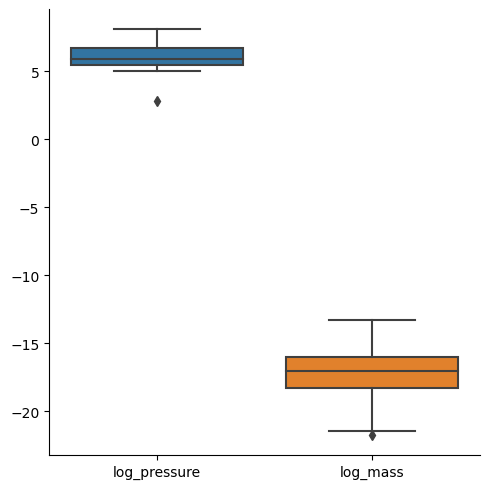

In [30]:
sns.catplot(data = df_output_features, kind='box')
plt.show()

The scales aren't *extremely* different, but they're different enough to benefit from standardization with `StandardScaler`.

In [31]:
Xdf_output_features = StandardScaler().fit_transform(df_output_features)

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


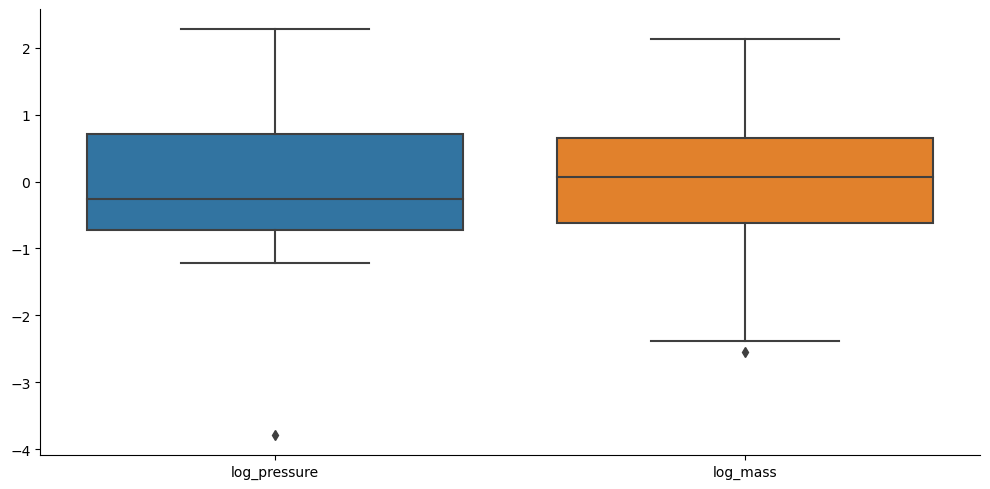

In [32]:
sns.catplot(data = pd.DataFrame(Xdf_output_features, columns=df_output_features.columns), kind='box', aspect=2)
plt.show()

Now, the variables are scaled similarly. Since we had no missing values to handle, this data is ready for KMeans.

However, we need to take a moment to figure out how many clusters to use. Let's generate a knee-bend plot.

In [33]:
tots_within = []

K = range(1, 46)

for k in K:
    km = KMeans(n_clusters=k, random_state=121, n_init=25, max_iter=500)
    km = km.fit(Xdf_output_features)
    
    tots_within.append(km.inertia_)

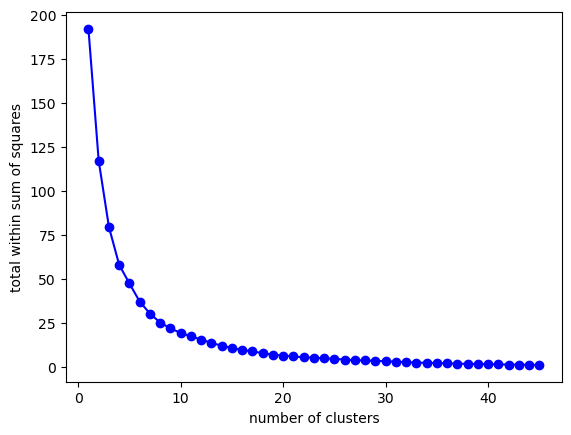

In [34]:
fig, ax = plt.subplots()

ax.plot(K, tots_within, 'bo-')
ax.set_xlabel('number of clusters')
ax.set_ylabel('total within sum of squares')

plt.show()

The knee-bend appears to begin straightening after 6, so we'll use 6 clusters. This is the value we've identified as the optimal number of clusters to use for this algorithm.

In [35]:
clusters_6 = KMeans(n_clusters=6, random_state=0, n_init=25, max_iter=500).fit_predict(Xdf_output_features)

After applying KMeans, write the cluster assignments into a fresh copy of the dataframe for visualization.

In [36]:
df_cluster_copy = df_copy.copy()
df_cluster_copy['k6'] = pd.Series(clusters_6, index=df_cluster_copy.index ).astype('category')

In [37]:
df_cluster_copy.k6.value_counts()

k6
0    27
4    25
1    19
3    14
2    10
5     1
Name: count, dtype: int64

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


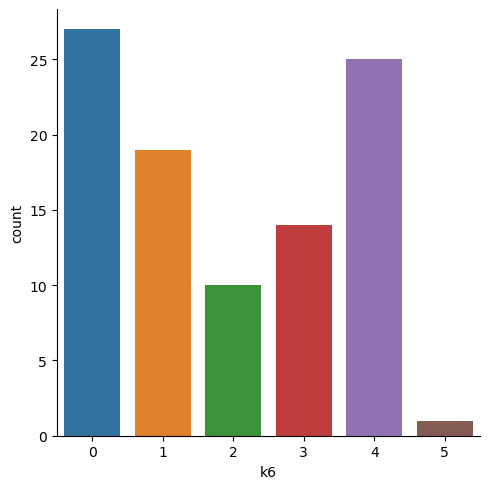

In [38]:
sns.catplot(data=df_cluster_copy, x='k6', kind='count')
plt.show()

The six clusters exhibit varying sizes. The largest cluster contains over 25 observations; the smallest contains only 1.

#### Hierarchical Clustering

Next, we'll work with hierarchical clustering.

We'll begin by importing the `hierarchy` module from scipy.

In [39]:
from scipy.cluster import hierarchy

There are many various kinds of linkages that we could use for hierarchical clustering. These options are explored more thoroughly in the supplemental report, but for the main notebook, we will focus on the outcome of ward linkage only.

In [40]:
hclust_ward = hierarchy.ward(Xdf_output_features)

Display the results in a dendrogram.

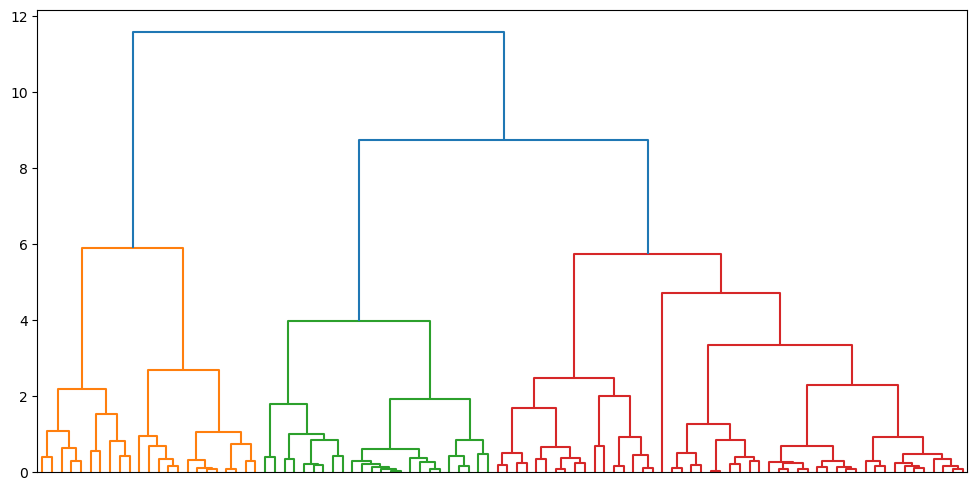

In [41]:
fig = plt.figure(figsize=(12, 6))

dn = hierarchy.dendrogram(hclust_ward, no_labels=True )

plt.show()

Next, we have to choose where to cut the dendrogram to form our clusters.

Generally, for hierarchical clustering, the optimal manner of cutting the graph involves maximizing the resulting number of clusters while minimizing sensitivity to the height of the cut. For this graph, we'll follow the suggestion and make a cut that results in 3 clusters.

In [42]:
df_cluster_copy['hclust_3'] = pd.Series(hierarchy.cut_tree(hclust_ward, n_clusters=3).ravel(),
                                     index=df_copy.index ).astype('category')

In [43]:
df_cluster_copy.hclust_3.value_counts()

hclust_3
1    49
0    24
2    23
Name: count, dtype: int64

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


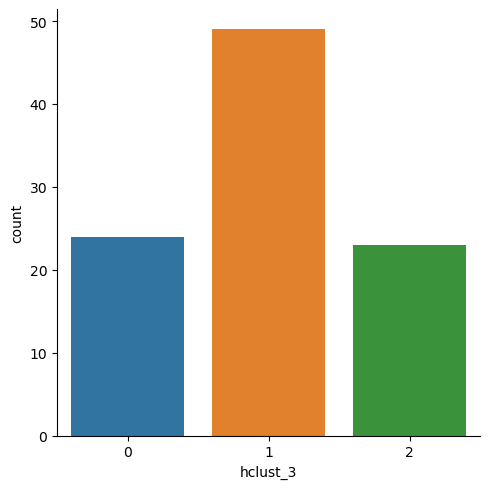

In [44]:
sns.catplot(data=df_cluster_copy, x='hclust_3', kind='count')
plt.show()

Two of the clusters are roughly the same size; the remaining cluster is about double the size of the others.

### Comparison: KMeans vs HClust

Even though we've determined the "optimal" number of clusters for each algorithm, it's a little difficult to justify the "best" number of clusters for this problem overall. There aren't any categories to align the continuous inputs and outputs with, so there aren't any obvious or existing groupings that we can use for comparison.

Let's start by looking at the cluster assignments of the outputs side by side.

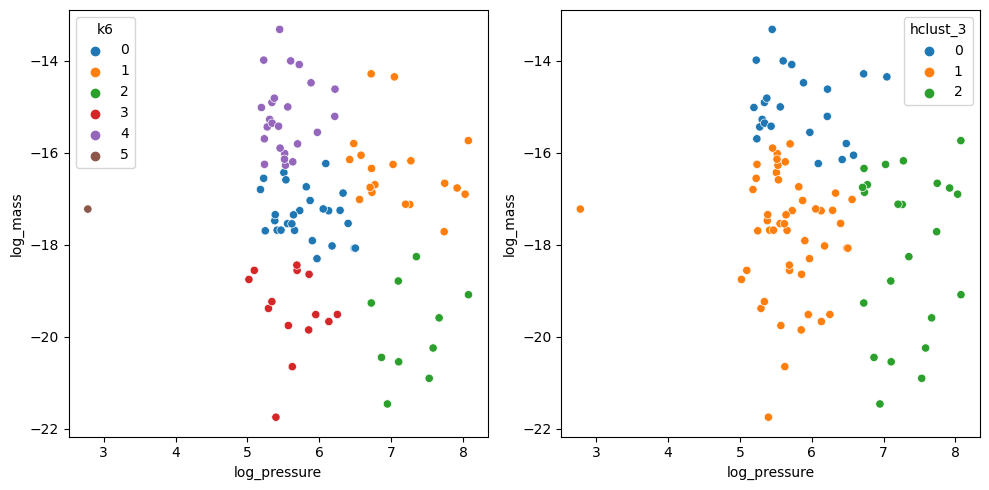

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

sns.scatterplot(data = df_cluster_copy, x='log_pressure', y='log_mass', hue='k6', ax=ax[0])
sns.scatterplot(data = df_cluster_copy, x='log_pressure', y='log_mass', hue='hclust_3', ax=ax[1])

plt.tight_layout()
plt.show()

Although we've used 6 clusters for KMeans and 3 clusters for hierarchical clustering, both algorithms have divided the space in a similar way - `hclust_3` cluster 0, the smallest cluster, is primarily associated with `k6` cluster 4, while the larger `hclust_3` clusters are each associated with two of the `k6` clusters. `hclust_3` cluster 2 contains mostly `k6` clusters 1 and 2, while `hclust_3` cluster 1 contains mostly `k6` clusters 0 and 3, as well as the single point in cluster 5.

Next, we'll summarize the continuous inputs associated with each of the cluster assignments.

Melt the cluster copy to long format to enable visualizing all inputs by facets:

In [46]:
lf_cluster_copy = df_cluster_copy.drop(columns=['mass', 'pressure', 'pressure_shift']).copy().\
reset_index().\
rename(columns={'index': 'rowid'}).\
melt(id_vars=['rowid', 'model', 'log_mass', 'log_pressure', 'bin_mass', 'hclust_3', 'k6'], 
     value_vars=['r_barrel', 'r_vortex', 'h_vortex', 'w_inlet', 'h_inlet'], 
     value_name='input_value',
     var_name='input_name',
     ignore_index=True)

Then, we'll look at the box and violin plots for each algorithm.

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/categorical.py:3201: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)
/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


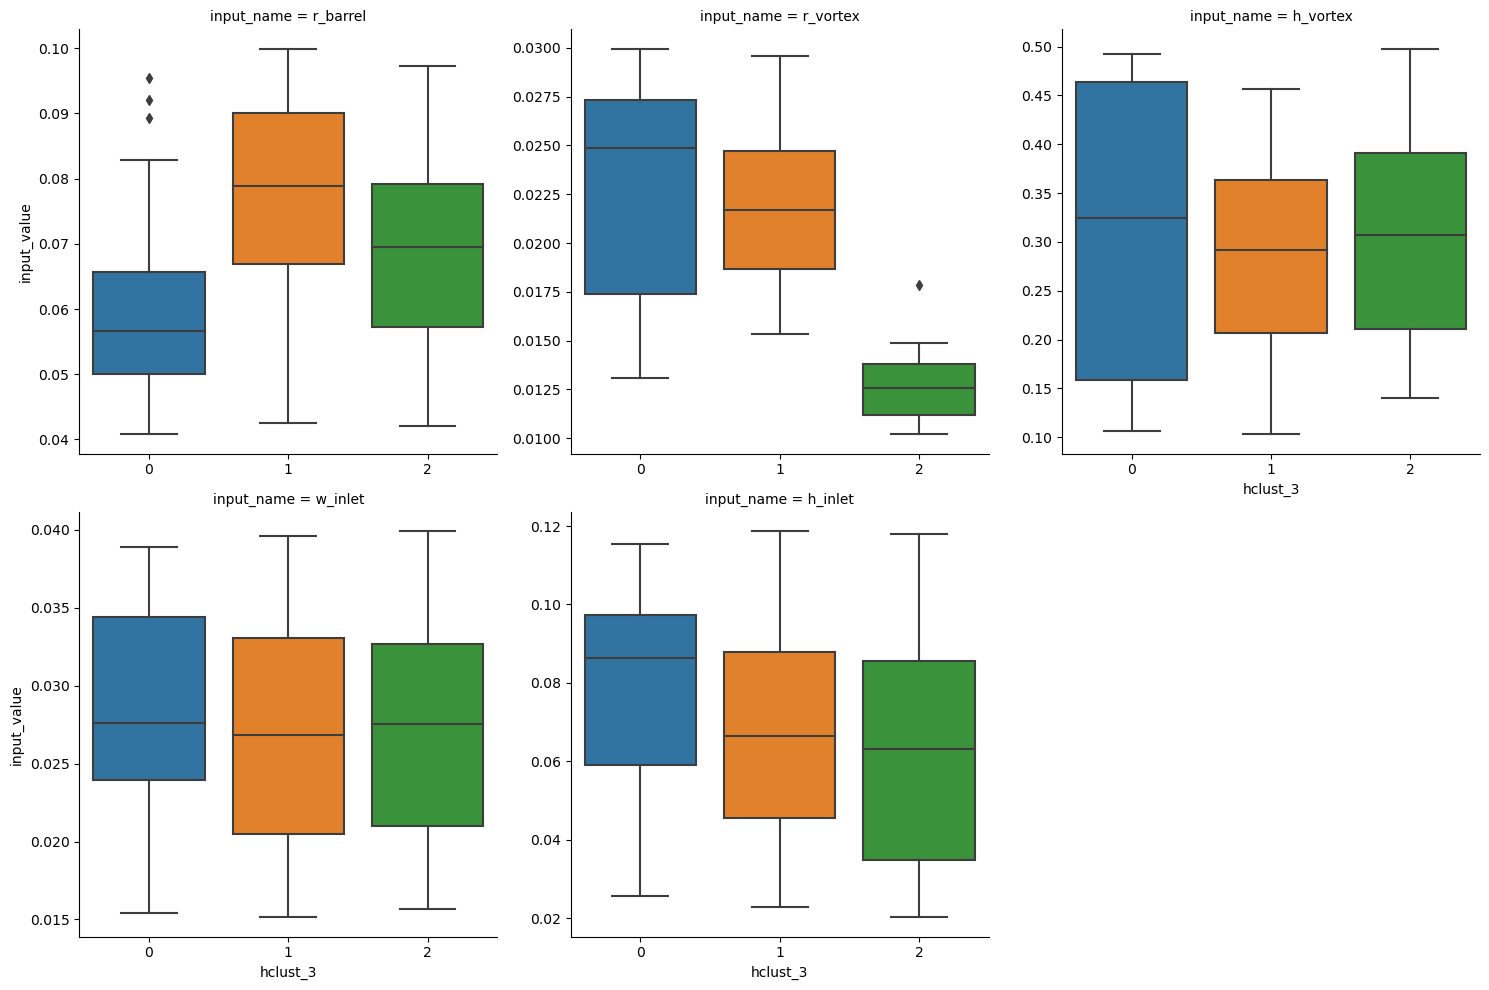

In [47]:
sns.catplot(data = lf_cluster_copy, x='hclust_3', y='input_value', col='input_name',
            col_wrap=3, kind='box', sharex=False, sharey=False)

plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/categorical.py:3201: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)
/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


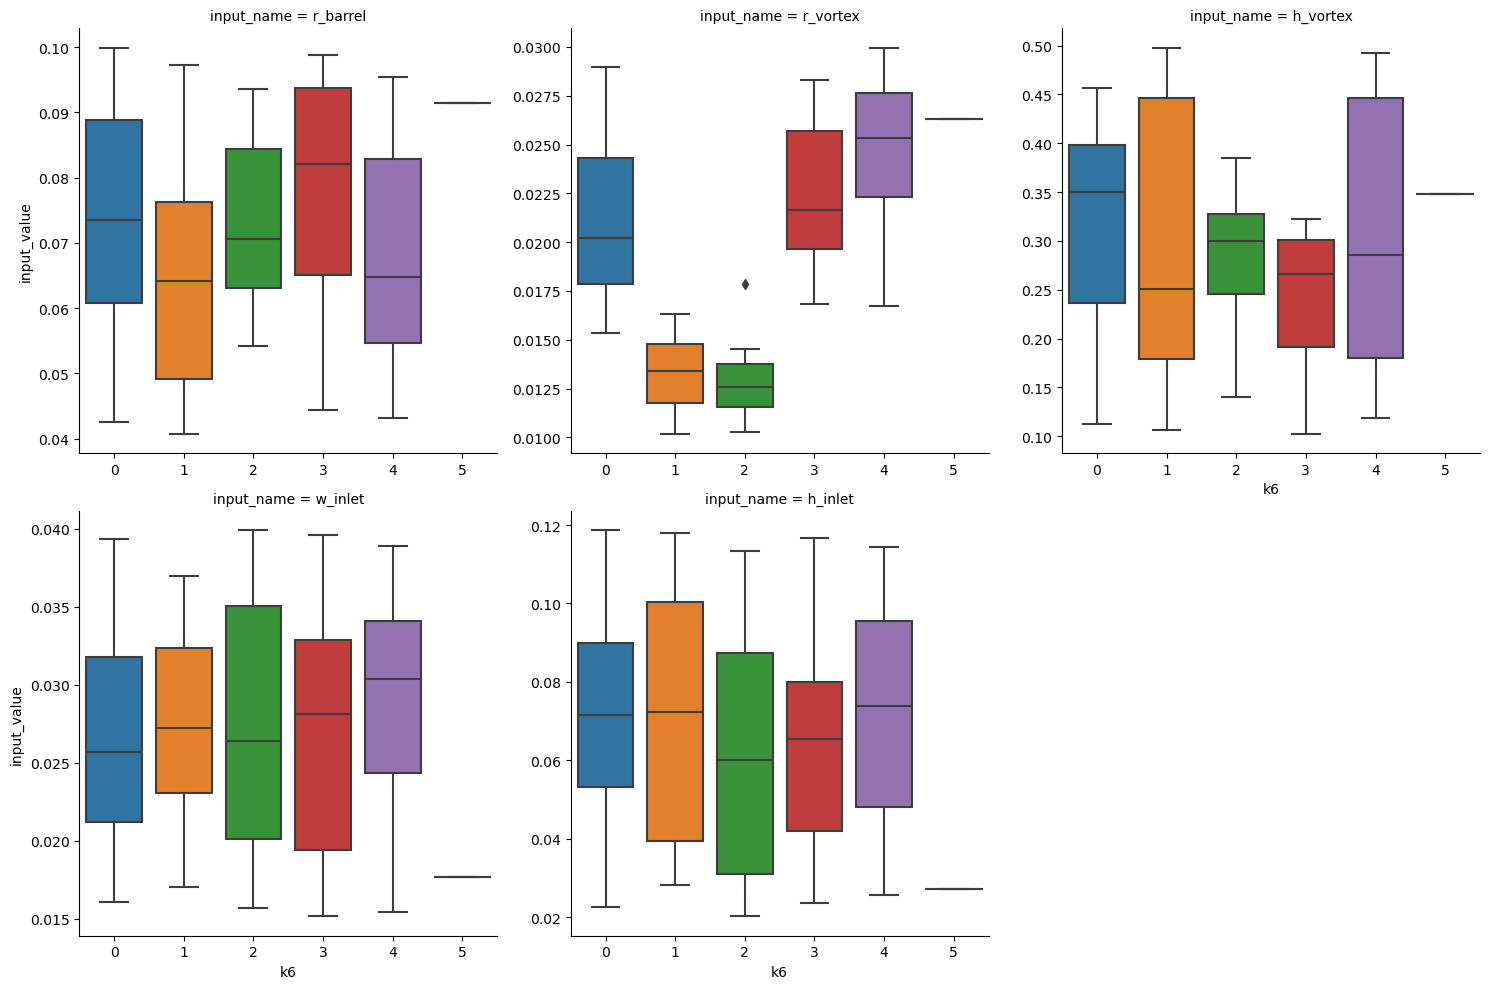

In [48]:
sns.catplot(data = lf_cluster_copy, x='k6', y='input_value', col='input_name',
            col_wrap=3, kind='box', sharex=False, sharey=False)

plt.show()

By looking at the boxplots, we can see that the summary statistics for most of the variables are quite similar across clusters, regardless of which algorithm was used.

The main exception to this is `r_vortex`, where `hclust_3` = 2 and `k6` = 1, 2 are associated with similar and significantly lower values of the input variable. We had previously identified these clusters as occupying approximately the same space between algorithms, so this is expected.

At this point, it is a bit tempting to say that the 3 clusters from hierarchical clustering are sufficient to group and describe the behavior of the inputs. However, there are still cases where the greater number of clusters in `k6` allows us to gain important information from looking more closely at smaller areas.

To illustrate this, let's look at the violin plot for all inputs:

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/categorical.py:3201: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)
/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


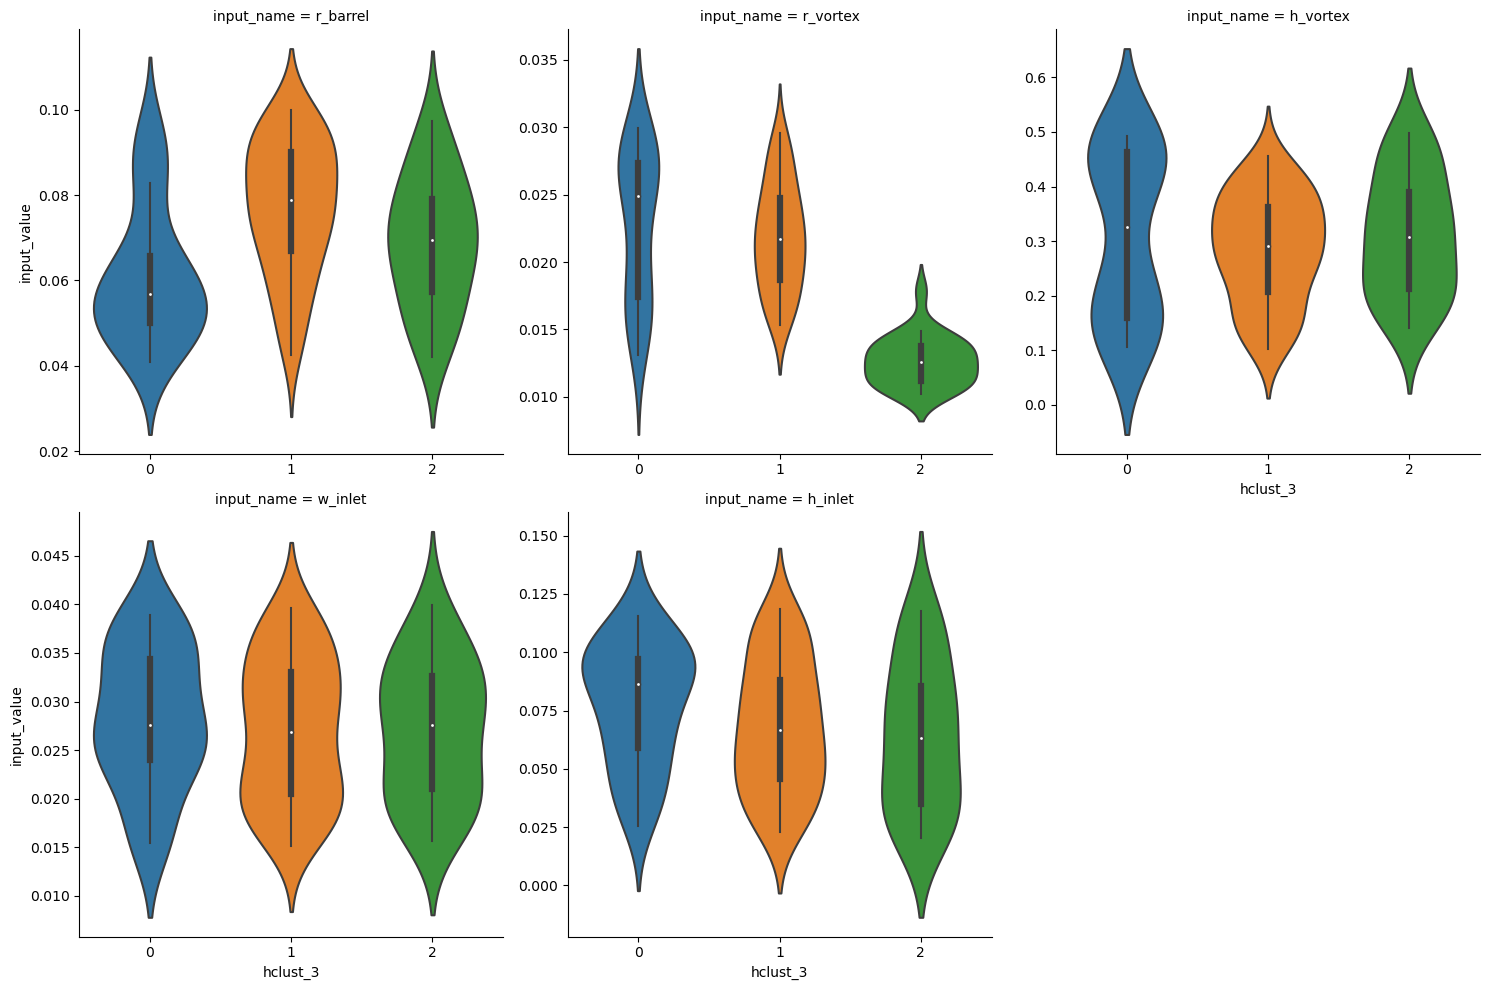

In [49]:
sns.catplot(data = lf_cluster_copy, x='hclust_3', y='input_value', col='input_name',
            col_wrap=3, kind='violin', sharex=False, sharey=False)

plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/categorical.py:3201: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)
/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


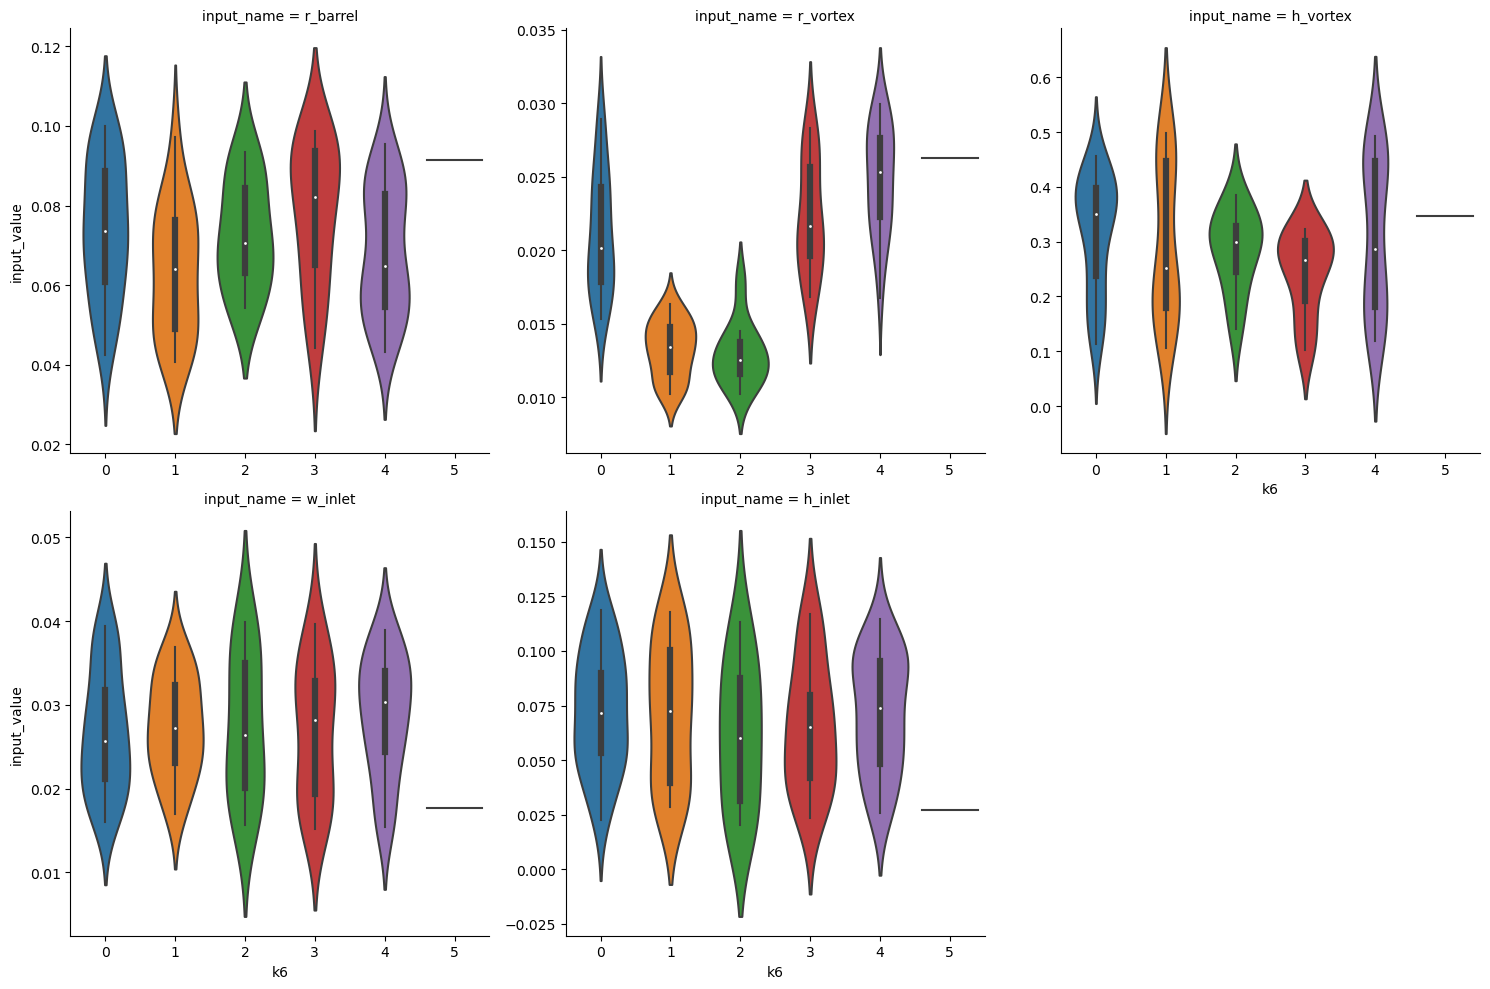

In [50]:
sns.catplot(data = lf_cluster_copy, x='k6', y='input_value', col='input_name',
            col_wrap=3, kind='violin', sharex=False, sharey=False)

plt.show()

Let's focus on `hclust_3` = 2 and `k6` = 1, 2 once again, but for `h_vortex` this time.

In these plots, it's much easier to tell that - despite being assigned to roughly the same observations as `hclust_3` = 2 - `k6` = 1 and `k6` = 2 have very different distributional shapes with respect to this input. In fact, we can even see that `k6` = 1 is much more similar to `k6` = 4, while `k6` = 2 is more similar to `k6` = 3!

The `hclust_3` clusters do split the input space meaningfully, but the `k6` clusters are able to split those spaces even further, allowing us to describe them in more specific ways. In other words, it's useful for us to break the large clusters into smaller clusters.

Because of this, we'll select **KMeans with 6 clusters** as our algorithm of choice to study for the remainder of this section.

### Interpretation

We've already carried out some interpretation of these cluster assignments while comparing the results to our `hclust_3` assignments. However, now that we've picked a method to focus on, there are a few more graphs for us to look at.

First, we'll look at the plots for `log_mass` and `log_pressure` for each input variable, to see if any meaningful patterns emerge from applying the results of clustering the output to the input space.

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


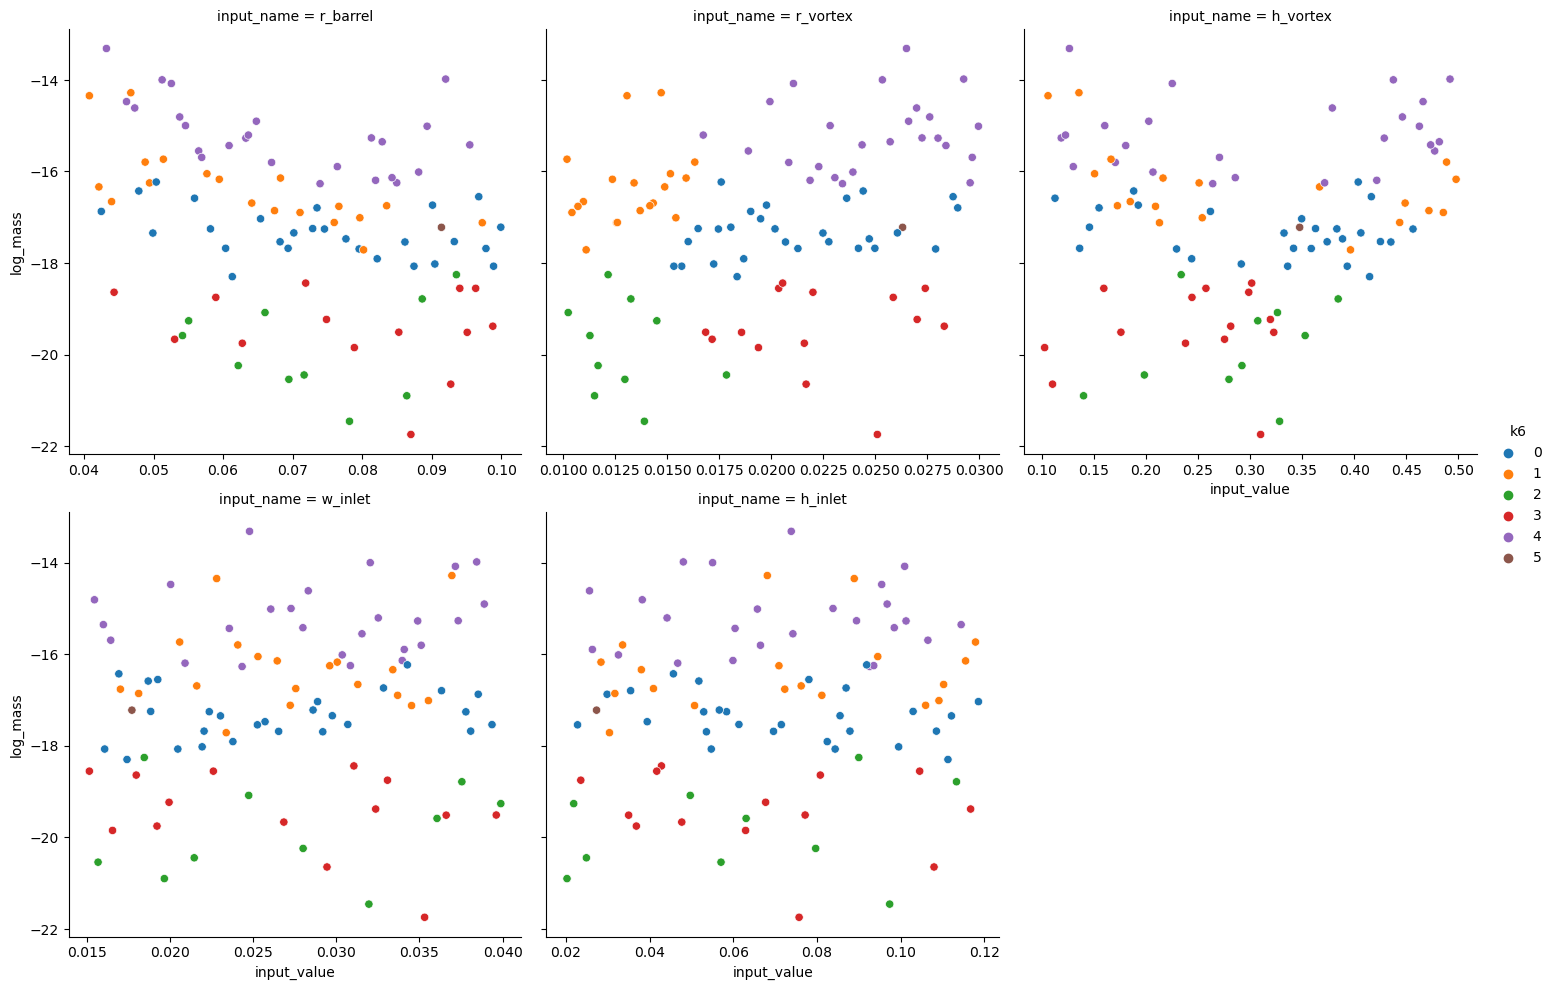

In [51]:
sns.relplot(data = lf_cluster_copy, x='input_value', y='log_mass', hue='k6', col='input_name',
            col_wrap=3, facet_kws={'sharex': False, 'sharey': True})

plt.show()

For all inputs, we see that clusters 2 and 3 are associated with 'lower' values of `log_mass`, while clusters 0 and 5 are associated with 'mid' values and clusters 1 and 4 are associated with 'high' values.

For most inputs, this holds true across the entire range of the input variable; however, for `r_vortex`, we can additionally observe that clusters 1 and 2 are associated with lower values of the input variable, while the remaining clusters are associated with mid and high values.

We also notice that, for `h_vortex`, clusters 1 and 4 only appear at low and high values of the input variable, not in the middle.

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


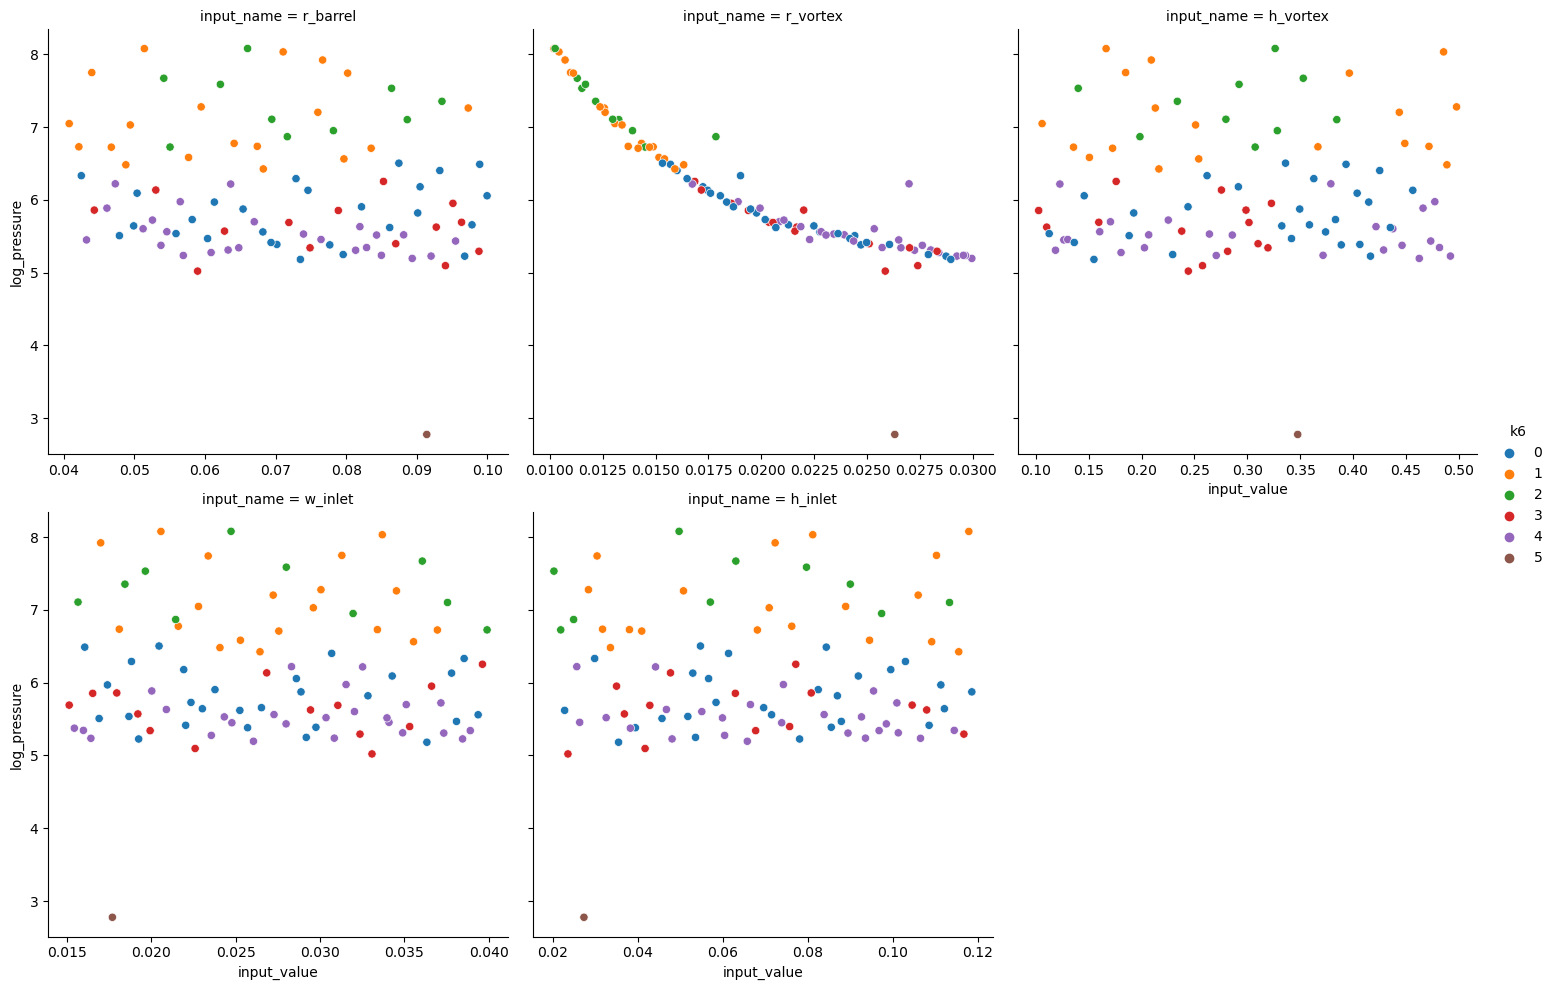

In [52]:
sns.relplot(data = lf_cluster_copy, x='input_value', y='log_pressure', hue='k6', col='input_name',
            col_wrap=3, facet_kws={'sharex': False, 'sharey': True})

plt.show()

For all inputs, we see that cluster 5 is located far away from the rest of the observations, while clusters 0, 3, and 4 are associated with relatively lower values of `log_pressure` and clusters 1 and 2 are associated with higher values. This holds across the entire range of input variables.

Next, for our categorical task, we'll examine the clusters with respect to the binary outcome of `bin_mass`:

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


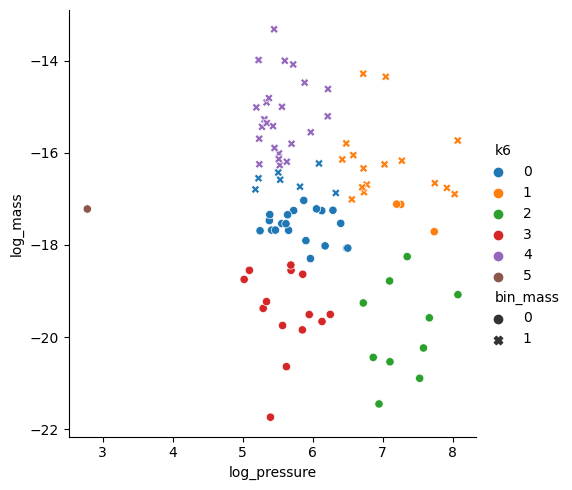

In [53]:
sns.relplot(data = df_cluster_copy, x='log_pressure', y='log_mass', hue='k6', style='bin_mass')
plt.show()

When we add `bin_mass` into the picture as a shape marker, we discover that all values for cluster 4 are associated with `bin_mass` = 1, as well as most of the values for cluster 1 and some of the values for cluster 0. All of the values for clusters 2, 3, and 5 are associated with `bin_mass` = 0, as well as most of the values for cluster 0 and some of the values for cluster 1.

Cluster 0 appears to have the greatest degree of "uncertainty" with respect to `bin_mass`, followed by cluster 1. We can visualize this by cross-tabulating the known outcomes of `bin_mass` against the clusters that they were associated with.

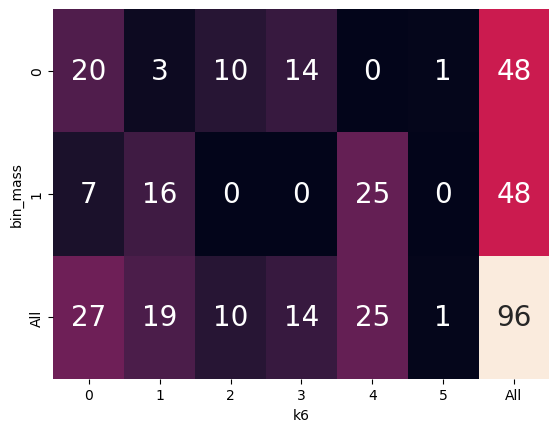

In [54]:
fig, ax = plt.subplots()

sns.heatmap(data = pd.crosstab(df_cluster_copy.bin_mass, df_cluster_copy.k6, margins=True ), 
            annot=True, annot_kws={"fontsize": 20}, fmt='g',
            cbar=False,
            ax=ax)

plt.show()

We have now concluded cluster analysis for this report.

## Models: Fitting and Interpretation

In this section, we will select, fit, and interpret the performance of various models on the training set.

Since the NETL cyclone project has 2 outputs and 0 categorical inputs, we will fit 4 models per output, for a total of 8 models overall.

### Setup

Before we begin modeling, we'll take a few steps to prepare our data.

First, we'll create two separate copies of the dataframe - one for each output. This will help us avoid confusion as we create models for our two distinct outputs.

Then, we'll perform any necessary transformations and standardization. As we've seen throughout this report, both outputs are highly skewed, so a transformation will be required to make the output more "Gaussian-like".

Note that this transformation should not be necessary for our classification problem, as we've already derived a symmetrical output by splitting `mass` into a binary outcome. However, we will still need to check the variables to ensure that the scale is appropriate.

Finally, we'll implement, interpret, and assess the performance on the training set for each of the eight models.

### Model Selection

Because the data for this project contains no categorical inputs, the scope of models that can be created is somewhat limited compared to some of the other project topics.

Three of the formulations that were suggested in the project instructions are appropriate for use with this data set:

- Intercept-only or constant average
- Continuous inputs with linear additive features
- Continuous inputs with linear main effect and pairwise interactions

For the final model for each output, we will use a model with interaction features based on potential non-linear relationships that we noticed during EDA.

- For `pressure`, we noticed that the output appeared to have a logarithmic relationship with `r_vortex`.
- For `mass`, we noticed that the output appeared to have a have a quadratic relationship with `h_vortex`.

### Preprocessing

We'll begin by importing the statsmodels formula API module.

In [55]:
import statsmodels.formula.api as smf

Then, we'll split our data. We can use the `df_copy` dataframe, as this dataframe already contains the log-transformed and binary outputs that we need for modeling.

In [56]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   model           96 non-null     int64  
 1   r_barrel        96 non-null     float64
 2   r_vortex        96 non-null     float64
 3   h_vortex        96 non-null     float64
 4   w_inlet         96 non-null     float64
 5   h_inlet         96 non-null     float64
 6   mass            96 non-null     float64
 7   pressure        96 non-null     float64
 8   log_mass        96 non-null     float64
 9   pressure_shift  96 non-null     float64
 10  log_pressure    96 non-null     float64
 11  bin_mass        96 non-null     int64  
dtypes: float64(10), int64(2)
memory usage: 9.1 KB


Copy the relevant columns into one dataframe for `pressure`...

In [57]:
df_pressure = df_copy[['r_barrel', 'r_vortex', 'h_vortex', 'w_inlet', 'h_inlet', 'log_pressure']].copy()

In [58]:
df_pressure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   r_barrel      96 non-null     float64
 1   r_vortex      96 non-null     float64
 2   h_vortex      96 non-null     float64
 3   w_inlet       96 non-null     float64
 4   h_inlet       96 non-null     float64
 5   log_pressure  96 non-null     float64
dtypes: float64(6)
memory usage: 4.6 KB


...and one dataframe for `mass`.

In [59]:
df_mass = df_copy[['r_barrel', 'r_vortex', 'h_vortex', 'w_inlet', 'h_inlet', 'bin_mass']].copy()

In [60]:
df_mass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   r_barrel  96 non-null     float64
 1   r_vortex  96 non-null     float64
 2   h_vortex  96 non-null     float64
 3   w_inlet   96 non-null     float64
 4   h_inlet   96 non-null     float64
 5   bin_mass  96 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 4.6 KB


Next, let's check out the scale of the variables in `df_pressure`. (The input variables will be the same in `df_mass`, and we already know that the `bin_mass` is always either 0 or 1, so we don't have to check it separately.)

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


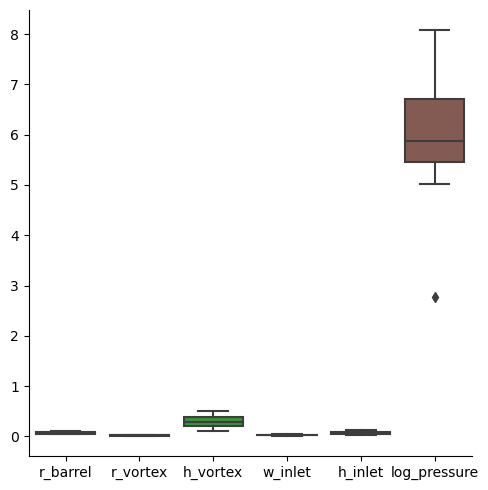

In [61]:
sns.catplot(data = df_pressure[['r_barrel', 'r_vortex', 'h_vortex', 'w_inlet', 'h_inlet', 'log_pressure']], kind='box')
plt.show()

The scales of some variables are different, so this data should be standardized before modeling.

We'll use `StandardScaler` and replace the values in the dataframe with their standardized counterparts. Note that we won't scale the binary outcome of `bin_mass`.

In [62]:
df_pressure[['r_barrel', 'r_vortex', 'h_vortex', 'w_inlet', 'h_inlet', 'log_pressure']] = StandardScaler().fit_transform(df_pressure[['r_barrel', 'r_vortex', 'h_vortex', 'w_inlet', 'h_inlet', 'log_pressure']])

In [63]:
df_mass[['r_barrel', 'r_vortex', 'h_vortex', 'w_inlet', 'h_inlet']] = StandardScaler().fit_transform(df_mass[['r_barrel', 'r_vortex', 'h_vortex', 'w_inlet', 'h_inlet']])

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


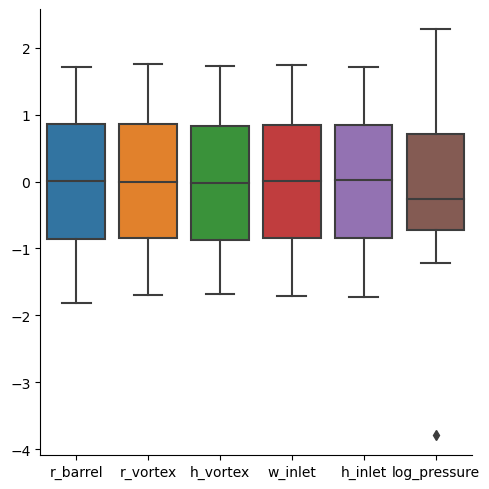

In [64]:
sns.catplot(data = df_pressure, kind='box')
plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


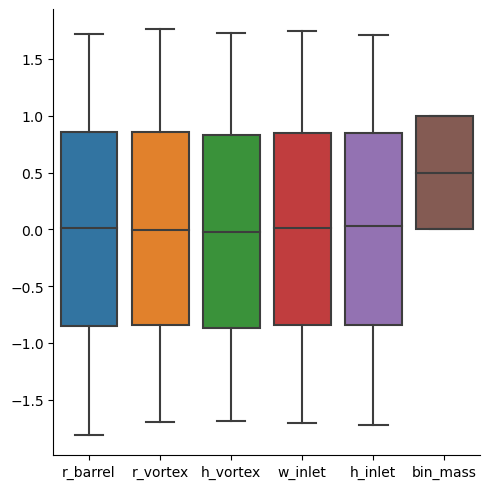

In [65]:
sns.catplot(data = df_mass, kind='box')
plt.show()

We will also define the helper function used in lecture to plot regression coefficients:

In [164]:
def my_coefplot(mod, figsize_use=(10, 4)):
    """
    This is a function that takes a fitted model and graphs all regression coefficient
    values, along with an error bar based on the standard error.
    """
    fig, ax = plt.subplots(figsize=figsize_use)
    
    ax.errorbar(y=mod.params.index,
                x=mod.params,
                xerr = 2 * mod.bse,
                fmt='o', color='k', ecolor='k', elinewidth=2, ms=10)
    
    ax.axvline(x=0, linestyle='--', linewidth=3.5, color='grey')
    ax.set_xlabel('coefficient value')
    
    plt.show()

Now, we should be ready to start fitting models.

### Model 1: Intercept-only (`log_pressure`)

First, we'll work on our regression task.

This is our simplest model, the intercept-only model.

#### Implementation

In [67]:
fit_m1 = smf.ols(formula='log_pressure ~ 1', data=df_pressure).fit()

In [68]:
print(fit_m1.summary())

                            OLS Regression Results                            
Dep. Variable:           log_pressure   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 03 Aug 2024   Prob (F-statistic):                nan
Time:                        14:39:59   Log-Likelihood:                -136.22
No. Observations:                  96   AIC:                             274.4
Df Residuals:                      95   BIC:                             277.0
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.163e-17      0.103  -4.06e-16      1.0

#### Interpretation

As expected, we have estimated one coefficient: the intercept.

In [69]:
fit_m1.params

Intercept   -4.163336e-17
dtype: float64

Using a p-value threshold of 0.05, this coefficient does not appear to be statistically significant.

In [70]:
fit_m1.pvalues < 0.05

Intercept    False
dtype: bool

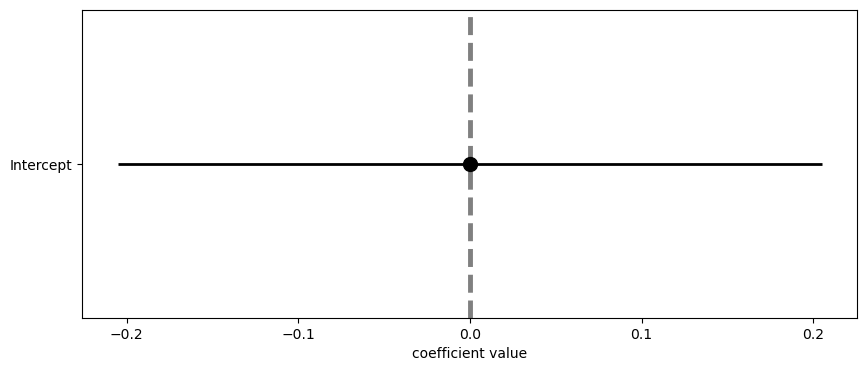

In [71]:
my_coefplot(fit_m1)

### Model 2: Linear additive features (`log_pressure`)

This is a model using only linear additive features of the data set.

#### Implementation

In [72]:
fit_m2 = smf.ols(formula='log_pressure ~ r_barrel + r_vortex + h_vortex + w_inlet + h_inlet', data=df_pressure).fit()

In [73]:
print(fit_m2.summary())

                            OLS Regression Results                            
Dep. Variable:           log_pressure   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     76.91
Date:                Sat, 03 Aug 2024   Prob (F-statistic):           5.60e-31
Time:                        14:39:59   Log-Likelihood:                -56.414
No. Observations:                  96   AIC:                             124.8
Df Residuals:                      90   BIC:                             140.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.286e-17      0.046  -1.59e-15      1.0

#### Interpretation

We have estimated six coefficients: the intercept and the five continuous inputs.

In [74]:
fit_m2.params

Intercept   -7.285839e-17
r_barrel    -8.009827e-02
r_vortex    -8.871173e-01
h_vortex     1.994493e-02
w_inlet      2.738776e-02
h_inlet      3.872416e-02
dtype: float64

Using a p-value threshold of 0.05, only the `r_vortex` coefficient appears to be statistically significant.

In [75]:
fit_m2.pvalues < 0.05

Intercept    False
r_barrel     False
r_vortex      True
h_vortex     False
w_inlet      False
h_inlet      False
dtype: bool

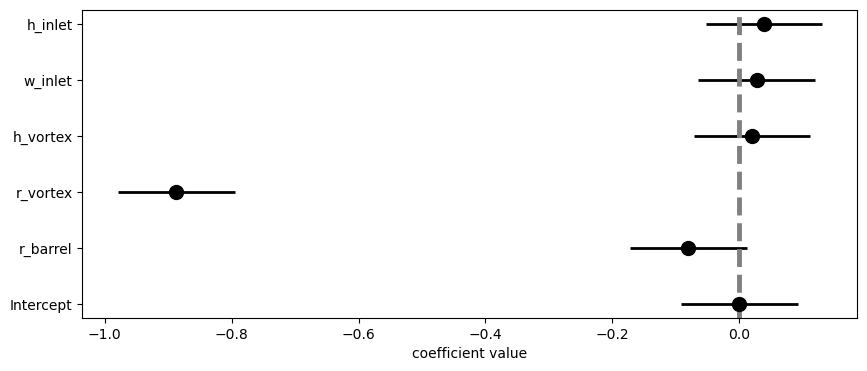

In [76]:
my_coefplot(fit_m2)

It is negative and has a magnitude of 0.8871173.

In [77]:
np.abs(fit_m2.params).sort_values(ascending=False)

r_vortex     8.871173e-01
r_barrel     8.009827e-02
h_inlet      3.872416e-02
w_inlet      2.738776e-02
h_vortex     1.994493e-02
Intercept    7.285839e-17
dtype: float64

### Model 3: Linear main effect and pairwise interactions (`log_pressure`)

This is a model using all linear main effects and their pairwise interactions only.

#### Implementation

In [78]:
fit_m3 = smf.ols(formula='log_pressure ~ (r_barrel + r_vortex + h_vortex + w_inlet + h_inlet) ** 2', data=df_pressure).fit()

In [79]:
print(fit_m3.summary())

                            OLS Regression Results                            
Dep. Variable:           log_pressure   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     27.63
Date:                Sat, 03 Aug 2024   Prob (F-statistic):           1.85e-25
Time:                        14:39:59   Log-Likelihood:                -48.795
No. Observations:                  96   AIC:                             129.6
Df Residuals:                      80   BIC:                             170.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0023      0.04

#### Interpretation

We have estimated a total of sixteen coefficients: one intercept, five main effects, and ten interactions between unique input pairs.

In [80]:
fit_m3.params

Intercept           -0.002330
r_barrel            -0.092702
r_vortex            -0.906712
h_vortex             0.022050
w_inlet              0.025458
h_inlet              0.028127
r_barrel:r_vortex   -0.021709
r_barrel:h_vortex    0.041600
r_barrel:w_inlet     0.089553
r_barrel:h_inlet     0.098095
r_vortex:h_vortex    0.055914
r_vortex:w_inlet     0.082362
r_vortex:h_inlet     0.049549
h_vortex:w_inlet     0.051505
h_vortex:h_inlet     0.007186
w_inlet:h_inlet     -0.028276
dtype: float64

Three of these coefficients are considered statistically significant using the conventional threshold: `r_barrel`, which is negative, `r_vortex`, which is negative, and the interaction `r_barrel:h_inlet`, which is positive.

In [81]:
fit_m3.pvalues < 0.05

Intercept            False
r_barrel              True
r_vortex              True
h_vortex             False
w_inlet              False
h_inlet              False
r_barrel:r_vortex    False
r_barrel:h_vortex    False
r_barrel:w_inlet     False
r_barrel:h_inlet      True
r_vortex:h_vortex    False
r_vortex:w_inlet     False
r_vortex:h_inlet     False
h_vortex:w_inlet     False
h_vortex:h_inlet     False
w_inlet:h_inlet      False
dtype: bool

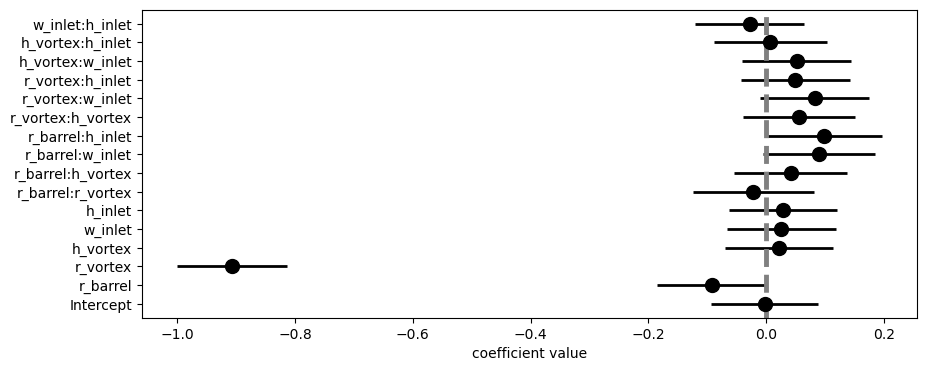

In [82]:
my_coefplot(fit_m3)

The two statistically significant coefficients with the highest magnitudes are `r_vortex`, with a magnitude of 0.906712, and `r_barrel:h_inlet`, with a magnitude of 0.098095.

In [83]:
np.abs(fit_m3.params).sort_values(ascending=False)

r_vortex             0.906712
r_barrel:h_inlet     0.098095
r_barrel             0.092702
r_barrel:w_inlet     0.089553
r_vortex:w_inlet     0.082362
r_vortex:h_vortex    0.055914
h_vortex:w_inlet     0.051505
r_vortex:h_inlet     0.049549
r_barrel:h_vortex    0.041600
w_inlet:h_inlet      0.028276
h_inlet              0.028127
w_inlet              0.025458
h_vortex             0.022050
r_barrel:r_vortex    0.021709
h_vortex:h_inlet     0.007186
Intercept            0.002330
dtype: float64

### Model 4: Non-linear features (`log_pressure`)

During EDA, we determined that there may be a logarithmic relationship of some kind between `r_vortex` and `pressure`. This is a model that takes the previous model (linear main effects and pairwise interactions), then further interacts the result with the natural log of `r_vortex`, which has been squared to ensure that all values are positive.

#### Implementation

In [84]:
fit_m4 = smf.ols(formula='log_pressure ~ np.log(np.power(r_vortex, 2)) * ((r_barrel + r_vortex + h_vortex + w_inlet + h_inlet) ** 2)', data=df_pressure).fit()

In [85]:
print(fit_m4.summary())

                            OLS Regression Results                            
Dep. Variable:           log_pressure   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     17.52
Date:                Sat, 03 Aug 2024   Prob (F-statistic):           4.83e-21
Time:                        14:40:00   Log-Likelihood:                -28.222
No. Observations:                  96   AIC:                             120.4
Df Residuals:                      64   BIC:                             202.5
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

#### Interpretation

This results in thirty-two coefficients: one intercept, one log input, five main effects, ten pairwise interactions of the main effects, five interactions between the log input and main effects, and ten interactions between the log input and the pairwise interactions of the main effects.

In [86]:
fit_m4.params

Intercept                                          0.098816
np.log(np.power(r_vortex, 2))                      0.129480
r_barrel                                          -0.102167
r_vortex                                          -0.869966
h_vortex                                           0.013951
w_inlet                                            0.016636
h_inlet                                            0.021900
r_barrel:r_vortex                                 -0.087393
r_barrel:h_vortex                                 -0.018103
r_barrel:w_inlet                                   0.091398
r_barrel:h_inlet                                   0.112537
r_vortex:h_vortex                                  0.067857
r_vortex:w_inlet                                   0.079108
r_vortex:h_inlet                                   0.080137
h_vortex:w_inlet                                   0.046443
h_vortex:h_inlet                                   0.036167
w_inlet:h_inlet                         

Four of these coefficients are considered statistically significant using the conventional threshold: the intercept, which is positive, `np.log(np.power(r_vortex, 2))`, which is positive, `r_vortex` itself, which is negative, and the interaction `r_barrel:h_inlet`, which is positive.

In [87]:
fit_m4.pvalues < 0.05

Intercept                                           True
np.log(np.power(r_vortex, 2))                       True
r_barrel                                           False
r_vortex                                            True
h_vortex                                           False
w_inlet                                            False
h_inlet                                            False
r_barrel:r_vortex                                  False
r_barrel:h_vortex                                  False
r_barrel:w_inlet                                   False
r_barrel:h_inlet                                    True
r_vortex:h_vortex                                  False
r_vortex:w_inlet                                   False
r_vortex:h_inlet                                   False
h_vortex:w_inlet                                   False
h_vortex:h_inlet                                   False
w_inlet:h_inlet                                    False
np.log(np.power(r_vortex, 2)):r

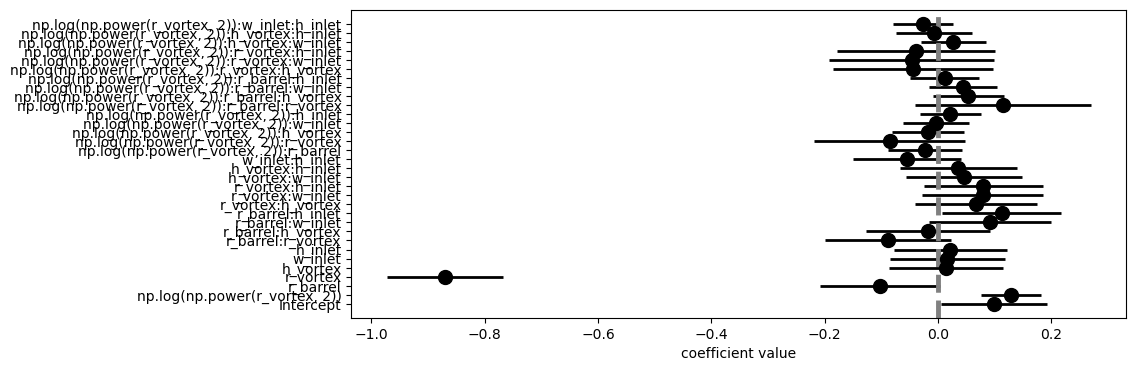

In [88]:
my_coefplot(fit_m4)

The two statistically significant coefficients with the highest magnitudes are `r_vortex`, with a magnitude of 0.869966, and `np.log(np.power(r_vortex, 2))`, with a magnitude of 0.129480.

In [89]:
np.abs(fit_m4.params).sort_values(ascending=False)

r_vortex                                           0.869966
np.log(np.power(r_vortex, 2))                      0.129480
np.log(np.power(r_vortex, 2)):r_barrel:r_vortex    0.115484
r_barrel:h_inlet                                   0.112537
r_barrel                                           0.102167
Intercept                                          0.098816
r_barrel:w_inlet                                   0.091398
r_barrel:r_vortex                                  0.087393
np.log(np.power(r_vortex, 2)):r_vortex             0.084904
r_vortex:h_inlet                                   0.080137
r_vortex:w_inlet                                   0.079108
r_vortex:h_vortex                                  0.067857
w_inlet:h_inlet                                    0.054208
np.log(np.power(r_vortex, 2)):r_barrel:h_vortex    0.053687
h_vortex:w_inlet                                   0.046443
np.log(np.power(r_vortex, 2)):r_vortex:w_inlet     0.046336
np.log(np.power(r_vortex, 2)):r_barrel:w

### Models 1-4: Performance and Interpretation

Now, we will interpret the performance of the four models that we used for the regression task on the training set.

We'll do this by:

- Visualizing the predicted vs observed figure for the training set with respect to the most important input.
- Comparing the R-squared and RMSE values for each model on the training set.

First, let's create a data set focused on the most important input, which we've consistently identified as `r_vortex`. We will do this by populating a dataframe with `np.linspace()` using the bounds of `r_vortex` in the training set.

**Note:** I'm not 100% confident that this is what the assignment was asking for when asked to show figures to interpret the performance of the four models "on the training set", so I've also included graphs of these plots on the actual raw training set for each model. They are not very nice, and I'm not sure if you were looking for them. However, they're included, and the majority of my discussion comments apply to either graph.

In [90]:
df_viz_pressure = pd.DataFrame({'r_vortex': np.linspace(df_pressure.r_vortex.min()-0.02, df_pressure.r_vortex.max()+0.02, num=251)})

The other input variables will be set to their respective mean values.

In [91]:
df_viz_pressure['r_barrel'] = df_pressure.r_barrel.mean()
df_viz_pressure['h_vortex'] = df_pressure.h_vortex.mean()
df_viz_pressure['w_inlet'] = df_pressure.w_inlet.mean()
df_viz_pressure['h_inlet'] = df_pressure.h_inlet.mean()

Next, we'll use this data and the fitted models to graph the predicted vs observed figures for the training set with respect to `r_vortex`.

There are a lot of steps to this process, and we'll need to do this multiple times, so let's define a helper function.

In [92]:
def plot_predicted_vs_observed(fit_m, df_viz, var_study):
    """
    This is a function that takes a fitted model, a dataframe for visualization, and
    a string that identifies the variable of interest, then generates a graph of the
    prediction interval, confidence interval, and trend for that model with respect to
    the variable of interest.
    """
    fig, ax = plt.subplots()
    
    # get predictions
    predictions = fit_m.get_prediction(df_viz)
    fit_m_summary = predictions.summary_frame()
    
    # prediction interval
    ax.fill_between(df_viz[var_study],
                 fit_m_summary.obs_ci_lower, fit_m_summary.obs_ci_upper,
                 facecolor='orange', alpha=0.75, edgecolor='orange')
    
    # confidence interval
    ax.fill_between(df_viz[var_study],
                 fit_m_summary.mean_ci_lower, fit_m_summary.mean_ci_upper,
                 facecolor='grey', edgecolor='grey')
    
    # trend
    ax.plot(df_viz[var_study], fit_m_summary['mean'], color='k', linewidth=1)
    
    # set the labels
    ax.set_xlabel(var_study)
    ax.set_ylabel('output')
    
    # show the plot
    plt.show()

Now that we have this function, we can proceed to visualize the graphs for each model in a single line of code.

Our first model is the intercept-only model.

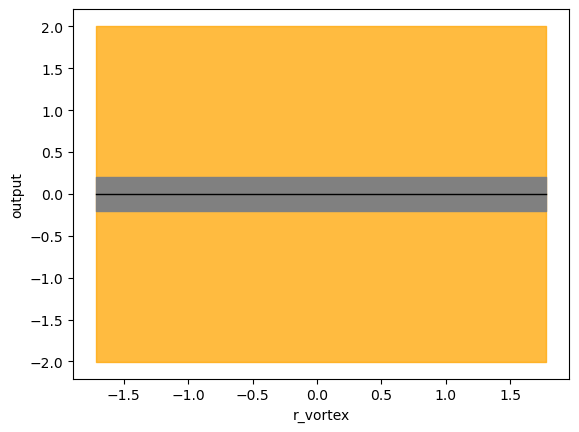

In [93]:
plot_predicted_vs_observed(fit_m1, df_viz_pressure, 'r_vortex')

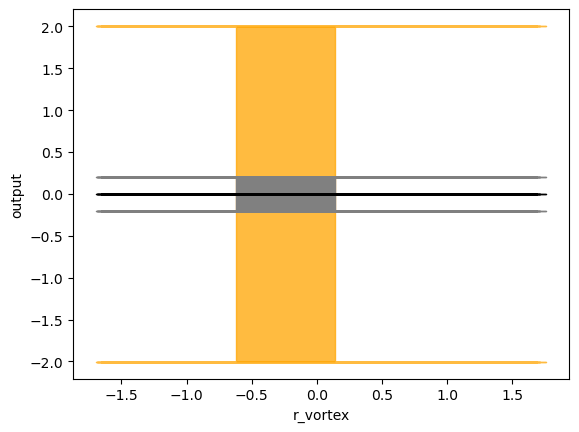

In [94]:
plot_predicted_vs_observed(fit_m1, df_pressure, 'r_vortex')

This is a straight horizontal line with a very wide prediction interval. In other words, this model doesn't tell us much, and it isn't very good.

Next, we'll look at our second model, which contained the linear additive features only.

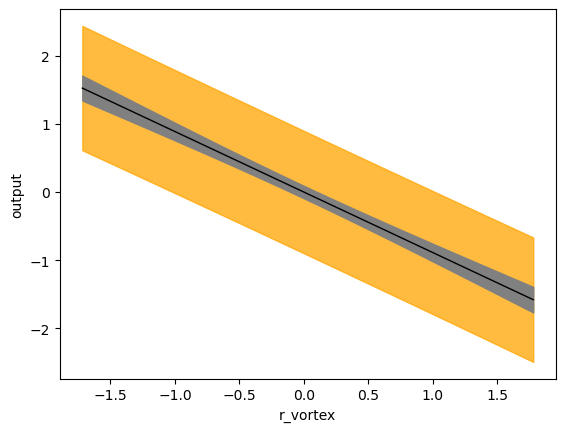

In [95]:
plot_predicted_vs_observed(fit_m2, df_viz_pressure, 'r_vortex')

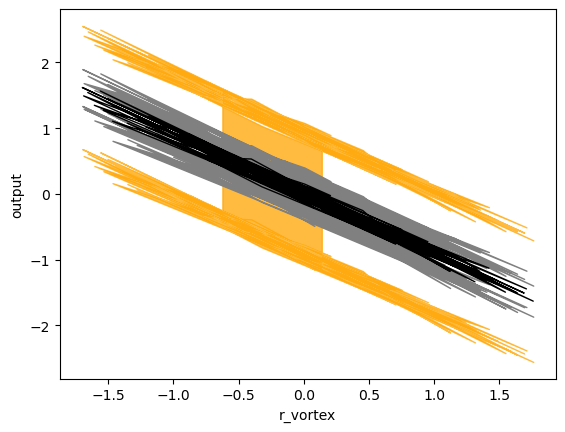

In [96]:
plot_predicted_vs_observed(fit_m2, df_pressure, 'r_vortex')

This model shows us a negative trend line with a narrower prediction interval. In this graph, we can also see that the confidence interval grows narrower towards the middle and wider towards each end of the input range.

It's very similar to the graph for our third model, which used both the linear main features as well as their pairwise interactions.

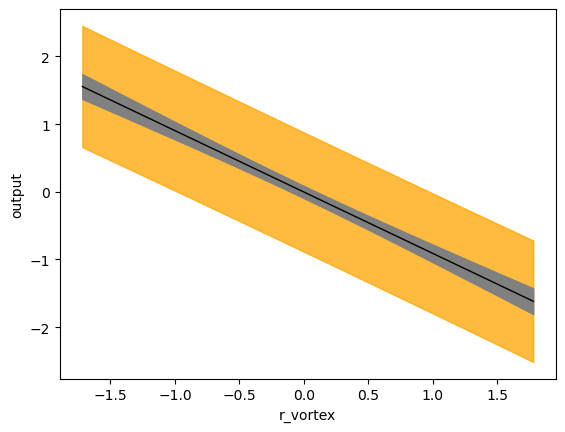

In [97]:
plot_predicted_vs_observed(fit_m3, df_viz_pressure, 'r_vortex')

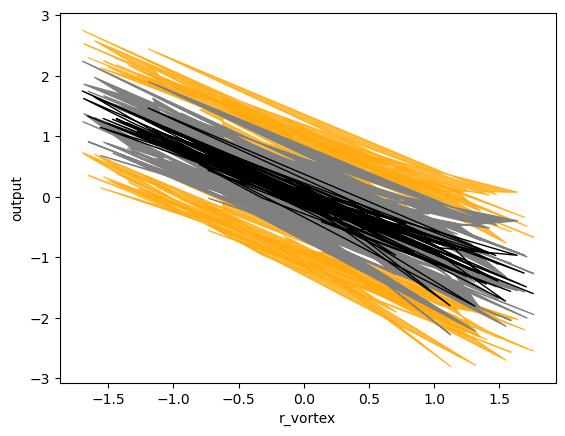

In [98]:
plot_predicted_vs_observed(fit_m3, df_pressure, 'r_vortex')

Last, we'll take a look at the graph of the model that used the interaction of the natural log of the squared `r_vortex` with the result of the linear main effects and pairwise interactions:

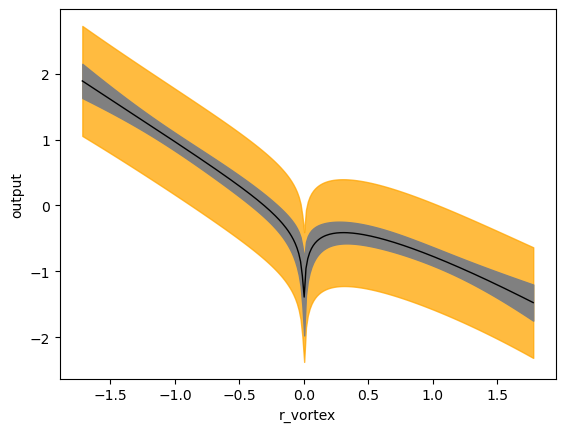

In [99]:
plot_predicted_vs_observed(fit_m4, df_viz_pressure, 'r_vortex')

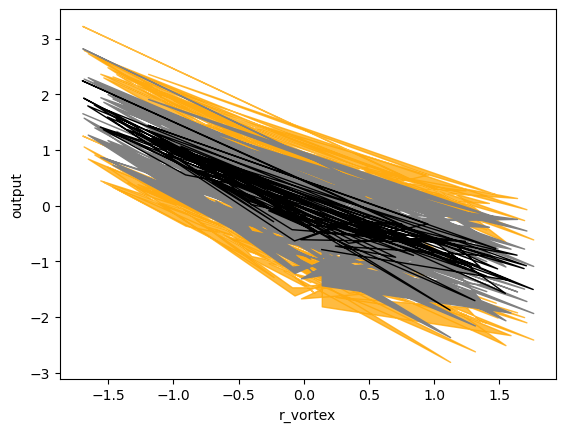

In [100]:
plot_predicted_vs_observed(fit_m4, df_pressure, 'r_vortex')

As expected, this graph isn't a straight line with respect to `r_vortex`. However, the prediction and confidence intervals exhibit similar behavior to the previous graphs.

Visually, we've been able to determine that the intercept-only model isn't the best, but what about the other three? Let's take a look at their R-squared and RMSE values to get a more quantitative view of their performance.

In [101]:
print('=== R-SQUARED VALUES ===')
print('m1: ' + str(fit_m1.rsquared))
print('m2: ' + str(fit_m2.rsquared))
print('m3: ' + str(fit_m3.rsquared))
print('m4: ' + str(fit_m4.rsquared))
print('\nThe best R-squared value is ' + str(max([fit_m1.rsquared, fit_m2.rsquared, fit_m3.rsquared, fit_m4.rsquared])) + '.\n')

print('=== RMSE VALUES ===')
print('m1: ' + str(np.sqrt((fit_m1.resid ** 2).mean())))
print('m2: ' + str(np.sqrt((fit_m2.resid ** 2).mean())))
print('m3: ' + str(np.sqrt((fit_m3.resid ** 2).mean())))
print('m4: ' + str(np.sqrt((fit_m4.resid ** 2).mean())))
print('\nThe best RMSE value is ' + str(min([np.sqrt((fit_m1.resid ** 2).mean()), np.sqrt((fit_m2.resid ** 2).mean()), np.sqrt((fit_m3.resid ** 2).mean()), np.sqrt((fit_m4.resid ** 2).mean())])) + '.')

=== R-SQUARED VALUES ===
m1: -2.220446049250313e-16
m2: 0.8103515877669438
m3: 0.8381868658468882
m4: 0.8945917525260066

The best R-squared value is 0.8945917525260066.

=== RMSE VALUES ===
m1: 1.0
m2: 0.43548640878109635
m3: 0.4022600330049107
m4: 0.3246663633239412

The best RMSE value is 0.3246663633239412.


According to both the R-squared and RMSE values, the best model on the training set is the fourth model, which used the logarithmic `r_vortex` interactions. At thirty-two, this model also estimated the highest number of coefficients.

It performed much better than the intercept-only model, but only slightly better than the second and third models, which performed almost identically to each other.

### Model 5: Intercept-only (`bin_mass`)

Let's move onto our classification task.

This is the intercept-only model.

#### Implementation

In [102]:
fit_m5 = smf.logit(formula='bin_mass ~ 1', data=df_mass).fit()

Optimization terminated successfully.
         Current function value: 0.693147
         Iterations 1


In [103]:
print(fit_m5.summary())

                           Logit Regression Results                           
Dep. Variable:               bin_mass   No. Observations:                   96
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            0
Date:                Sat, 03 Aug 2024   Pseudo R-squ.:                   0.000
Time:                        14:40:02   Log-Likelihood:                -66.542
converged:                       True   LL-Null:                       -66.542
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept           0      0.204          0      1.000      -0.400       0.400


#### Interpretation

Naturally, the only coefficient that has been estimated is the intercept.

In [104]:
fit_m5.params

Intercept    0.0
dtype: float64

It is not statistically significant using the conventional threshold.

In [105]:
fit_m5.pvalues < 0.05

Intercept    False
dtype: bool

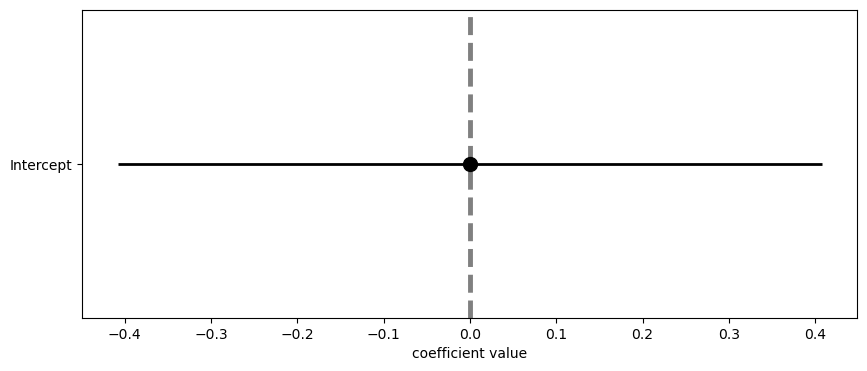

In [106]:
my_coefplot(fit_m5)

### Model 6: Linear additive features (`bin_mass`)

This is a model using only linear additive features of the data set.

#### Implementation

In [107]:
fit_m6 = smf.logit(formula='bin_mass ~ r_barrel + r_vortex + h_vortex + w_inlet + h_inlet', data=df_mass).fit()

Optimization terminated successfully.
         Current function value: 0.594675
         Iterations 5


In [108]:
print(fit_m6.summary())

                           Logit Regression Results                           
Dep. Variable:               bin_mass   No. Observations:                   96
Model:                          Logit   Df Residuals:                       90
Method:                           MLE   Df Model:                            5
Date:                Sat, 03 Aug 2024   Pseudo R-squ.:                  0.1421
Time:                        14:40:02   Log-Likelihood:                -57.089
converged:                       True   LL-Null:                       -66.542
Covariance Type:            nonrobust   LLR p-value:                  0.002001
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0055      0.226     -0.024      0.981      -0.449       0.438
r_barrel      -0.8868      0.246     -3.603      0.000      -1.369      -0.404
r_vortex       0.4735      0.233      2.031      0.0

#### Interpretation

We have estimated six coefficients: the intercept and the five continuous inputs.

In [109]:
fit_m6.params

Intercept   -0.005513
r_barrel    -0.886771
r_vortex     0.473486
h_vortex    -0.020889
w_inlet      0.215242
h_inlet      0.115645
dtype: float64

Two of these coefficients are considered statistically significant at the conventional threshold: `r_barrel`, which is negative, and `r_vortex`, which is positive.

In [110]:
fit_m6.pvalues < 0.05

Intercept    False
r_barrel      True
r_vortex      True
h_vortex     False
w_inlet      False
h_inlet      False
dtype: bool

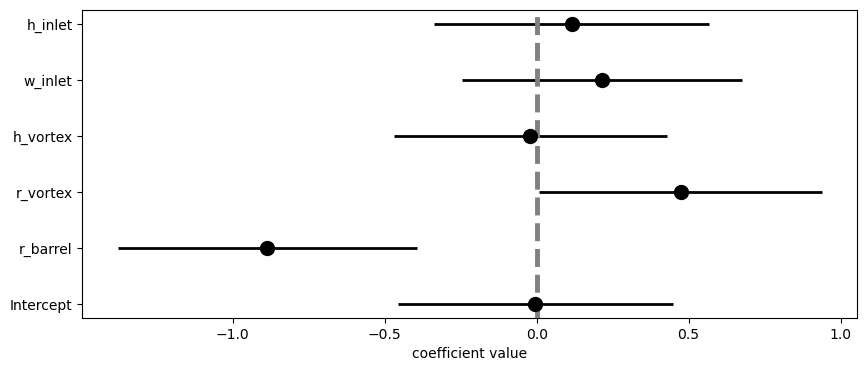

In [111]:
my_coefplot(fit_m6)

`r_barrel`, at 0.886771, has a higher magnitude compared to `r_vortex` at 0.473486.

In [112]:
np.abs(fit_m6.params).sort_values(ascending=False)

r_barrel     0.886771
r_vortex     0.473486
w_inlet      0.215242
h_inlet      0.115645
h_vortex     0.020889
Intercept    0.005513
dtype: float64

### Model 7: Linear main effect and pairwise interactions (`bin_mass`)

This is a model using all linear main effects and their pairwise interactions only.

#### Implementation

In [113]:
fit_m7 = smf.logit(formula='bin_mass ~ (r_barrel + r_vortex + h_vortex + w_inlet + h_inlet) ** 2', data=df_mass).fit()

Optimization terminated successfully.
         Current function value: 0.545373
         Iterations 6


In [114]:
print(fit_m7.summary())

                           Logit Regression Results                           
Dep. Variable:               bin_mass   No. Observations:                   96
Model:                          Logit   Df Residuals:                       80
Method:                           MLE   Df Model:                           15
Date:                Sat, 03 Aug 2024   Pseudo R-squ.:                  0.2132
Time:                        14:40:02   Log-Likelihood:                -52.356
converged:                       True   LL-Null:                       -66.542
Covariance Type:            nonrobust   LLR p-value:                   0.01935
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.1173      0.250     -0.469      0.639      -0.608       0.373
r_barrel             -1.0656      0.292     -3.646      0.000      -1.639      -0.493
r_vortex              0.

#### Interpretation

We have estimated a total of sixteen coefficients: one intercept, five main effects, and ten interactions between unique input pairs.

In [115]:
fit_m7.params

Intercept           -0.117331
r_barrel            -1.065628
r_vortex             0.378094
h_vortex            -0.055088
w_inlet              0.241799
h_inlet              0.060356
r_barrel:r_vortex    0.359645
r_barrel:h_vortex    0.381578
r_barrel:w_inlet     0.147076
r_barrel:h_inlet     0.114132
r_vortex:h_vortex    0.199127
r_vortex:w_inlet     0.132771
r_vortex:h_inlet    -0.038732
h_vortex:w_inlet    -0.503210
h_vortex:h_inlet    -0.096245
w_inlet:h_inlet      0.122955
dtype: float64

Only one of these coefficients is considered statistically significant according to the conventional threshold. It is `r_barrel`, which is negative and has a magnitude of 1.065628.

In [116]:
fit_m7.pvalues < 0.05

Intercept            False
r_barrel              True
r_vortex             False
h_vortex             False
w_inlet              False
h_inlet              False
r_barrel:r_vortex    False
r_barrel:h_vortex    False
r_barrel:w_inlet     False
r_barrel:h_inlet     False
r_vortex:h_vortex    False
r_vortex:w_inlet     False
r_vortex:h_inlet     False
h_vortex:w_inlet     False
h_vortex:h_inlet     False
w_inlet:h_inlet      False
dtype: bool

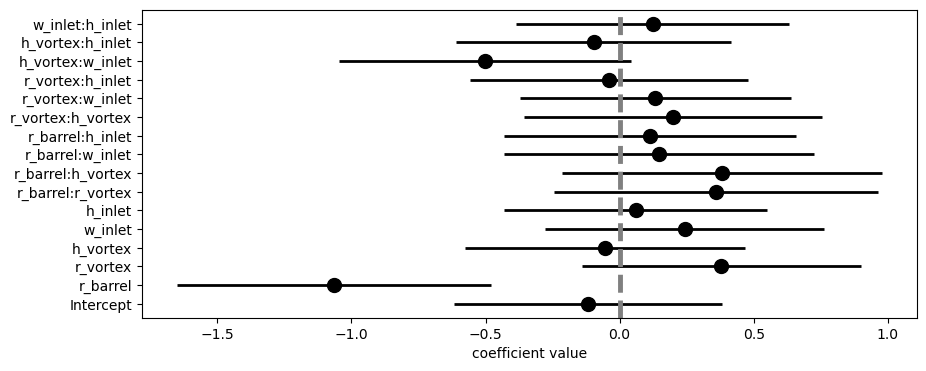

In [117]:
my_coefplot(fit_m7)

### Model 8: Non-linear features (`bin_mass`)

During EDA, we found that `h_vortex` appeared to have a quadratic relationship of some kind with `mass`. This is a model that takes all linear main effects except for `h_vortex` and their pairwise interactions, then further interacts the result with `h_vortex` squared.

#### Implementation

In [118]:
fit_m8 = smf.logit(formula='bin_mass ~ np.power(h_vortex, 2) * ((r_barrel + r_vortex + w_inlet + h_inlet) ** 2)', data=df_mass).fit()

Optimization terminated successfully.
         Current function value: 0.388369
         Iterations 9


In [119]:
print(fit_m8.summary())

                           Logit Regression Results                           
Dep. Variable:               bin_mass   No. Observations:                   96
Model:                          Logit   Df Residuals:                       74
Method:                           MLE   Df Model:                           21
Date:                Sat, 03 Aug 2024   Pseudo R-squ.:                  0.4397
Time:                        14:40:03   Log-Likelihood:                -37.283
converged:                       True   LL-Null:                       -66.542
Covariance Type:            nonrobust   LLR p-value:                 2.135e-05
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  -1.3523      0.433     -3.122      0.002      -2.201      -0.503
np.power(h_vortex, 2)                       

#### Interpretation

Twenty-two coefficients have been estimated for this model: one intercept, one quadratic input, four linear main effects, six pairwise interactions of the main effects, four interactions of the quadratic input with the linear main effects, and six interactions of the quadratic input with the pairwise interactions of the main effects.

In [120]:
fit_m8.params

Intercept                                 -1.352280
np.power(h_vortex, 2)                      1.755557
r_barrel                                   0.101843
r_vortex                                   0.099964
w_inlet                                    0.343365
h_inlet                                    0.573110
r_barrel:r_vortex                         -0.557167
r_barrel:w_inlet                          -0.100179
r_barrel:h_inlet                           0.072021
r_vortex:w_inlet                          -0.081113
r_vortex:h_inlet                           0.120262
w_inlet:h_inlet                           -0.167423
np.power(h_vortex, 2):r_barrel            -2.317283
np.power(h_vortex, 2):r_vortex             0.394411
np.power(h_vortex, 2):w_inlet              0.156352
np.power(h_vortex, 2):h_inlet             -0.938520
np.power(h_vortex, 2):r_barrel:r_vortex    2.214729
np.power(h_vortex, 2):r_barrel:w_inlet    -0.337789
np.power(h_vortex, 2):r_barrel:h_inlet     0.683651
np.power(h_v

Four coefficients are considered statistically significant according to the conventional threshold: the intercept, which is negative, `np.power(h_vortex, 2)`, which is positive, the interaction `np.power(h_vortex, 2):r_barrel`, which is negative, and `np.power(h_vortex, 2):r_barrel:r_vortex`, which is positive.

In [121]:
fit_m8.pvalues < 0.05

Intercept                                   True
np.power(h_vortex, 2)                       True
r_barrel                                   False
r_vortex                                   False
w_inlet                                    False
h_inlet                                    False
r_barrel:r_vortex                          False
r_barrel:w_inlet                           False
r_barrel:h_inlet                           False
r_vortex:w_inlet                           False
r_vortex:h_inlet                           False
w_inlet:h_inlet                            False
np.power(h_vortex, 2):r_barrel              True
np.power(h_vortex, 2):r_vortex             False
np.power(h_vortex, 2):w_inlet              False
np.power(h_vortex, 2):h_inlet              False
np.power(h_vortex, 2):r_barrel:r_vortex     True
np.power(h_vortex, 2):r_barrel:w_inlet     False
np.power(h_vortex, 2):r_barrel:h_inlet     False
np.power(h_vortex, 2):r_vortex:w_inlet     False
np.power(h_vortex, 2

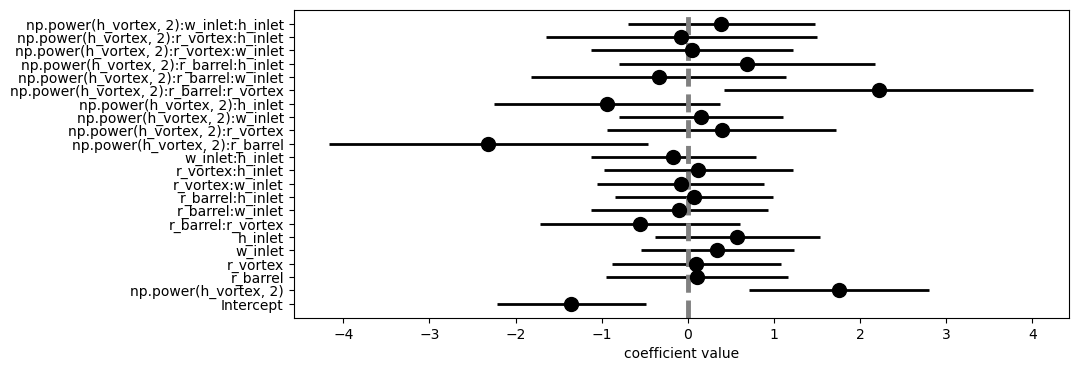

In [122]:
my_coefplot(fit_m8)

The two statistically significant coefficients with the highest magnitudes are `np.power(h_vortex, 2):r_barrel`, with a magnitude of 2.317283, and `np.power(h_vortex, 2):r_barrel:r_vortex`, with a magnitude of 2.214729.

In [123]:
np.abs(fit_m8.params).sort_values(ascending=False)

np.power(h_vortex, 2):r_barrel             2.317283
np.power(h_vortex, 2):r_barrel:r_vortex    2.214729
np.power(h_vortex, 2)                      1.755557
Intercept                                  1.352280
np.power(h_vortex, 2):h_inlet              0.938520
np.power(h_vortex, 2):r_barrel:h_inlet     0.683651
h_inlet                                    0.573110
r_barrel:r_vortex                          0.557167
np.power(h_vortex, 2):r_vortex             0.394411
np.power(h_vortex, 2):w_inlet:h_inlet      0.390305
w_inlet                                    0.343365
np.power(h_vortex, 2):r_barrel:w_inlet     0.337789
w_inlet:h_inlet                            0.167423
np.power(h_vortex, 2):w_inlet              0.156352
r_vortex:h_inlet                           0.120262
r_barrel                                   0.101843
r_barrel:w_inlet                           0.100179
r_vortex                                   0.099964
r_vortex:w_inlet                           0.081113
np.power(h_v

### Models 5-8: Performance and Interpretation

Now, we will interpret the performance of the four models that we used for the classification task on the training set.

We'll do this by:

- Showing the confusion matrix for each model on the training set, assuming a 0.5 threshold.
- Showing the accuracy, sensitivity, specificity, and FPR on the training set, assuming a 0.5 threshold.
- Showing the ROC curve and ROC AUC (area under curve) for each model on the training set.

Let's begin by creating a modified version of the helper function used in lecture to fit and assess logistic models. We'll need to import some utility functions from sklearn, as well.

In [124]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [125]:
def assess_logistic_mass(a_mod, train_data, threshold):
    """
    This is a function that takes a fitted model, a set of training data, and a threshold
    value and returns a dataframe containing the threshold, number of coefficients,
    accuracy, sensitivity, specificity, FPR, and ROC AUC value for that model.
    """
    train_copy = train_data.copy()
    
    train_copy['pred_probability'] = a_mod.predict(train_data)
    train_copy['pred_class'] = np.where(train_copy.pred_probability > threshold, 1, 0)
    
    TN, FP, FN, TP = confusion_matrix(train_copy.bin_mass.to_numpy(), train_copy.pred_class.to_numpy()).ravel()
    
    Accuracy = (TN + TP) / (TN + FP + FN + TP)
    Sensitivity = (TP) / (TP + FN)
    Specificity = (TN) / (TN + FP)
    
    FPR = 1 - Specificity
    
    ROC_AUC = roc_auc_score(train_copy.bin_mass.to_numpy(), train_copy.pred_probability.to_numpy())
    
    res_dict = {'num_coefs': len(a_mod.params),
                'threshold': threshold,
                'Accuracy': Accuracy,
                'Sensitivity': Sensitivity,
                'Specificity': Specificity,
                'FPR': FPR,
                'ROC_AUC': ROC_AUC}
    
    return pd.DataFrame(res_dict, index=[0])

Now, let's assess each of the four models we used for classification, save each result into a list, and combine all of the results into a single dataframe for us to study.

In [126]:
model_list = [fit_m5, fit_m6, fit_m7, fit_m8]
results_list = [assess_logistic_mass(model, df_mass, 0.5) for model in model_list]

results_df = pd.concat(results_list, ignore_index=True)

In [127]:
results_df

num_coefs  threshold  Accuracy  Sensitivity  Specificity       FPR  \
0          1        0.5  0.500000     0.000000     1.000000  0.000000   
1          6        0.5  0.635417     0.625000     0.645833  0.354167   
2         16        0.5  0.687500     0.750000     0.625000  0.375000   
3         22        0.5  0.822917     0.770833     0.875000  0.125000   

    ROC_AUC  
0  0.500000  
1  0.742622  
2  0.789062  
3  0.893663

At a glance, we can see that the best model on the training set is the fourth model, which used the quadratic `h_vortex` interactions in addition to the linear main effects and pairwise interactions. This is true whether evaluating performance by accuracy or ROC AUC.

In [128]:
results_df.sort_values(by=['Accuracy'], ascending=False)

num_coefs  threshold  Accuracy  Sensitivity  Specificity       FPR  \
3         22        0.5  0.822917     0.770833     0.875000  0.125000   
2         16        0.5  0.687500     0.750000     0.625000  0.375000   
1          6        0.5  0.635417     0.625000     0.645833  0.354167   
0          1        0.5  0.500000     0.000000     1.000000  0.000000   

    ROC_AUC  
3  0.893663  
2  0.789062  
1  0.742622  
0  0.500000

In [129]:
results_df.sort_values(by=['ROC_AUC'], ascending=False)

num_coefs  threshold  Accuracy  Sensitivity  Specificity       FPR  \
3         22        0.5  0.822917     0.770833     0.875000  0.125000   
2         16        0.5  0.687500     0.750000     0.625000  0.375000   
1          6        0.5  0.635417     0.625000     0.645833  0.354167   
0          1        0.5  0.500000     0.000000     1.000000  0.000000   

    ROC_AUC  
3  0.893663  
2  0.789062  
1  0.742622  
0  0.500000

At 22 coefficients, this model also had the most estimated coefficients of the four models used for the classification task. It performs much better than the intercept-only model across the board, and manages to maintain the sensitivity of the model with the next-most number of coefficients while improving on its specificity.

Let's support our interpretation visually by graphing out the confusion matrix and ROC curve for each model.

First, let's predict and store the data to graph the confusion matrices:

In [130]:
df_prediction_copy = df_mass.copy()

for m in range(len(model_list)):
    df_prediction_copy['m%s_pred_probability' % str(m+5)] = model_list[m].predict(df_mass)
    df_prediction_copy['m%s_pred_class' % str(m+5)] = np.where(df_prediction_copy['m%s_pred_probability' % str(m+5)] > 0.5, 1, 0)

Then, visualize as heatmaps:

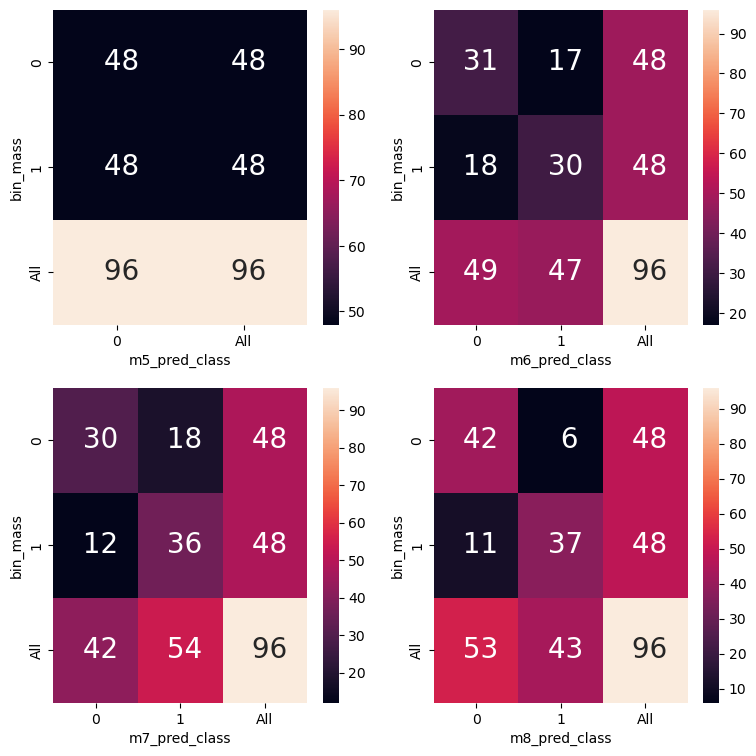

In [131]:
fig, ax = plt.subplots(2, 2, figsize=(9, 9))

sns.heatmap(pd.crosstab(df_prediction_copy.bin_mass, df_prediction_copy.m5_pred_class, margins=True),
            annot=True, annot_kws={'size': 20}, fmt='3d', ax=ax[0,0])
sns.heatmap(pd.crosstab(df_prediction_copy.bin_mass, df_prediction_copy.m6_pred_class, margins=True),
            annot=True, annot_kws={'size': 20}, fmt='3d', ax=ax[0,1])
sns.heatmap(pd.crosstab(df_prediction_copy.bin_mass, df_prediction_copy.m7_pred_class, margins=True),
            annot=True, annot_kws={'size': 20}, fmt='3d', ax=ax[1,0])
sns.heatmap(pd.crosstab(df_prediction_copy.bin_mass, df_prediction_copy.m8_pred_class, margins=True),
            annot=True, annot_kws={'size': 20}, fmt='3d', ax=ax[1,1])

plt.show()

This highlights the completely random guessing nature of the intercept-only model, as well as the gradual improvement in performance on the training set as the models increase in complexity. In particular, we can see the jump in sensitivity from model 6 to model 7 and the jump in specificity from modeel 7 to model 8 quite well.

The final model, as we saw earlier, performs the best, with the lowest number of false classifications.

Finally, we'll plot the ROC curve for each model. Let's modify another helper function from lecture for graphing.

In [132]:
def make_roc(a_mod, train_data):
    """
    This is a function that takes a fitted model and a set of training data and
    returns the FPR, TPR, and threshold values needed to plot a ROC curve.
    """
    train_copy = train_data.copy()
    train_copy['pred_probability'] = a_mod.predict(train_data)
    
    fpr, tpr, threshold = roc_curve(train_data.bin_mass.to_numpy(), train_copy.pred_probability.to_numpy())
    
    res_df = pd.DataFrame({'tpr': tpr,
                           'fpr': fpr,
                           'threshold': threshold})
    
    res_df['num_coef'] = len(a_mod.params)
    
    return res_df

Apply this function to all four models, store data, and visualize.

In [133]:
roc_list = [make_roc(model, df_mass) for model in model_list]
roc_df = pd.concat(roc_list, ignore_index=True)

roc_df['num_coef'] = roc_df.num_coef.astype('category')

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


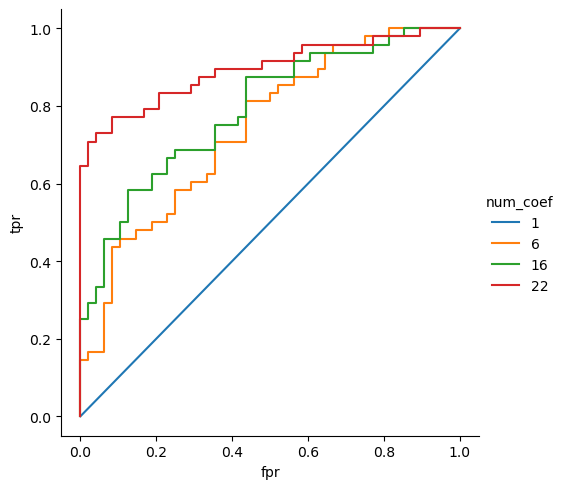

In [134]:
sns.relplot(data = roc_df, x='fpr', y='tpr', hue='num_coef',
            kind='line', estimator=None, units='num_coef')

plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


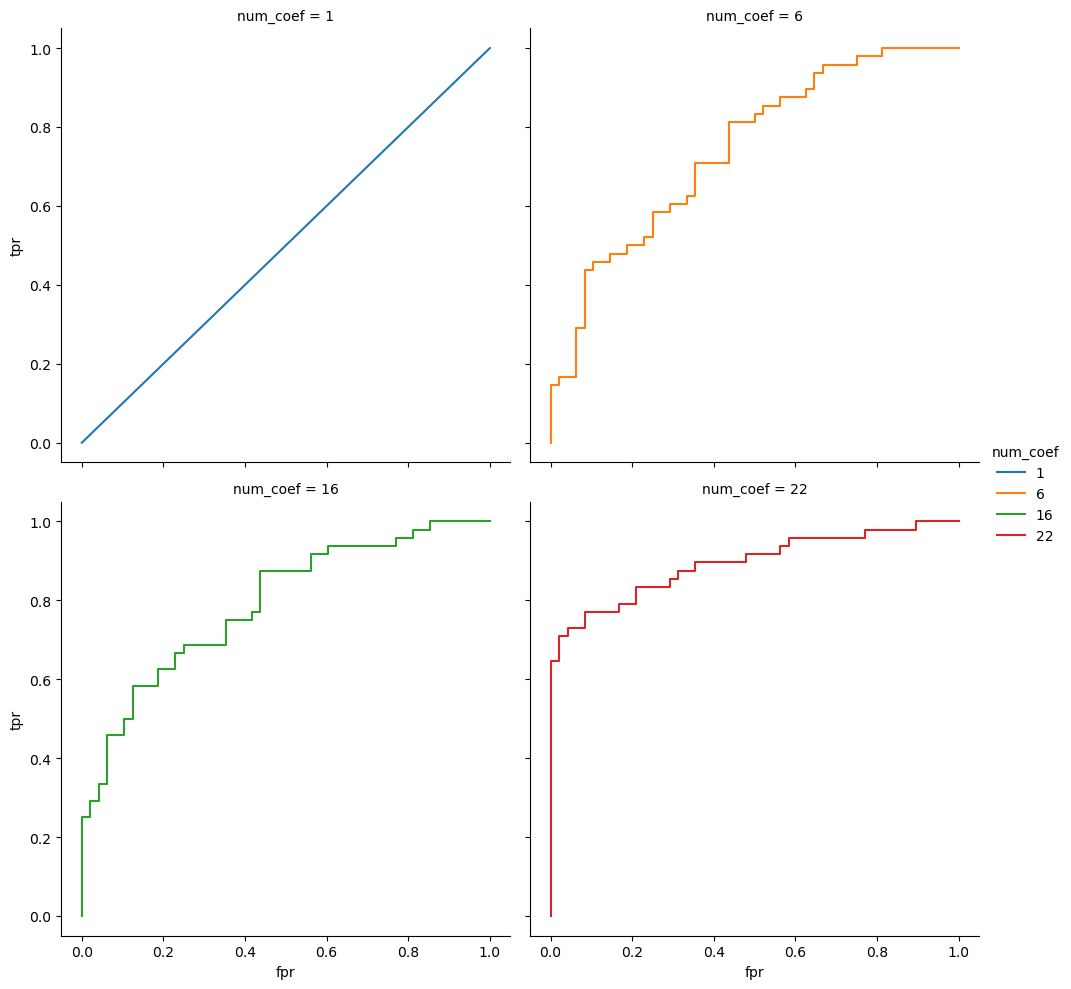

In [135]:
sns.relplot(data = roc_df, x='fpr', y='tpr', hue='num_coef',
            kind='line', estimator=None, units='num_coef',
            col='num_coef', col_wrap=2)

plt.show()

Here, we can see that the model with 22 coefficients has the largest area under the curve, supporting our prior observation of ROC AUC measurements. We can also see that, out of the four ROC curves, it is the closest to a right-angle figure.

Interestingly, it takes slightly longer for this curve to reach a TPR of 1.0 than the previous two models; however, it begins at a much higher value, which is where most of the improved ROC AUC score comes from.

## Models: Predictions

In this section, we will use the models that we fitted to make predictions on a newly-created set of data. We'll use two models for each task - two for the regression problem, and two for the classification problem.

As per the project instructions, these models will be:

- The model with all inputs and linear additive features.
- The best model on the training set.

### Regression

#### Visualization 1

First, we'll create a new set of data for our visualization grid.

For this grid, similarly to when we evaluated performance on the training set, we'll focus on `r_vortex` as the most important continuous input. As requested, let's populate a dataframe with 101 unique values of `r_vortex` set between the minimum and maximum training set values.

In [136]:
df_predict_pressure_1 = pd.DataFrame({'r_vortex': np.linspace(df_pressure.r_vortex.min(), df_pressure.r_vortex.max(), num=101)})

The other input variables will be set to their respective mean values.

In [137]:
df_predict_pressure_1['r_barrel'] = df_pressure.r_barrel.mean()
df_predict_pressure_1['h_vortex'] = df_pressure.h_vortex.mean()
df_predict_pressure_1['w_inlet'] = df_pressure.w_inlet.mean()
df_predict_pressure_1['h_inlet'] = df_pressure.h_inlet.mean()

Next, we'll use this data and the fitted models to graph the predicted vs observed figures. We can use the helper function that we defined previously.

First, the model with all inputs as linear additive features:

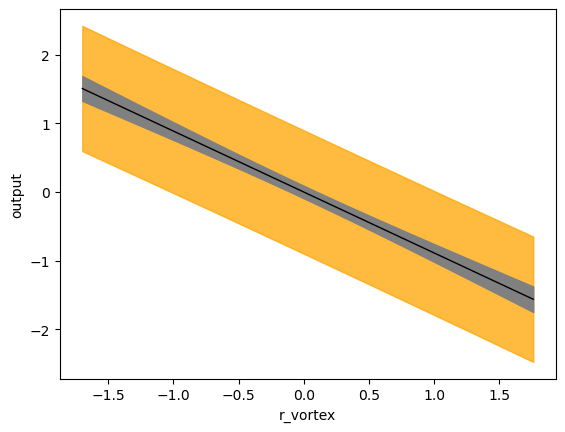

In [138]:
plot_predicted_vs_observed(fit_m2, df_predict_pressure_1, 'r_vortex')

Then, the best model on the training set:

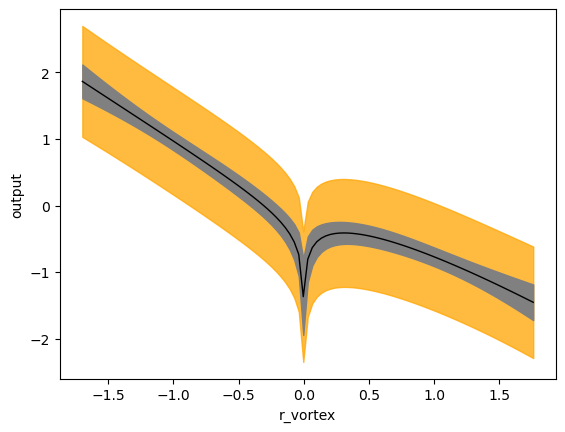

In [139]:
plot_predicted_vs_observed(fit_m4, df_predict_pressure_1, 'r_vortex')

These models do not share exactly the same trend - due to the use of the logarithm applied to the squared `r_vortex` value in model 4, the trend line has a rather interesting shape. That said, both display an overall negative trend as `r_vortex` increases, and the uncertainty on both the prediction and confidence intervals are similar across models (if slightly wider for model 4).

#### Visualization 2

Now, we will select multiple inputs to study.

Based on the magnitude of the statistically significant coefficients that we identified after fitting the models, it's obvious that `r_vortex` is the most significant input, so we'll continue to use 101 values in our second visualization grid.

For our other two values, we'll use the inputs that appeared at least once in the main effects or interactions with statistically signficant coefficients: `r_barrel` and `h_inlet`. For these inputs, we'll use 5 unique values between the training set minimum and maximum.

The remaining inputs will be set to a constant value equal to the mean value of the input in the training set.

In [140]:
df_predict_pressure_2 = pd.DataFrame([(r_vortex, r_barrel, h_inlet) for r_vortex in np.linspace(df_pressure.r_vortex.min(), df_pressure.r_vortex.max(), num=101)
                                     for r_barrel in np.linspace(df_pressure.r_barrel.min(), df_pressure.r_barrel.max(), num=5)
                                     for h_inlet in np.linspace(df_pressure.h_inlet.min(), df_pressure.h_inlet.max(), num=5)], 
                       columns=['r_vortex', 'r_barrel', 'h_inlet'])

df_predict_pressure_2['h_vortex'] = df_pressure.h_vortex.mean()
df_predict_pressure_2['w_inlet'] = df_pressure.w_inlet.mean()

Again, we'll use this data and the fitted models to graph the predicted vs observed figures.

First, the model with all inputs as linear additive features:

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


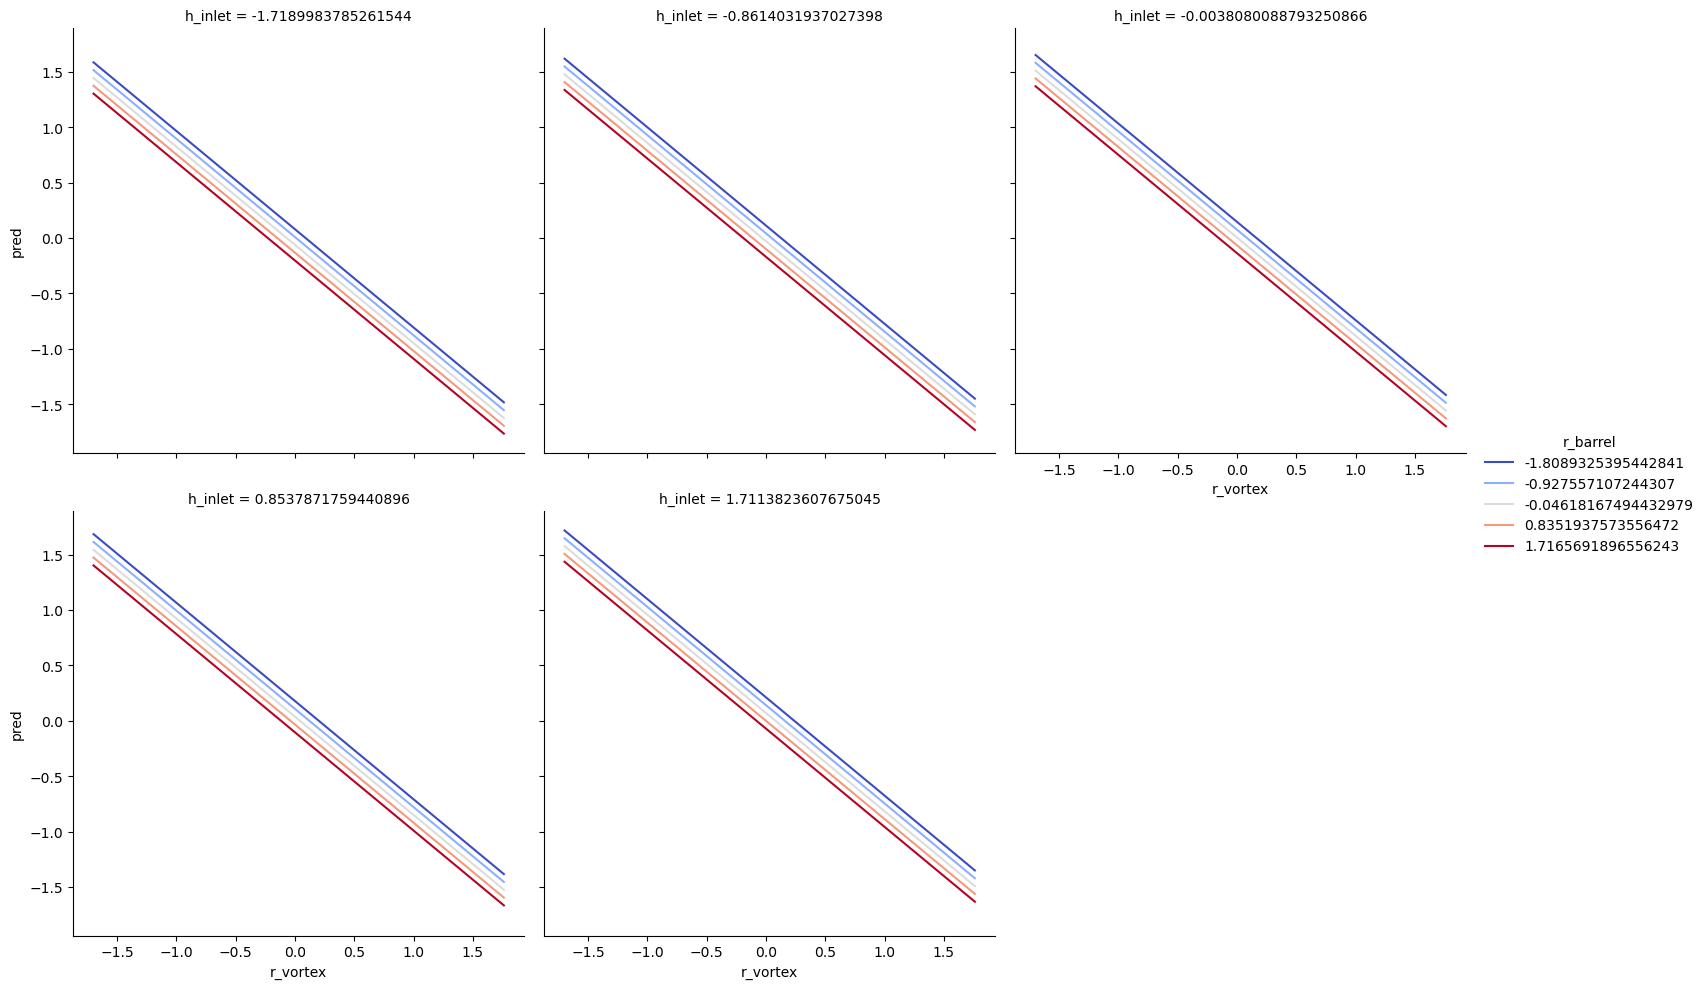

In [141]:
df_predict_pressure_2_copy = df_predict_pressure_2.copy()
df_predict_pressure_2_copy['pred'] = fit_m2.predict(df_predict_pressure_2)

sns.relplot(data = df_predict_pressure_2_copy, 
            x='r_vortex', y='pred', kind='line',
            hue='r_barrel', col='h_inlet',
            col_wrap=3, palette='coolwarm',
            estimator=None, units='r_barrel')

plt.show()

Then, the model that performed best on the training set:

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


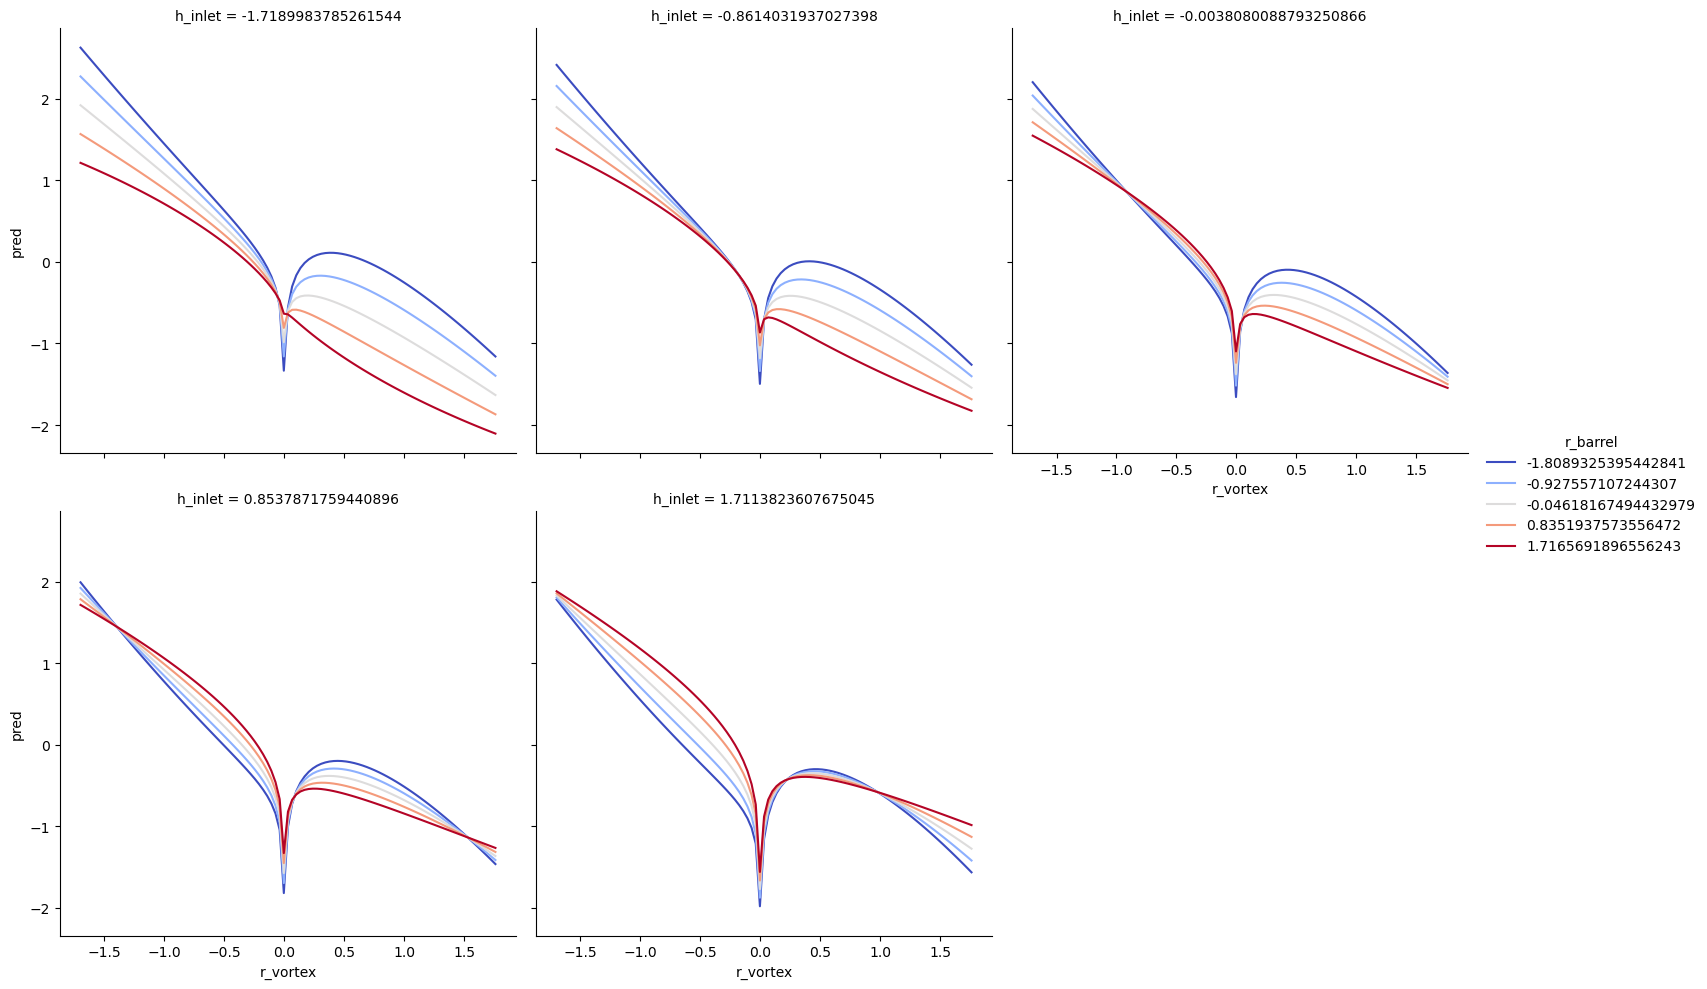

In [142]:
df_predict_pressure_2_copy = df_predict_pressure_2.copy()
df_predict_pressure_2_copy['pred'] = fit_m4.predict(df_predict_pressure_2)

sns.relplot(data = df_predict_pressure_2_copy, 
            x='r_vortex', y='pred', kind='line',
            hue='r_barrel', col='h_inlet',
            col_wrap=3, palette='coolwarm',
            estimator=None, units='r_barrel')

plt.show()

We have already commented on the differences in the shape of the trend line with respect to `r_vortex` - the unusual shape of model 4 is due to the log and square functions that were applied to `r_vortex` before interacting the result with the other inputs to the model. However, with the addition of two more variables, we can see that:

- For model 2, though the difference is not very large, lower values of `r_barrel` are always associated with higher prediction values, while higher values are associated with lower prediction variables. This changes minimally across different values of `h_inlet`, which only shifts the overall graph up or down slightly from facet to facet.
- For model 4, we can observe not only differences in the prediction values across values of `r_barrel` that are dependent on the value of `r_vortex`, but also a marked difference in the spacing of the trend lines for each value of `r_barrel` across different values of `h_inlet`.
- The graph of model 4 almost appears to "twist" and "untwist" on each side of zero across facets, resulting in points where the influence of `r_barrel` seems to be reversed (e.g. for a given value of `h_inlet`, a high value of `r_barrel` associated with higher predictions for values of `r_vortex` less than a certain number may be associated with lower predictions for values of `r_vortex` greater than that number, in a manner that changes as values of `h_inlet` change).
- In this way, we can see that the influence of `r_barrel` and `h_inlet` are much greater in model 4, which used interaction features with a transformed input, than model 2, which only used linear additive features.
- This is consistent with what we saw in the coefficient plots for these models as well - especially the significance of the interaction `r_barrel:h_inlet` in model 4.

### Classification

#### Visualization

Next, we'll visualize the performance of two models from our classification task.

For this task, we'll only carry out one visualization for each model. We will use the three most important inputs based on the statistically significant coefficients that we identified after fitting the models. Again, the most important input will have 101 unique values in the grid, while the other two inputs will use 5 unique values between the training set minimum and maximum.

For the classification models, the most important input appeared to be `r_barrel`, which was significant (either as a main effect or included in an interaction) for all models in which it was present. Our secondary inputs will be `r_vortex`, which was significant in both of the models that we are studying, and `h_vortex`, which was significant to the model that performed best on our training data.

All other inputs will be set to a constant equal to the mean of that input in the training set.

- Make predictions of the EVENT PROBABILITY with BOTH models on the visualization grid. You MUST visualize the EVENT PROBABILITY as a line with respect to the input with the 101 unique values in the visualization grid. The line must be colored by one of the two other inputs with non-constant values. The third input must be associated with the facets. It is your choice as to which input is associated with the line color (hue) versus the facets. If you color by a continuous variable, you should use a diverging color palette. You may use the default color palette for coloring by a categorical variable.
- Comment on the trends between the two models.

In [143]:
df_predict_mass = pd.DataFrame([(r_barrel, r_vortex, h_vortex) for r_barrel in np.linspace(df_mass.r_barrel.min(), df_mass.r_barrel.max(), num=101)
                                     for r_vortex in np.linspace(df_mass.r_vortex.min(), df_mass.r_vortex.max(), num=5)
                                     for h_vortex in np.linspace(df_mass.h_vortex.min(), df_mass.h_vortex.max(), num=5)], 
                       columns=['r_barrel', 'r_vortex', 'h_vortex'])

df_predict_mass['h_inlet'] = df_pressure.h_vortex.mean()
df_predict_mass['w_inlet'] = df_pressure.w_inlet.mean()

Then, we'll make predictions of the event probability with both models and plot on our visualization grid.

First, the model with all inputs as linear additive features:

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


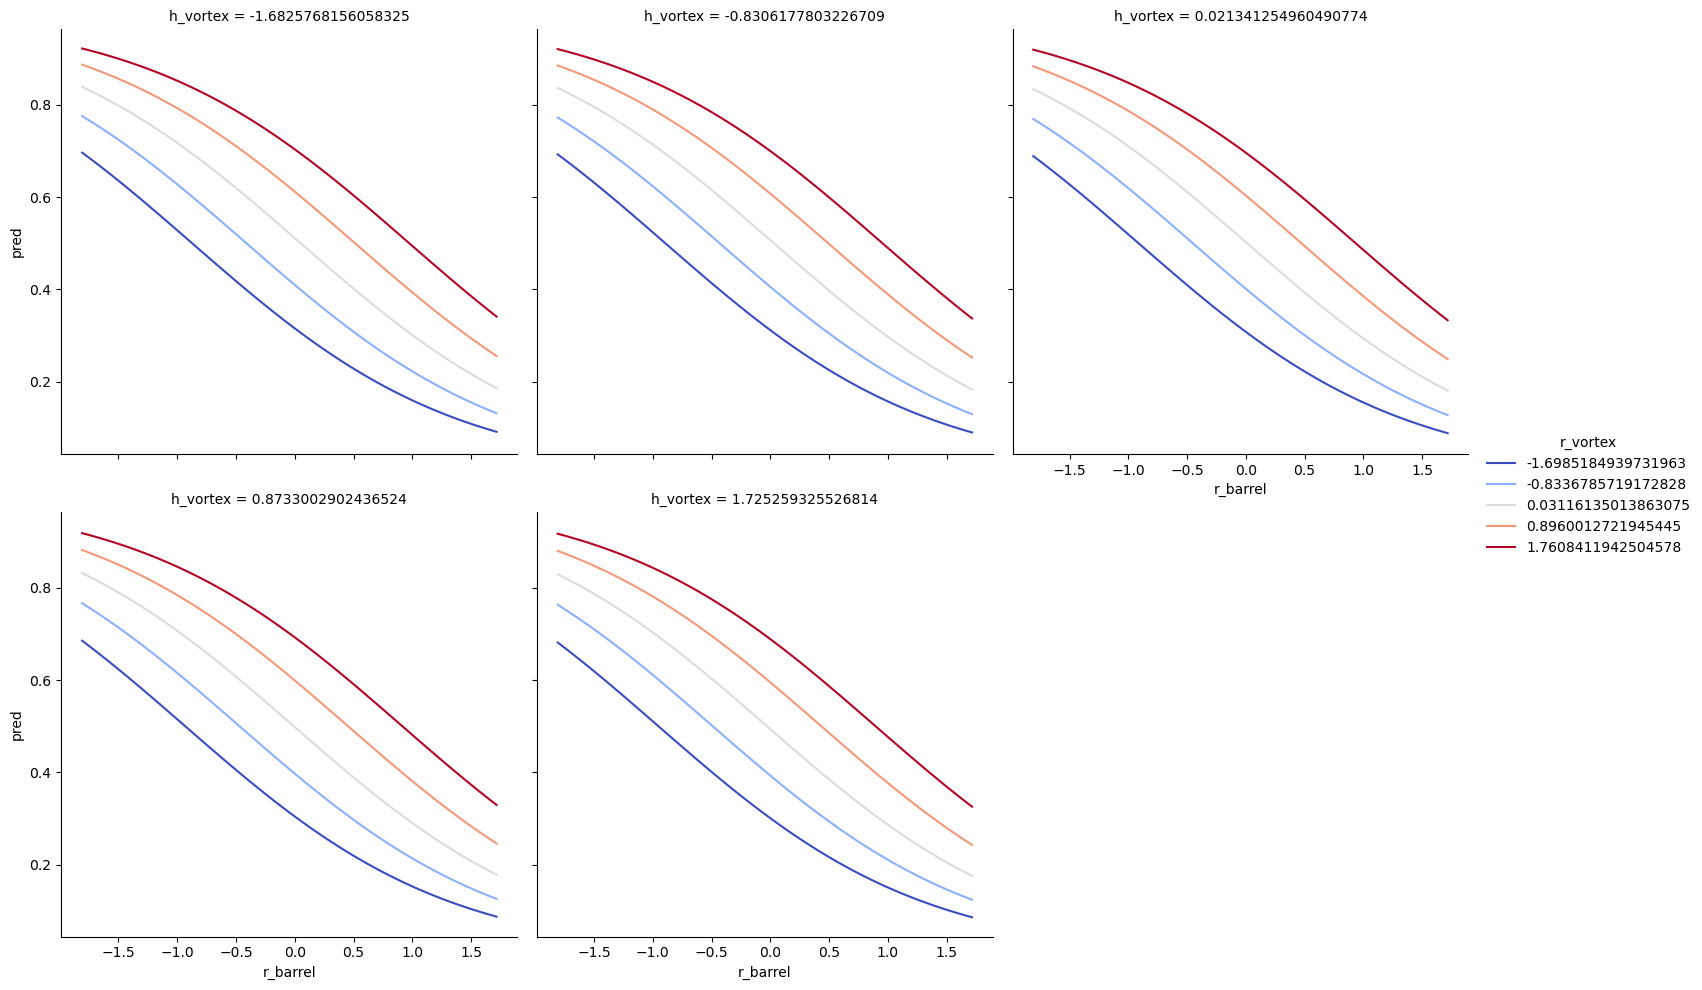

In [144]:
df_predict_mass_copy = df_predict_mass.copy()
df_predict_mass_copy['pred'] = fit_m6.predict(df_predict_mass)

sns.relplot(data = df_predict_mass_copy, 
            x='r_barrel', y='pred', kind='line',
            hue='r_vortex', col='h_vortex',
            col_wrap=3, palette='coolwarm',
            estimator=None, units='r_vortex')

plt.show()

Then, the model that performed best on the training set:

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


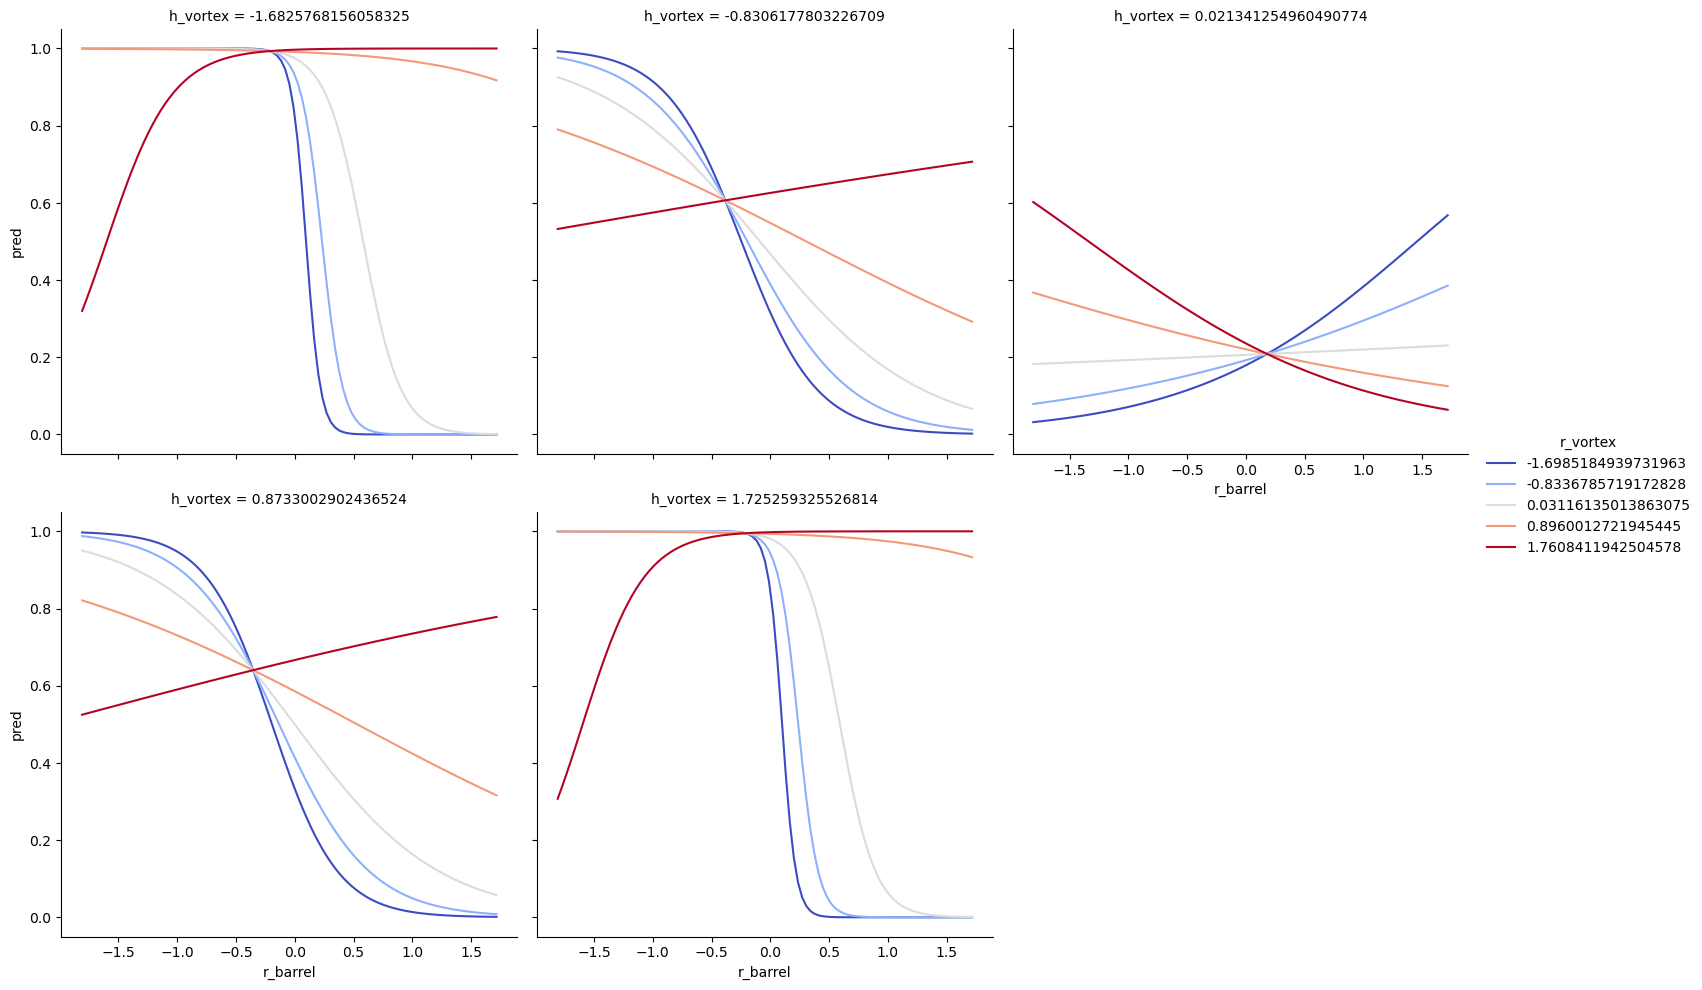

In [145]:
df_predict_mass_copy = df_predict_mass.copy()
df_predict_mass_copy['pred'] = fit_m8.predict(df_predict_mass)

sns.relplot(data = df_predict_mass_copy, 
            x='r_barrel', y='pred', kind='line',
            hue='r_vortex', col='h_vortex',
            col_wrap=3, palette='coolwarm',
            estimator=None, units='r_vortex')

plt.show()

There is a lot to comment on here, so let's present the information for each model separately.

#### Model 6

- As expected, the behavior of the model using linear additive features only doesn't really change across facets - `h_vortex` wasn't a significant feature in this model.
- We do see that the overall trend is negative as `r_barrel` increases. It isn't quite linear, but it's fairly close.
- We also see that higher values of `r_vortex` are always associated with predictions of higher event probability, in a way that does seem to significantly impact the overall height of the trend (compared to the regression task models and `r_barrel`, where the lines were spaced very close together).
- `r_vortex` does not impact the shape of the trend - only the height. This makes sense, as this model used additive features only.

#### Model 8

- This model demonstrates large changes in behavior across facets! `h_vortex` and its interactions were highly significant coefficients in this model, so this behavior is expected.
- This model also demonstrates significant changes in the shape of the trend for different values of `r_vortex`.
- The exact differences in the behavior of `r_vortex` depend on the value of `h_vortex` for that particular facet.
- It is worth noting that this pattern is the same for `h_vortex` values of similar magnitude, regardless of sign (e.g. the 1st and 5th, 2nd and 4th facets look nearly identical). This is due to the quadratic nature of the `h_vortex` interaction features included in the formula.
- Overall, it can be said that model 8 describes a more complex behavior than model 6 due to its increased consideration of `h_vortex`, as well as the way that `r_vortex` changes for different values of `h_vortex`.

## Models: Performance and Validation

Up to this point, we have only assessed the performance of our models on the training set. In this section, we will use cross-validation to calculate a more reliable estimate of the model performance on new data, which will give us better insights into the performance and usefulness of these models overall.

As per the project instructions, we will perform these validations on:

- The best model on the training set. (For the regression task, this is model 4; for the classification task, this is model 8. Both of these are our most complex models, with the highest number of estimated coefficients.)
- A model of our choice. (For the regression task, we've chosen to use model 3, the model with the linear main effects and their pairwise interactions. For the classification task, we've chosen to use model 6, the model using linear additive features only.)

For each task, we will use 5-fold cross-validation with the appropriate K-fold strategy ("regular" vs stratified) for the application type. For the regression task, we'll focus on the R-squared and RMSE as the primary performance metrics; for the classification task, we'll focus on accuracy.

After performing cross-validation, we will visualize the results by showing the average cross-validation performance metric with the 95% and 68% confidence intervals for each model. Then, we will discuss which model is the "best" overall, and whether or not this differs from the model identified as the best according to the training set.

A supplemental notebook is available for this section.

### Setup

We'll begin by importing the necessary functions for K-fold (and stratified K-fold) cross-validation from sklearn.

In [146]:
from sklearn.model_selection import KFold # for regression
from sklearn.model_selection import StratifiedKFold # for classification

Then, we'll set up our K-fold generator objects.

In [147]:
kf_r = KFold(n_splits=5, shuffle=True, random_state=101)
kf_c = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

Next, we'll create a variable that holds all of our input names. We only need one, since both outputs share the same set of inputs.

In [148]:
input_names = ['r_vortex', 'r_barrel', 'h_vortex', 'w_inlet', 'h_inlet']

We'll also create some variables to hold the list of all the variables we want standardized for each model.

In [149]:
lin_standard = ['r_vortex', 'r_barrel', 'h_vortex', 'w_inlet', 'h_inlet', 'log_pressure']
log_standard = ['r_vortex', 'r_barrel', 'h_vortex', 'w_inlet', 'h_inlet']

Last, we'll set up two modified versions of the helper function that was used in lecture for training and testing models with cross-validation (one for linear and one for logistic regression).

Rather than creating some kind of pipeline for processing, we'll also use this function to carry out our one-step standardization within each fold before training, since we can't perform data-dependent transformations like standardization before splitting our data.

In [150]:
def std_train_test_linear_with_cv(mod_name, a_formula, data_df, x_names, y_name, std_vars, cv):
    """
    This is a function that takes a model name, a formula, a source dataframe, a list of
    the input names, the output name, a list of variables to be standardized, and a K-fold
    cross-validation generator object.
    
    Then, the function uses this information to split the inputs and outputs from the
    source data, splits the data using the given K-fold generator, standardizes the data
    within each fold using StandardScaler for the specified variables, fits a linear model
    using the given formula, makes predictions within each fold, calculates the R-squared
    and RMSE values within each fold, and stores the results along with model information
    into a new results dataframe.
    
    This dataframe is then returned.
    """
    # separate the inputs and output
    input_df = data_df.loc[:, x_names].copy()

    # initialize the performance metric storage lists
    test_res_r2 = []
    test_res_rmse = []

    # split the data, preprocess and iterate over the folds
    for train_id, test_id in cv.split(input_df.to_numpy(), data_df[y_name].to_numpy()):
    
        # subset the training and test splits within each fold
        train_data = data_df.iloc[train_id, :].copy()
        test_data = data_df.iloc[test_id, :].copy()
    
        # standardize
        train_data[std_vars] = StandardScaler().fit_transform(train_data[std_vars])
        test_data[std_vars] = StandardScaler().fit_transform(test_data[std_vars])

        # fit the model on the training data within the current fold
        a_mod = smf.ols(formula=a_formula, data=train_data).fit()
    
        # predict the testing within the fold
        test_copy = test_data.copy()
        test_copy['pred'] = a_mod.predict(test_data)
    
        # calculate performance metric on testing set within fold
        test_res_r2.append(a_mod.rsquared)
        test_res_rmse.append(np.sqrt((a_mod.resid ** 2 ).mean()))
    
    # book keeping to store the results
    res_df = pd.DataFrame({'R-squared': test_res_r2, 'RMSE': test_res_rmse})
    res_df['from_set'] = 'testing'
    res_df['fold_id'] = res_df.index + 1
        
    # add information about the model
    res_df['model_name'] = mod_name
    res_df['model_formula'] = a_formula
    res_df['num_coefs'] = len(a_mod.params)
    
    return res_df

In [151]:
def std_train_test_logistic_with_cv(mod_name, a_formula, data_df, x_names, y_name, std_vars, cv, threshold=0.5):
    """
    This is a function that takes a model name, a formula, a source dataframe, a list of
    the input names, the output name, a list of variables to be standardized, a K-fold
    cross-validation generator object, and a threshold value (which defaults to 0.5).
    
    Then, the function uses this information to split the inputs and outputs from the
    source data, splits the data using the given K-fold generator, standardizes the data
    within each fold using StandardScaler for the specified variables, fits a logistic model
    using the given formula, makes predictions within each fold, calculates the accuracy
    within each fold, and stores the results along with model information into a new results
    dataframe.
    
    This dataframe is then returned.
    """
    # separate the inputs and output
    input_df = data_df.loc[:, x_names].copy()

    # initialize the performance metric storage lists
    train_res = []
    test_res = []

    # split the data, preprocess and iterate over the folds
    for train_id, test_id in cv.split(input_df.to_numpy(), data_df[y_name].to_numpy()):
    
        # subset the training and test splits within each fold
        train_data = data_df.iloc[train_id, :].copy()
        test_data = data_df.iloc[test_id, :].copy()
    
        # standardize
        train_data[std_vars] = StandardScaler().fit_transform(train_data[std_vars])
        test_data[std_vars] = StandardScaler().fit_transform(test_data[std_vars])

        # fit the model on the training data within the current fold
        a_mod = smf.logit(formula=a_formula, data=train_data).fit()

        # predict the training within the fold
        train_copy = train_data.copy()
        train_copy['pred_probability'] = a_mod.predict(train_data)
        train_copy['pred_class'] = np.where(train_copy.pred_probability > threshold, 1, 0)
    
        # predict the testing within the fold
        test_copy = test_data.copy()
        test_copy['pred_probability'] = a_mod.predict(test_data)
        test_copy['pred_class'] = np.where(test_copy.pred_probability > threshold, 1, 0)
    
        # calculate performance metric on training set within fold
        train_res.append(np.mean(train_copy[y_name] == train_copy.pred_class))
    
        # calculate performance metric on testing set within fold
        test_res.append(np.mean(test_copy[y_name] == test_copy.pred_class))
    
    # book keeping to store the results
    train_df = pd.DataFrame({'Accuracy': train_res})
    train_df['from_set'] = 'training'
    train_df['fold_id'] = train_df.index + 1
    
    test_df = pd.DataFrame({'Accuracy': test_res})
    test_df['from_set'] = 'testing'
    test_df['fold_id'] = test_df.index + 1
    
    # combine the splits together
    res_df = pd.concat([train_df, test_df], ignore_index=True)
    
    # add information about the model
    res_df['model_name'] = mod_name
    res_df['model_formula'] = a_formula
    res_df['num_coefs'] = len(a_mod.params)
    res_df['threshold'] = threshold
    
    return res_df

Now, we're ready to run cross-validation and visualize the results.

### Regression

Let's use our helper function to split, standardize, fit, train, and test our two models.

As a reminder, we're using model 3, the model with all linear main effects and pairwise interactions, and model 4, the model including the interaction with the natural log of the squared `r_vortex`.

In [152]:
res_m3 = std_train_test_linear_with_cv('m3', 'log_pressure ~ (r_barrel + r_vortex + h_vortex + w_inlet + h_inlet) ** 2', df_pressure, input_names, 'log_pressure', lin_standard, kf_r)

In [153]:
res_m4 = std_train_test_linear_with_cv('m4', 'log_pressure ~ np.log(np.power(r_vortex, 2)) * ((r_barrel + r_vortex + h_vortex + w_inlet + h_inlet) ** 2)', df_pressure, input_names, 'log_pressure', lin_standard, kf_r)

Concatenate into one dataframe and view the results.

In [154]:
cv_results_r = pd.concat([res_m3, res_m4], ignore_index=True)

In [155]:
cv_results_r

R-squared      RMSE from_set  fold_id model_name  \
0   0.834667  0.406612  testing        1         m3   
1   0.831356  0.410662  testing        2         m3   
2   0.850411  0.386767  testing        3         m3   
3   0.845123  0.393544  testing        4         m3   
4   0.887811  0.334946  testing        5         m3   
5   0.894490  0.324824  testing        1         m4   
6   0.881162  0.344729  testing        2         m4   
7   0.905647  0.307170  testing        3         m4   
8   0.898626  0.318393  testing        4         m4   
9   0.962998  0.192360  testing        5         m4   

                                       model_formula  num_coefs  
0  log_pressure ~ (r_barrel + r_vortex + h_vortex...         16  
1  log_pressure ~ (r_barrel + r_vortex + h_vortex...         16  
2  log_pressure ~ (r_barrel + r_vortex + h_vortex...         16  
3  log_pressure ~ (r_barrel + r_vortex + h_vortex...         16  
4  log_pressure ~ (r_barrel + r_vortex + h_vortex...         16  
5  log_pressure ~ np.log(np.power(r_vortex, 2)) *...         32  
6  log_pressure ~ np.log(np.power(r_vortex, 2)) *...         32  
7  log_pressure ~ np.log(np.power(r_vortex, 2)) *...         32  
8  log_pressure ~ np.log(np.power(r_vortex, 2)) *...         32  
9  log_pressure ~ np.log(np.power(r_vortex, 2)) *...         32

At a glance, we can see that model 4 appears to be performing slightly better than model 3.

Let's graph the models side by side to confirm.

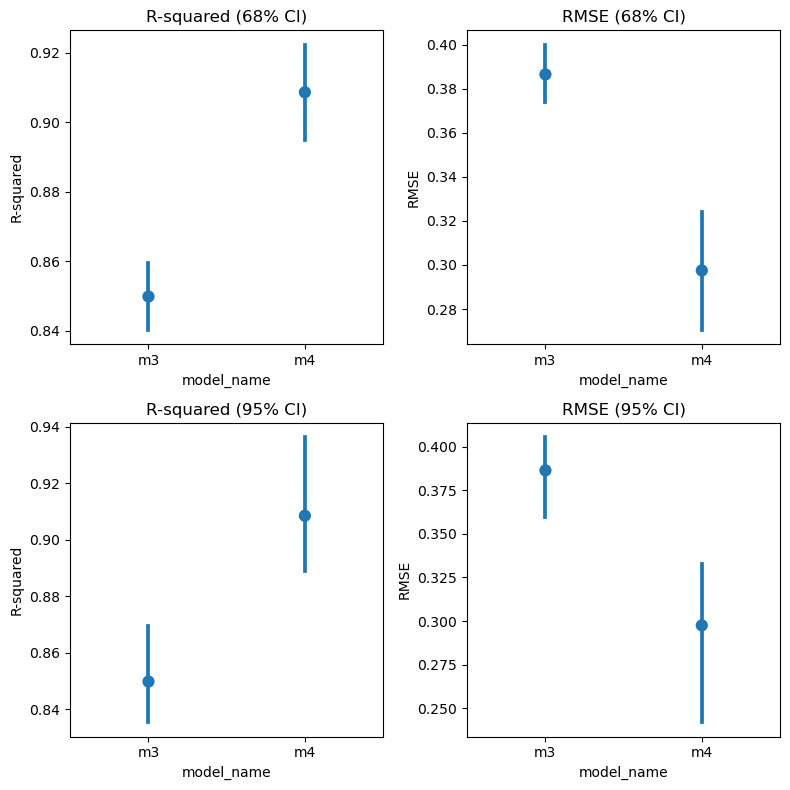

In [156]:
fig, ax = plt.subplots(2, 2, figsize=(8,8))

sns.pointplot(data = cv_results_r, x='model_name', y='R-squared', join=False, errorbar=('ci', 68), ax=ax[0,0])
sns.pointplot(data = cv_results_r, x='model_name', y='RMSE', join=False, errorbar=('ci', 68), ax=ax[0,1])
sns.pointplot(data = cv_results_r, x='model_name', y='R-squared', join=False, errorbar=('ci', 95), ax=ax[1,0])
sns.pointplot(data = cv_results_r, x='model_name', y='RMSE', join=False, errorbar=('ci', 95), ax=ax[1,1])

ax[0,0].set_title('R-squared (68% CI)')
ax[0,1].set_title('RMSE (68% CI)')
ax[1,0].set_title('R-squared (95% CI)')
ax[1,1].set_title('RMSE (95% CI)')

plt.tight_layout()
plt.show()

By looking at the point plots for the R-squared and RMSE values, we can easily tell that model 4 has a higher average R-squared and a lower average RMSE, indicating that this model performs better than model 3 overall. The confidence intervals for the average values of the two models do not overlap, which tells us that we are confident in claiming that the averages are different, and therefore confident in our claim that model 4 performs the best.

This model was also identified as the best according to the training set; apparently, it was not overfitted, as it continues to do well even on the "new" data simulated through 5-fold cross-validation.

There are 32 coefficients associated with this model.

### Classification

Next, we'll carry out the same process for our classification models.

For this problem, we chose to study model 6, the model with linear additive features only, and model 8, the model including the interaction with the squared value of `h_vortex`.

In [157]:
res_m6 = std_train_test_logistic_with_cv('m6', 'bin_mass ~ r_barrel + r_vortex + h_vortex + w_inlet + h_inlet', df_mass, input_names, 'bin_mass', log_standard, kf_c)

Optimization terminated successfully.
         Current function value: 0.572312
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.616255
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.590603
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.575696
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.587955
         Iterations 5


In [158]:
res_m8 = std_train_test_logistic_with_cv('m8', 'bin_mass ~ np.power(h_vortex, 2) * ((r_barrel + r_vortex + w_inlet + h_inlet) ** 2)', df_mass, input_names, 'bin_mass', log_standard, kf_c)

Optimization terminated successfully.
         Current function value: 0.305801
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.378999
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.351181
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.376938
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.345691
         Iterations 9


Concatenate and view the results.

In [159]:
cv_results_c = pd.concat([res_m6, res_m8], ignore_index=True)

In [160]:
cv_results_c

Accuracy  from_set  fold_id model_name  \
0   0.671053  training        1         m6   
1   0.623377  training        2         m6   
2   0.636364  training        3         m6   
3   0.675325  training        4         m6   
4   0.688312  training        5         m6   
5   0.600000   testing        1         m6   
6   0.789474   testing        2         m6   
7   0.684211   testing        3         m6   
8   0.684211   testing        4         m6   
9   0.473684   testing        5         m6   
10  0.868421  training        1         m8   
11  0.805195  training        2         m8   
12  0.844156  training        3         m8   
13  0.818182  training        4         m8   
14  0.857143  training        5         m8   
15  0.700000   testing        1         m8   
16  0.736842   testing        2         m8   
17  0.526316   testing        3         m8   
18  0.789474   testing        4         m8   
19  0.684211   testing        5         m8   

                                        model_formula  num_coefs  threshold  
0   bin_mass ~ r_barrel + r_vortex + h_vortex + w_...          6        0.5  
1   bin_mass ~ r_barrel + r_vortex + h_vortex + w_...          6        0.5  
2   bin_mass ~ r_barrel + r_vortex + h_vortex + w_...          6        0.5  
3   bin_mass ~ r_barrel + r_vortex + h_vortex + w_...          6        0.5  
4   bin_mass ~ r_barrel + r_vortex + h_vortex + w_...          6        0.5  
5   bin_mass ~ r_barrel + r_vortex + h_vortex + w_...          6        0.5  
6   bin_mass ~ r_barrel + r_vortex + h_vortex + w_...          6        0.5  
7   bin_mass ~ r_barrel + r_vortex + h_vortex + w_...          6        0.5  
8   bin_mass ~ r_barrel + r_vortex + h_vortex + w_...          6        0.5  
9   bin_mass ~ r_barrel + r_vortex + h_vortex + w_...          6        0.5  
10  bin_mass ~ np.power(h_vortex, 2) * ((r_barrel ...         22        0.5  
11  bin_mass ~ np.power(h_vortex, 2) * ((r_barrel ...         22        0.5  
12  bin_mass ~ np.power(h_vortex, 2) * ((r_barrel ...         22        0.5  
13  bin_mass ~ np.power(h_vortex, 2) * ((r_barrel ...         22        0.5  
14  bin_mass ~ np.power(h_vortex, 2) * ((r_barrel ...         22        0.5  
15  bin_mass ~ np.power(h_vortex, 2) * ((r_barrel ...         22        0.5  
16  bin_mass ~ np.power(h_vortex, 2) * ((r_barrel ...         22        0.5  
17  bin_mass ~ np.power(h_vortex, 2) * ((r_barrel ...         22        0.5  
18  bin_mass ~ np.power(h_vortex, 2) * ((r_barrel ...         22        0.5  
19  bin_mass ~ np.power(h_vortex, 2) * ((r_barrel ...         22        0.5

From a cursory glance at the table, we can tell that model 8 outperforms model 6 on the training set, as we saw earlier. But what about the testing set? It's hard to tell just by looking at the table.

Let's take a look at the point plots for the accuracy of these models.

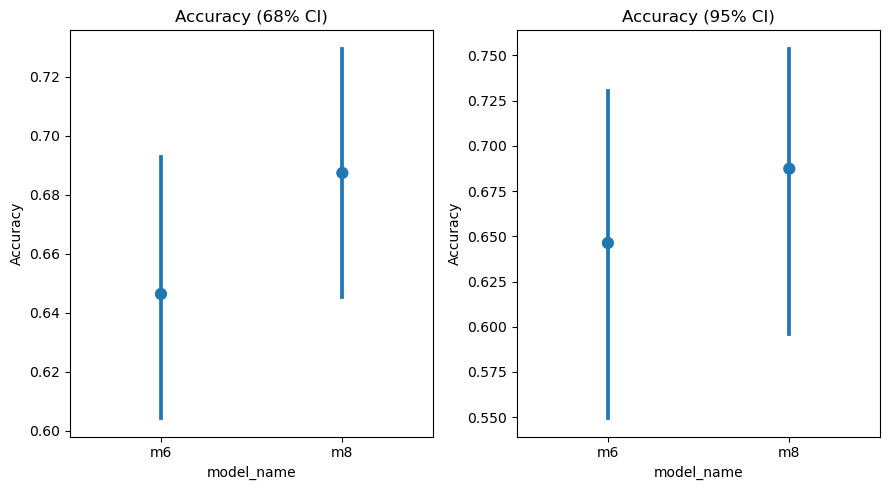

In [161]:
fig, ax = plt.subplots(1, 2, figsize=(9,5))

sns.pointplot(data = cv_results_c.loc[cv_results_c.from_set == 'testing', :],
            x='model_name', y='Accuracy', join=False, errorbar=('ci', 68), ax=ax[0])
sns.pointplot(data = cv_results_c.loc[cv_results_c.from_set == 'testing', :],
            x='model_name', y='Accuracy', join=False, errorbar=('ci', 95), ax=ax[1])

ax[0].set_title('Accuracy (68% CI)')
ax[1].set_title('Accuracy (95% CI)')

plt.tight_layout()
plt.show()

Although the plotted average for model 8 is higher than the average for model 6... the confidence intervals on the point plot overlap! Therefore, we cannot say that we are confident that the averages are different, which means that we cannot be confident in saying that model 8 performs the best according to cross-validation.

This is different from when we were looking at performance on the training set only - when we evaluated performance on the training set, model 8 appeared to perform extremely well in comparison to less complex models. Since this 22-coefficient model's performance is closer to the 6-coefficient linear additive model through cross-validation, this indicates to us that this model may be somewhat overfitted on the training data.

We can support this claim by looking at one last figure, the strip and point plots of accuracy for both the training and test sets for both models:

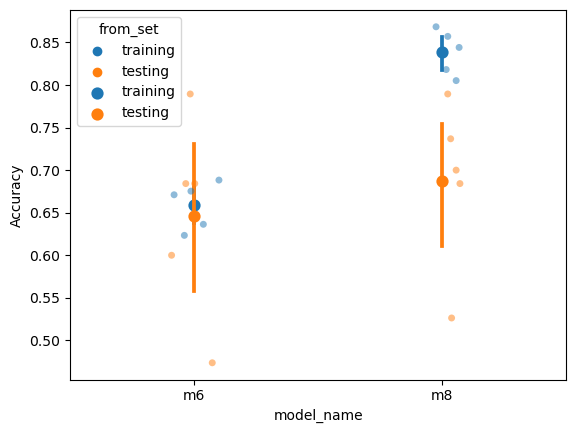

In [162]:
fig, ax = plt.subplots()

sns.stripplot(data = cv_results_c, x='model_name', y='Accuracy', hue='from_set', alpha=0.5, ax=ax)
sns.pointplot(data = cv_results_c, x='model_name', y='Accuracy', hue='from_set', join=False, ax=ax)

plt.show()

In this figure, we can see that model 8 performs significantly better on the training set than the test set, indicating that the model is overfitted.